In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time 
from sklearn import linear_model
import sklearn
import csv
import json
#from sklearn.cross_validation import train_test_split
#import pymannkendall 




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

def read_ghcn(file):
    #filename = "/scratch/uropprecip_project_root/uropprecip_project/butlermi/ghcnd_all/" + file
    filename = "ghcnd_all/" + file
    #Defines Columns
    data_header_col_specs = [(0,  11),(11, 15),(15, 17),(17, 21)]
    data_col_specs = [[(21 + i * 8, 26 + i * 8),(26 + i * 8, 27 + i * 8),(27 + i * 8, 28 + i * 8),(28 + i * 8, 29 + i * 8)]for i in range(31)]
    metadata_names = ["ID","LATITUDE","LONGITUDE","ELEVATION","STATE","NAME","GSN FLAG","HCN/CRN FLAG","WMO ID"]
    data_header_names = ["ID","YEAR","MONTH","ELEMENT"]
    data_col_names = [["VALUE" + str(i + 1),"MFLAG" + str(i + 1),"QFLAG" + str(i + 1),"SFLAG" + str(i + 1)]for i in range(31)]
    # Join sub-lists
    data_col_names = sum(data_col_names, [])
    data_col_specs = sum(data_col_specs, [])
    #####################################
    
    reader = pd.read_fwf(filename,colspecs=data_header_col_specs + data_col_specs,names=data_header_names + data_col_names)
    arr = []
    for i in range(1,32):
        arr.append("VALUE" + str(i))
    #Filters only Precipitation events
    correct_element = reader[reader['ELEMENT']=="PRCP"]
    #Removes Flags 
    clean_data_temp_1 = correct_element[arr]


    #Filters Negitive Values 
    no_negitives = clean_data_temp_1[clean_data_temp_1[arr]>= 0]

    # #Add ID,Year,Month and Element to the dataframe 
    info = (correct_element[['ID','YEAR','MONTH','ELEMENT']])

    #print(info)

    #Data is in tenths of milimeters

    clean_data = info.join(no_negitives)
    #print(time.localtime())
 
    unique_years = clean_data.YEAR.unique()
    eight_months_or_more = ((clean_data.YEAR.value_counts()>8) == True)
    return clean_data

print(read_ghcn("AM000037959.dly"))
#US1FLCY0024.dly
#USC00166678.dly
#AE000041196.dly


               ID  YEAR  MONTH ELEMENT  VALUE1  VALUE2  VALUE3  VALUE4  \
0     AM000037959  1908     12    PRCP     NaN     NaN     NaN     NaN   
1     AM000037959  1936      1    PRCP     0.0     0.0     NaN     0.0   
2     AM000037959  1936      2    PRCP     0.0     0.0     7.0     0.0   
3     AM000037959  1936      3    PRCP     0.0    18.0   100.0     0.0   
4     AM000037959  1936      4    PRCP     0.0    18.0   136.0     0.0   
...           ...   ...    ...     ...     ...     ...     ...     ...   
1558  AM000037959  2019      6    PRCP     0.0     0.0     0.0     0.0   
1562  AM000037959  2019      7    PRCP    15.0     0.0     0.0     0.0   
1566  AM000037959  2019      8    PRCP     0.0     0.0    23.0     0.0   
1570  AM000037959  2019      9    PRCP    43.0    13.0    79.0     0.0   
1574  AM000037959  2019     10    PRCP     0.0     0.0     0.0     NaN   

      VALUE5  VALUE6  ...  VALUE22  VALUE23  VALUE24  VALUE25  VALUE26  \
0        NaN     NaN  ...      0.0   

In [3]:
def find_thirty_year_data(directory): 
    counter = 0
    thirty_year_data = []
    start_time = time.time()
    for filename in os.listdir(directory):
        if filename.endswith(".dly"):
            counter += 1
            read_ghcn(filename)
            thirty_year_data.append(filename)
            print("Has read: ",counter,"Files")
    print("Total Files in the directory",count)
    print("My program took", time.time() - start_time, "to run")
    return(thirty_year_data)
find_thirty_year_data('ghcnd_all')

Has read:  1 Files
Has read:  2 Files
Has read:  3 Files
Has read:  4 Files
Has read:  5 Files
Has read:  6 Files
Has read:  7 Files
Has read:  8 Files
Has read:  9 Files
Has read:  10 Files
Has read:  11 Files
Has read:  12 Files
Has read:  13 Files
Has read:  14 Files
Has read:  15 Files
Has read:  16 Files
Has read:  17 Files
Has read:  18 Files
Has read:  19 Files
Has read:  20 Files
Has read:  21 Files
Has read:  22 Files
Has read:  23 Files
Has read:  24 Files
Has read:  25 Files
Has read:  26 Files
Has read:  27 Files
Has read:  28 Files
Has read:  29 Files
Has read:  30 Files
Has read:  31 Files
Has read:  32 Files
Has read:  33 Files
Has read:  34 Files
Has read:  35 Files
Has read:  36 Files
Has read:  37 Files
Has read:  38 Files
Has read:  39 Files
Has read:  40 Files
Has read:  41 Files
Has read:  42 Files
Has read:  43 Files
Has read:  44 Files
Has read:  45 Files
Has read:  46 Files
Has read:  47 Files
Has read:  48 Files
Has read:  49 Files
Has read:  50 Files
Has read:

KeyboardInterrupt: 

In [3]:
def reshape_data(df):
    #Reshaped data into a workable form from wide to long
    arr = []
    for i in range(1,32):
        arr.append("VALUE" + str(i))
    long_clean_data = df.melt(id_vars=['ID',"MONTH",'YEAR','ELEMENT'],value_vars = [i for i in arr])
    #Remove
    long_clean_data['DAY'] = long_clean_data['variable'].map(lambda x: x.lstrip('VALUE').rstrip('aAbBcC'))
    long_clean_data.drop(columns='variable')
    #Rearranges columns index's  
    cleanest_data = long_clean_data[["ID","MONTH","DAY",'YEAR','value']]
    cleanest_data=(cleanest_data.sort_values(['YEAR','MONTH']))
    #Removes_Null vlaues
    cleanest_data = cleanest_data[cleanest_data['value'].notnull()]
    cleanest_data['Day'] =  pd.to_numeric(cleanest_data['DAY'])
    cleanest_data.drop(columns='DAY')
    cleanest_data['value'] = pd.to_numeric(cleanest_data['value'])
    
    cleanest_data['Date']= pd.to_datetime(cleanest_data[['Day','MONTH','YEAR']],dayfirst=True)
    cleanest_data = cleanest_data[['ID','MONTH','Day','YEAR','value','Date']]
    return(cleanest_data)
    #print(cleanest_data.dtypes)

reshape_data(read_ghcn("USW00093822.dly"))
#US1MIVB0005.dly
#US1WAKP0046.dly

,ID,MONTH,Day,YEAR,value,Date
0,USW00093822,1,1,1901,0.0,1901-01-01
1426,USW00093822,1,2,1901,0.0,1901-01-02
2852,USW00093822,1,3,1901,0.0,1901-01-03
4278,USW00093822,1,4,1901,0.0,1901-01-04
5704,USW00093822,1,5,1901,0.0,1901-01-05
...,...,...,...,...,...,...
7129,USW00093822,10,5,2019,28.0,2019-10-05
8555,USW00093822,10,6,2019,10.0,2019-10-06
9981,USW00093822,10,7,2019,0.0,2019-10-07
11407,USW00093822,10,8,2019,0.0,2019-10-08


In [4]:
def top_value_annual(df):
    max_per_year = df.loc[df.groupby("YEAR")["value"].idxmax()]
    return max_per_year

print(top_value_annual(reshape_data(read_ghcn('USW00093822.dly'))))
#US1WAKP0046.dly
#US1IAIA0006.dly
#US1WAKP0046.dly

                ID  MONTH  Day  YEAR   value       Date
35655  USW00093822      6   26  1901   378.0 1901-06-26
38519  USW00093822      6   28  1902   726.0 1902-06-28
32826  USW00093822      5   24  1903   432.0 1903-05-24
37118  USW00093822      7   27  1904   549.0 1904-07-27
54     USW00093822      7    1  1905   467.0 1905-07-01
...            ...    ...  ...   ...     ...        ...
11356  USW00093822      7    8  2015   541.0 2015-07-08
17073  USW00093822      8   12  2016  1420.0 2016-08-12
14235  USW00093822     10   10  2017   579.0 2017-10-10
41338  USW00093822      7   29  2018   711.0 2018-07-29
41352  USW00093822      9   29  2019   838.0 2019-09-29

[119 rows x 6 columns]


In [13]:
def top_percent(df,percent):
    df = df.dropna()
    count_row = df.shape[0]
    five_percent = round(count_row * percent)
    largest_vals = df.nlargest(five_percent, ['value']) 
    df_temp = largest_vals
    return df_temp


print(top_percent(reshape_data(read_ghcn('USW00093822.dly')),.01))

                ID  MONTH  Day  YEAR   value       Date
17073  USW00093822      8   12  2016  1420.0 2016-08-12
10290  USW00093822      9    8  1926  1382.0 1926-09-08
4475   USW00093822      6    4  1917  1308.0 1917-06-04
36354  USW00093822      9   26  1959  1300.0 1959-09-26
4767   USW00093822     10    4  1941  1204.0 1941-10-04
...            ...    ...  ...   ...     ...        ...
1766   USW00093822      5    2  1929   361.0 1929-05-02
1896   USW00093822      3    2  1940   361.0 1940-03-02
7787   USW00093822     10    6  1955   361.0 1955-10-06
9331   USW00093822      8    7  1965   361.0 1965-08-07
930    USW00093822      7    1  1978   361.0 1978-07-01

[434 rows x 6 columns]


In [6]:
def loop_dataset_2(directory):
    files_to_read = []
    with open('30yeardata.csv', mode='r') as csv_file:    
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            files_to_read.append(row[0])
    with open('test.csv', mode='w') as csv_file:
        employee_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for filename in os.listdir(directory):
             if filename in files_to_read:
                    out_put_list = []
                    out_put_list.append(top_n_event(reshape_data(read_ghcn(filename)),10))
                    employee_writer.writerow([out_put_list])
                    print("Read:",filename)
    return out_put_dict
loop_dataset_2("ghcnd_all")

NameError: name 'top_n_event' is not defined

In [22]:
def top_n_event(df1,df3,n):
    max_per_year = df1.loc[df1.groupby("YEAR")["value"].idxmax()]
#     print(max_per_year)
    dfnew = innerjoin(max_per_year,df3)
    dfnew['Adjusted_mean'] = dfnew['J-D']-dfnew['J-D'].mean()
#     print(dfnew)
#     print(df3)
#     df_test = pd.merge(df1,dfnew, on=['YEAR'],how='inner')
#     return df_test
#     df_test = df_test.dropna()
#     df_test = df_test.sort_values(by='value',ascending=False)
# #     df_fin = df_test.iloc[:n,:]
#     df_fin = df_test.reset_index()
#     df_fin = df_fin.drop(columns=['index', 'MONTH','Day','Date','J-D','ID','value'])
# #     print(df_fin)
#     data_dict = df_fin.groupby('YEAR').Adjusted_mean.apply(list).to_dict()
#     test = dfnew.groupby("YEAR").apply(list).to_dict()
    
    new = dfnew["Adjusted_mean"].to_list()#(list).to_dict()
    return new
    print('Working')
#     return dfnew
#     return df_fin
#     return data_dict

top_n_event(reshape_data(read_ghcn('USW00093822.dly')),read_giss_JD('GISS.csv'),10)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


[-0.23796610169491525,
 -0.3679661016949152,
 -0.45796610169491525,
 -0.5579661016949152,
 -0.34796610169491526,
 -0.30796610169491523,
 -0.47796610169491527,
 -0.5079661016949153,
 -0.5679661016949152,
 -0.5179661016949153,
 -0.5279661016949153,
 -0.44796610169491524,
 -0.4279661016949152,
 -0.23796610169491525,
 -0.22796610169491524,
 -0.43796610169491523,
 -0.5479661016949152,
 -0.38796610169491524,
 -0.3679661016949152,
 -0.3579661016949153,
 -0.27796610169491526,
 -0.3679661016949152,
 -0.34796610169491526,
 -0.3579661016949153,
 -0.30796610169491523,
 -0.19796610169491524,
 -0.2979661016949152,
 -0.2879661016949152,
 -0.44796610169491524,
 -0.23796610169491525,
 -0.17796610169491525,
 -0.23796610169491525,
 -0.3679661016949152,
 -0.20796610169491525,
 -0.2879661016949152,
 -0.22796610169491524,
 -0.10796610169491525,
 -0.08796610169491524,
 -0.09796610169491525,
 0.04203389830508475,
 0.10203389830508475,
 -0.01796610169491525,
 0.0020338983050847553,
 0.12203389830508476,
 0.012

In [23]:
def loop_dataset(directory):
    files_to_read = []
    out_dict = {}
    counter = 0
    with open('30yeardata.csv', mode='r') as csv_file:    
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            files_to_read.append(row[0])
        out_dict['Stations'] = []
        for filename in os.listdir(directory):
             if filename in files_to_read:
                    counter += 1
                    out_dict['Stations'].append(top_n_event(reshape_data(read_ghcn(filename)),read_giss_JD('GISS.csv'),10))
                    print("Read:",filename,counter)
    with open('updated_json_2.txt', 'w') as json_file:
        json.dump(out_dict, json_file)
                    
loop_dataset("ghcnd_all")
            
            
            

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Read: AM000037959.dly 1
Read: SF003053080.dly 2
Read: ASN00080010.dly 3
Read: USC00049499.dly 4
Read: USC00481770.dly 5
Read: MXN00008057.dly 6
Read: IN020100301.dly 7
Read: KZ000038333.dly 8
Read: BR028815040.dly 9
Read: ASN00085168.dly 10
Read: CA007063320.dly 11
Read: ASN00059003.dly 12
Read: USC00290426.dly 13
Read: BR00D9-0010.dly 14
Read: ASN00009634.dly 15
Read: MXN00003102.dly 16
Read: USC00166308.dly 17
Read: USC00417074.dly 18
Read: ASN00050027.dly 19
Read: USC00013783.dly 20
Read: SF002633160.dly 21
Read: ASN00039091.dly 22
Read: USC00137147.dly 23
Read: USC00417712.dly 24
Read: SWE00138770.dly 25
Read: ASN00040234.dly 26
Read: CA003011241.dly 27
Read: IN004050100.dly 28
Read: ASN00009152.dly 29
Read: USC00505464.dly 30
Read: BR001137041.dly 31
Read: CA006127887.dly 32
Read: CA003012990.dly 33
Read: ASN00089034.dly 34
Read: MXN00001073.dly 35
Read: USC00067002.dly 36
Read: USC00293649.dly 37
Read: SF002307740.dly 38
Read: ASN00002007.dly 39
Read: ASN00044052.dly 40
Read: ASN

Read: ASN00054043.dly 322
Read: MXN00011062.dly 323
Read: USC00134894.dly 324
Read: ASN00086105.dly 325
Read: SF005941410.dly 326
Read: SF001432580.dly 327
Read: CA006107955.dly 328
Read: USC00458207.dly 329
Read: ASN00010601.dly 330
Read: SF002030430.dly 331
Read: UV000005522.dly 332
Read: ASN00041328.dly 333
Read: ASN00040036.dly 334
Read: SWE00138572.dly 335
Read: ASN00029080.dly 336
Read: ASN00039293.dly 337
Read: TI000038725.dly 338
Read: USC00254100.dly 339
Read: USC00336949.dly 340
Read: ASN00049012.dly 341
Read: USC00444148.dly 342
Read: USC00173261.dly 343
Read: CA007057287.dly 344
Read: GME00131146.dly 345
Read: GME00130258.dly 346
Read: ASN00063189.dly 347
Read: USC00113595.dly 348
Read: MXN00007166.dly 349
Read: MXN00028185.dly 350
Read: CA003025480.dly 351
Read: ASN00090001.dly 352
Read: CHM00055299.dly 353
Read: ASN00081118.dly 354
Read: EN000026242.dly 355
Read: MXN00007172.dly 356
Read: IN017111500.dly 357
Read: USS0005N18S.dly 358
Read: USC00082298.dly 359
Read: ASN000

Read: CA001123930.dly 639
Read: USC00296321.dly 640
Read: IN023271400.dly 641
Read: USC00042862.dly 642
Read: ASN00010013.dly 643
Read: USC00023250.dly 644
Read: USC00338810.dly 645
Read: USC00136891.dly 646
Read: ASN00009542.dly 647
Read: ASN00077088.dly 648
Read: ASN00084100.dly 649
Read: USC00027036.dly 650
Read: IN001071300.dly 651
Read: MXN00007012.dly 652
Read: ASN00004066.dly 653
Read: CA001150060.dly 654
Read: ASN00042033.dly 655
Read: USC00246470.dly 656
Read: ASN00081078.dly 657
Read: USC00026328.dly 658
Read: BR00D8-0400.dly 659
Read: USC00302554.dly 660
Read: MXN00007006.dly 661
Read: ASN00042027.dly 662
Read: KZ000038051.dly 663
Read: USC00031640.dly 664
Read: USC00282340.dly 665
Read: USC00097087.dly 666
Read: USC00300343.dly 667
Read: USC00025635.dly 668
Read: ASN00010007.dly 669
Read: ASN00056052.dly 670
Read: ASN00095019.dly 671
Read: ASN00009556.dly 672
Read: ASN00019023.dly 673
Read: USC00418743.dly 674
Read: USC00459079.dly 675
Read: USC00290022.dly 676
Read: ASN000

Read: SF000670740.dly 956
Read: BR047716090.dly 957
Read: IN020110700.dly 958
Read: ASN00044132.dly 959
Read: SF002545890.dly 960
Read: USC00082850.dly 961
Read: USC00305987.dly 962
Read: USC00259020.dly 963
Read: MYM00096421.dly 964
Read: ASN00014705.dly 965
Read: MXN00015166.dly 966
Read: USC00411203.dly 967
Read: IN019030300.dly 968
Read: GRM00016622.dly 969
Read: CA007035760.dly 970
Read: ASN00082001.dly 971
Read: ASN00010563.dly 972
Read: MOM00060318.dly 973
Read: ASN00009032.dly 974
Read: ASN00070297.dly 975
Read: MXN00003062.dly 976
Read: SF000236290.dly 977
Read: KZ000035777.dly 978
Read: IN009180901.dly 979
Read: USC00337935.dly 980
Read: AUM00011231.dly 981
Read: ASN00009754.dly 982
Read: SWE00139268.dly 983
Read: TU000017040.dly 984
Read: IN020010700.dly 985
Read: IN019220801.dly 986
Read: ASN00085008.dly 987
Read: BR00C7-0280.dly 988
Read: ASN00046043.dly 989
Read: USC00031442.dly 990
Read: TZ000063756.dly 991
Read: USC00365915.dly 992
Read: AYM00089034.dly 993
Read: USC005

Read: USC00410691.dly 1262
Read: USW00003820.dly 1263
Read: ASN00021032.dly 1264
Read: ASN00067067.dly 1265
Read: ASN00048084.dly 1266
Read: BR002042010.dly 1267
Read: RSM00034646.dly 1268
Read: USC00116765.dly 1269
Read: GMM00010480.dly 1270
Read: SWE00139282.dly 1271
Read: MXN00012185.dly 1272
Read: USC00090500.dly 1273
Read: USC00328627.dly 1274
Read: USC00412086.dly 1275
Read: ASN00091097.dly 1276
Read: ASN00073012.dly 1277
Read: USC00486195.dly 1278
Read: ASN00035047.dly 1279
Read: USC00155648.dly 1280
Read: BR038251240.dly 1281
Read: IN018080700.dly 1282
Read: USC00332119.dly 1283
Read: USC00314860.dly 1284
Read: USC00142452.dly 1285
Read: BR002142004.dly 1286
Read: MXN00020137.dly 1287
Read: IN023310202.dly 1288
Read: ASN00028016.dly 1289
Read: PSW00040309.dly 1290
Read: ASN00010589.dly 1291
Read: USC00470603.dly 1292
Read: FIE00144657.dly 1293
Read: USC00099524.dly 1294
Read: USC00459291.dly 1295
Read: USC00241875.dly 1296
Read: ASN00074033.dly 1297
Read: USC00207820.dly 1298
R

Read: MXM00076458.dly 1566
Read: USC00363632.dly 1567
Read: USC00402929.dly 1568
Read: CA008403448.dly 1569
Read: BR001238042.dly 1570
Read: ASN00063003.dly 1571
Read: BR027794310.dly 1572
Read: USS0010D31S.dly 1573
Read: TX000038364.dly 1574
Read: SF000140630.dly 1575
Read: MXN00026022.dly 1576
Read: ASN00081086.dly 1577
Read: RSM00030622.dly 1578
Read: MXN00032057.dly 1579
Read: CA007090120.dly 1580
Read: SWE00139080.dly 1581
Read: IN023390600.dly 1582
Read: MXN00013099.dly 1583
Read: USC00410493.dly 1584
Read: CA003073764.dly 1585
Read: IN024040600.dly 1586
Read: GME00126598.dly 1587
Read: CA002400654.dly 1588
Read: ASN00079073.dly 1589
Read: CA003061360.dly 1590
Read: IN008040400.dly 1591
Read: ASN00066153.dly 1592
Read: BR00F4-0140.dly 1593
Read: BR00C7-0040.dly 1594
Read: BR00E4-0410.dly 1595
Read: USC00451381.dly 1596
Read: EGE00147724.dly 1597
Read: IN004051800.dly 1598
Read: USC00360475.dly 1599
Read: GME00122926.dly 1600
Read: ASN00009594.dly 1601
Read: USC00360313.dly 1602
R

Read: NOE00109476.dly 1870
Read: MXN00007198.dly 1871
Read: NOE00133926.dly 1872
Read: IN001100301.dly 1873
Read: NLE00102098.dly 1874
Read: ASN00068022.dly 1875
Read: USC00347196.dly 1876
Read: FIE00144247.dly 1877
Read: USC00318492.dly 1878
Read: MXN00032123.dly 1879
Read: USC00446979.dly 1880
Read: BLM00085242.dly 1881
Read: USW00024131.dly 1882
Read: CA002403201.dly 1883
Read: USC00324343.dly 1884
Read: USC00197643.dly 1885
Read: ASN00072052.dly 1886
Read: USC00365479.dly 1887
Read: ASN00034007.dly 1888
Read: IV000005557.dly 1889
Read: USC00204939.dly 1890
Read: GQC00914275.dly 1891
Read: USC00392797.dly 1892
Read: USC00317789.dly 1893
Read: IN010013400.dly 1894
Read: USW00024119.dly 1895
Read: ASN00008098.dly 1896
Read: USW00023110.dly 1897
Read: IN023162200.dly 1898
Read: USC00339312.dly 1899
Read: CA007091404.dly 1900
Read: USC00227886.dly 1901
Read: UK000003162.dly 1902
Read: ASN00054095.dly 1903
Read: USC00145063.dly 1904
Read: USC00206690.dly 1905
Read: SF006365180.dly 1906
R

Read: SF001267240.dly 2175
Read: BR00C7-0450.dly 2176
Read: USC00224155.dly 2177
Read: ASN00018089.dly 2178
Read: SF002267710.dly 2179
Read: USC00214096.dly 2180
Read: IN019010600.dly 2181
Read: IN018041000.dly 2182
Read: ASN00030063.dly 2183
Read: BR001946004.dly 2184
Read: ASN00076036.dly 2185
Read: USC00349391.dly 2186
Read: CHM00059663.dly 2187
Read: NLE00152485.dly 2188
Read: IN012110200.dly 2189
Read: BR002951028.dly 2190
Read: ASN00040584.dly 2191
Read: USC00041013.dly 2192
Read: NOE00111013.dly 2193
Read: ASN00023779.dly 2194
Read: USS0012E08S.dly 2195
Read: USC00030832.dly 2196
Read: ASN00024016.dly 2197
Read: NLE00101963.dly 2198
Read: MXN00027076.dly 2199
Read: USC00445096.dly 2200
Read: IN020130200.dly 2201
Read: NLE00101977.dly 2202
Read: ASN00024002.dly 2203
Read: ASN00062057.dly 2204
Read: ASN00076022.dly 2205
Read: IN012090400.dly 2206
Read: USC00468662.dly 2207
Read: NLE00152491.dly 2208
Read: IN007030400.dly 2209
Read: FIE00145367.dly 2210
Read: SF000800720.dly 2211
R

Read: IN017040200.dly 2480
Read: GME00124762.dly 2481
Read: ASN00009179.dly 2482
Read: ASN00041101.dly 2483
Read: USC00411348.dly 2484
Read: ASN00007154.dly 2485
Read: USC00395561.dly 2486
Read: ASN00018074.dly 2487
Read: ASN00037097.dly 2488
Read: USC00029420.dly 2489
Read: USC00228792.dly 2490
Read: SF002328950.dly 2491
Read: ASN00055174.dly 2492
Read: GBM00064551.dly 2493
Read: MXN00030285.dly 2494
Read: GME00128158.dly 2495
Read: MXN00020096.dly 2496
Read: ASN00044079.dly 2497
Read: BR038345380.dly 2498
Read: SF004040070.dly 2499
Read: ASN00087032.dly 2500
Read: NOE00110482.dly 2501
Read: ASN00055160.dly 2502
Read: CA003054722.dly 2503
Read: USC00124662.dly 2504
Read: SF003306990.dly 2505
Read: USC00354329.dly 2506
Read: USC00211107.dly 2507
Read: ASN00002038.dly 2508
Read: MXN00020082.dly 2509
Read: ASN00087026.dly 2510
Read: RSM00027957.dly 2511
Read: ASN00015544.dly 2512
Read: ASN00050018.dly 2513
Read: SF005167080.dly 2514
Read: SF003303630.dly 2515
Read: SF000143930.dly 2516
R

Read: CA002402684.dly 2784
Read: ASN00029083.dly 2785
Read: ASN00006060.dly 2786
Read: ASN00040035.dly 2787
Read: IN004050301.dly 2788
Read: USC00202423.dly 2789
Read: CA006149387.dly 2790
Read: IN024062500.dly 2791
Read: ASN00097023.dly 2792
Read: USC00133108.dly 2793
Read: MXN00030087.dly 2794
Read: CA005021225.dly 2795
Read: USC00355221.dly 2796
Read: MXN00011049.dly 2797
Read: KZ000036889.dly 2798
Read: USC00164050.dly 2799
Read: USC00029622.dly 2800
Read: USW00014741.dly 2801
Read: USC00032564.dly 2802
Read: ASN00051110.dly 2803
Read: CQC00914855.dly 2804
Read: USC00245740.dly 2805
Read: ASN00008065.dly 2806
Read: FIE00145832.dly 2807
Read: ASN00006048.dly 2808
Read: KZ000035358.dly 2809
Read: MXN00014131.dly 2810
Read: USC00298535.dly 2811
Read: USC00446012.dly 2812
Read: ASN00047014.dly 2813
Read: IN023181600.dly 2814
Read: BR002243001.dly 2815
Read: CA006141095.dly 2816
Read: CA004022363.dly 2817
Read: CA003010410.dly 2818
Read: AJ000037972.dly 2819
Read: USW00013748.dly 2820
R

Read: ASN00040141.dly 3088
Read: SWE00137736.dly 3089
Read: ASN00010776.dly 3090
Read: ARM00087244.dly 3091
Read: ASN00008139.dly 3092
Read: ASN00017019.dly 3093
Read: ASN00092007.dly 3094
Read: NO000050540.dly 3095
Read: BR002241004.dly 3096
Read: ASN00045011.dly 3097
Read: IN020141000.dly 3098
Read: ASN00003044.dly 3099
Read: USS0009S18S.dly 3100
Read: USC00334967.dly 3101
Read: ASN00015626.dly 3102
Read: USC00344258.dly 3103
Read: USC00315771.dly 3104
Read: BR002348034.dly 3105
Read: GME00124414.dly 3106
Read: SF003728520.dly 3107
Read: ASN00040169.dly 3108
Read: USC00514634.dly 3109
Read: MXN00005148.dly 3110
Read: ASN00008111.dly 3111
Read: USC00203661.dly 3112
Read: ASN00041277.dly 3113
Read: USC00407884.dly 3114
Read: ASN00017031.dly 3115
Read: CA002402900.dly 3116
Read: SWE00140596.dly 3117
Read: ASN00051064.dly 3118
Read: USC00340980.dly 3119
Read: USC00502730.dly 3120
Read: NOE00134130.dly 3121
Read: ASN00010038.dly 3122
Read: USC00307413.dly 3123
Read: ASN00095026.dly 3124
R

Read: ASN00091042.dly 3392
Read: MXN00019005.dly 3393
Read: ASN00052009.dly 3394
Read: GME00129454.dly 3395
Read: SBM00071805.dly 3396
Read: MXN00008108.dly 3397
Read: USC00267697.dly 3398
Read: ASN00035092.dly 3399
Read: MXN00017028.dly 3400
Read: ITM00016052.dly 3401
Read: ASN00048051.dly 3402
Read: MXN00012150.dly 3403
Read: USC00419106.dly 3404
Read: FIE00144682.dly 3405
Read: ASN00018100.dly 3406
Read: ASN00007020.dly 3407
Read: ASN00041075.dly 3408
Read: NOE00134454.dly 3409
Read: MXN00004054.dly 3410
Read: USC00257032.dly 3411
Read: USC00046193.dly 3412
Read: MXN00010021.dly 3413
Read: ASN00055000.dly 3414
Read: RSM00030393.dly 3415
Read: GHM00065416.dly 3416
Read: USS0013M02S.dly 3417
Read: ASN00044119.dly 3418
Read: RSM00027823.dly 3419
Read: GME00128038.dly 3420
Read: MXN00010035.dly 3421
Read: CA006163156.dly 3422
Read: MXM00076843.dly 3423
Read: ASN00055014.dly 3424
Read: IN023320300.dly 3425
Read: USC00317370.dly 3426
Read: ASN00018114.dly 3427
Read: ASN00041061.dly 3428
R

Read: CA003042960.dly 3696
Read: ASN00025519.dly 3697
Read: USC00041602.dly 3698
Read: IN023410700.dly 3699
Read: USS0011L01S.dly 3700
Read: SF000950060.dly 3701
Read: MXN00031011.dly 3702
Read: RSM00028522.dly 3703
Read: RSM00027611.dly 3704
Read: MXN00025064.dly 3705
Read: USC00117336.dly 3706
Read: IN006050800.dly 3707
Read: ASN00070256.dly 3708
Read: ASN00040395.dly 3709
Read: ASN00026010.dly 3710
Read: IN020143400.dly 3711
Read: BR00C5-0560.dly 3712
Read: USC00358466.dly 3713
Read: IN001120401.dly 3714
Read: USS0006M17S.dly 3715
Read: ASN00009018.dly 3716
Read: ASN00010549.dly 3717
Read: BE000006447.dly 3718
Read: ASN00041060.dly 3719
Read: SWE00139524.dly 3720
Read: ASN00007035.dly 3721
Read: USC00351324.dly 3722
Read: BR00E6-0130.dly 3723
Read: ASN00018115.dly 3724
Read: FIE00144697.dly 3725
Read: CA008403852.dly 3726
Read: USC00355142.dly 3727
Read: ASN00055015.dly 3728
Read: USC00173897.dly 3729
Read: USC00247234.dly 3730
Read: USC00123078.dly 3731
Read: USC00143954.dly 3732
R

Read: USC00336630.dly 4001
Read: USC00308906.dly 4002
Read: ASN00009597.dly 4003
Read: ASN00031008.dly 4004
Read: USC00053951.dly 4005
Read: ASN00058055.dly 4006
Read: TUM00017244.dly 4007
Read: ASN00041504.dly 4008
Read: ASN00095033.dly 4009
Read: MXN00032097.dly 4010
Read: ASN00056078.dly 4011
Read: USC00502725.dly 4012
Read: USC00317615.dly 4013
Read: ASN00091255.dly 4014
Read: ASN00081046.dly 4015
Read: USC00218254.dly 4016
Read: USC00238184.dly 4017
Read: USW00093997.dly 4018
Read: IN020062800.dly 4019
Read: ASN00088062.dly 4020
Read: AGE00135039.dly 4021
Read: ASN00015633.dly 4022
Read: IN005140400.dly 4023
Read: USW00094746.dly 4024
Read: USC00442315.dly 4025
Read: BR00C4-0010.dly 4026
Read: GME00130474.dly 4027
Read: GMW00034041.dly 4028
Read: ASN00003051.dly 4029
Read: USC00135418.dly 4030
Read: ASN00045004.dly 4031
Read: USC00164131.dly 4032
Read: USC00142848.dly 4033
Read: ASN00051071.dly 4034
Read: ASN00017024.dly 4035
Read: USC00110868.dly 4036
Read: SWE00139726.dly 4037
R

Read: MXN00028150.dly 4305
Read: USC00202393.dly 4306
Read: USC00264016.dly 4307
Read: ASN00068009.dly 4308
Read: FIE00145172.dly 4309
Read: USC00338769.dly 4310
Read: IN023060400.dly 4311
Read: MXN00032108.dly 4312
Read: ARM00087480.dly 4313
Read: MXN00002020.dly 4314
Read: USC00419265.dly 4315
Read: MXN00012233.dly 4316
Read: ASN00010159.dly 4317
Read: USC00034666.dly 4318
Read: BR002243014.dly 4319
Read: CA001018620.dly 4320
Read: USW00013985.dly 4321
Read: BR00C5-0170.dly 4322
Read: ASN00047001.dly 4323
Read: MXN00026196.dly 4324
Read: ASN00091321.dly 4325
Read: MXN00016055.dly 4326
Read: PKM00041749.dly 4327
Read: IN017042600.dly 4328
Read: JA000047682.dly 4329
Read: USS0013B07S.dly 4330
Read: ASN00012028.dly 4331
Read: MXN00030092.dly 4332
Read: ASN00097036.dly 4333
Read: ASN00040008.dly 4334
Read: ASN00083043.dly 4335
Read: FIE00145827.dly 4336
Read: SWE00139652.dly 4337
Read: ASN00008070.dly 4338
Read: MXN00005029.dly 4339
Read: SF002413020.dly 4340
Read: IN020051400.dly 4341
R

Read: USC00295560.dly 4609
Read: POW00013201.dly 4610
Read: BR002550025.dly 4611
Read: ASN00005030.dly 4612
Read: ASN00043065.dly 4613
Read: BR00C4-0400.dly 4614
Read: USC00260099.dly 4615
Read: FIE00143932.dly 4616
Read: ASN00057010.dly 4617
Read: ASN00011045.dly 4618
Read: SWE00138028.dly 4619
Read: CA007035158.dly 4620
Read: MXN00012031.dly 4621
Read: USC00032015.dly 4622
Read: IN011290100.dly 4623
Read: MP000061995.dly 4624
Read: IN010072200.dly 4625
Read: IN011310700.dly 4626
Read: BR002243202.dly 4627
Read: MXN00003128.dly 4628
Read: USC00205601.dly 4629
Read: ASN00048124.dly 4630
Read: USC00358260.dly 4631
Read: ASN00057004.dly 4632
Read: MXN00012025.dly 4633
Read: ASN00059029.dly 4634
Read: ASN00046109.dly 4635
Read: CA003031805.dly 4636
Read: ASN00014129.dly 4637
Read: ASN00091137.dly 4638
Read: USC00031508.dly 4639
Read: CA001167590.dly 4640
Read: USC00200779.dly 4641
Read: ASN00005024.dly 4642
Read: USC00415891.dly 4643
Read: USC00030616.dly 4644
Read: ASN00015551.dly 4645
R

Read: USC00472173.dly 4913
Read: KZ000028873.dly 4914
Read: CA007021840.dly 4915
Read: BR00D5-0460.dly 4916
Read: ASN00014850.dly 4917
Read: USC00237674.dly 4918
Read: BR00B6-0030.dly 4919
Read: BR00E2-0260.dly 4920
Read: BR002040006.dly 4921
Read: USC00227467.dly 4922
Read: ASN00023024.dly 4923
Read: TX000038767.dly 4924
Read: RSM00034047.dly 4925
Read: ASN00037051.dly 4926
Read: USC00451972.dly 4927
Read: ASN00061217.dly 4928
Read: USC00045528.dly 4929
Read: IN011101100.dly 4930
Read: USC00032978.dly 4931
Read: FIE00142341.dly 4932
Read: USC00515842.dly 4933
Read: CA006151042.dly 4934
Read: ASN00067100.dly 4935
Read: ASN00094088.dly 4936
Read: USW00003947.dly 4937
Read: ASN00078020.dly 4938
Read: USC00393868.dly 4939
Read: KZ000035822.dly 4940
Read: ASN00009801.dly 4941
Read: ASN00023742.dly 4942
Read: PKM00041598.dly 4943
Read: RSM00037228.dly 4944
Read: USC00241084.dly 4945
Read: AGM00060535.dly 4946
Read: CA006048261.dly 4947
Read: SF002013760.dly 4948
Read: MXN00007389.dly 4949
R

Read: MXN00016086.dly 5217
Read: USC00306867.dly 5218
Read: ASN00020049.dly 5219
Read: ASN00040965.dly 5220
Read: SF002402840.dly 5221
Read: SWE00140342.dly 5222
Read: MXN00032130.dly 5223
Read: NOE00134082.dly 5224
Read: ASN00031144.dly 5225
Read: VE000002417.dly 5226
Read: ASN00068031.dly 5227
Read: UPM00033136.dly 5228
Read: USW00013956.dly 5229
Read: ASN00070118.dly 5230
Read: BR00D4-0110.dly 5231
Read: USC00400081.dly 5232
Read: ROE00108900.dly 5233
Read: MXN00024034.dly 5234
Read: ASN00061015.dly 5235
Read: USC00477209.dly 5236
Read: SF002690430.dly 5237
Read: IN009040100.dly 5238
Read: SWE00137874.dly 5239
Read: USC00413943.dly 5240
Read: JA000047651.dly 5241
Read: USC00228556.dly 5242
Read: IN024011500.dly 5243
Read: USC00425229.dly 5244
Read: ASN00033035.dly 5245
Read: GME00129082.dly 5246
Read: ASN00075060.dly 5247
Read: USC00016414.dly 5248
Read: MXN00030041.dly 5249
Read: CA007057518.dly 5250
Read: ASN00075074.dly 5251
Read: ASN00033021.dly 5252
Read: MXN00030055.dly 5253
R

Read: ASN00035256.dly 5521
Read: EGM00062337.dly 5522
Read: IN023380400.dly 5523
Read: RSM00022235.dly 5524
Read: USC00053982.dly 5525
Read: USC00411946.dly 5526
Read: CA001133270.dly 5527
Read: CA003060045.dly 5528
Read: FIE00142751.dly 5529
Read: ASN00077065.dly 5530
Read: ASN00058086.dly 5531
Read: ASN00031030.dly 5532
Read: ASN00079048.dly 5533
Read: USC00330279.dly 5534
Read: SWE00140236.dly 5535
Read: CA006101265.dly 5536
Read: ASN00038014.dly 5537
Read: SWE00140550.dly 5538
Read: CA008203600.dly 5539
Read: USC00308080.dly 5540
Read: ASN00036039.dly 5541
Read: USC00100470.dly 5542
Read: GME00125914.dly 5543
Read: CHM00057265.dly 5544
Read: CA006082178.dly 5545
Read: MXN00020326.dly 5546
Read: ASN00075114.dly 5547
Read: RSM00030157.dly 5548
Read: CA007020828.dly 5549
Read: IN004090901.dly 5550
Read: CHM00055472.dly 5551
Read: MXN00021038.dly 5552
Read: CA005011240.dly 5553
Read: BR001741003.dly 5554
Read: IN023280400.dly 5555
Read: USC00325660.dly 5556
Read: MXN00030121.dly 5557
R

Read: USC00128698.dly 5825
Read: USC00108548.dly 5826
Read: USC00235671.dly 5827
Read: ASN00021021.dly 5828
Read: ASN00035054.dly 5829
Read: USC00209188.dly 5830
Read: USC00021870.dly 5831
Read: CHM00054208.dly 5832
Read: USC00085678.dly 5833
Read: ENE00174999.dly 5834
Read: USC00424527.dly 5835
Read: RSM00030433.dly 5836
Read: AM000037618.dly 5837
Read: USC00123915.dly 5838
Read: CA003015800.dly 5839
Read: ASN00091084.dly 5840
Read: BR001943027.dly 5841
Read: ASN00073015.dly 5842
Read: NG000061096.dly 5843
Read: ASN00091090.dly 5844
Read: CA003072657.dly 5845
Read: SWE00140020.dly 5846
Read: USC00337700.dly 5847
Read: MXN00022041.dly 5848
Read: SF002332110.dly 5849
Read: ASN00030138.dly 5850
Read: USW00024240.dly 5851
Read: USC00091619.dly 5852
Read: USC00043987.dly 5853
Read: ASN00021035.dly 5854
Read: ASN00048083.dly 5855
Read: BR002042017.dly 5856
Read: IN006030100.dly 5857
Read: USC00042327.dly 5858
Read: ASN00028011.dly 5859
Read: ASN00061377.dly 5860
Read: SWE00140746.dly 5861
R

Read: SF004020810.dly 6130
Read: GME00128014.dly 6131
Read: MXN00007203.dly 6132
Read: NLE00109256.dly 6133
Read: USC00518552.dly 6134
Read: USC00404609.dly 6135
Read: ASN00023810.dly 6136
Read: CA007016800.dly 6137
Read: IS000004640.dly 6138
Read: BR001241008.dly 6139
Read: IN012020500.dly 6140
Read: ASN00052031.dly 6141
Read: GME00121030.dly 6142
Read: IN019120100.dly 6143
Read: USC00214641.dly 6144
Read: CA006106090.dly 6145
Read: SF000473590.dly 6146
Read: MXN00003065.dly 6147
Read: ASN00048069.dly 6148
Read: USS0020B25S.dly 6149
Read: USC00328812.dly 6150
Read: USC00337932.dly 6151
Read: ASN00040435.dly 6152
Read: USC00293060.dly 6153
Read: USC00201502.dly 6154
Read: USC00425837.dly 6155
Read: ASN00035082.dly 6156
Read: MXN00017038.dly 6157
Read: MXN00019015.dly 6158
Read: GME00121018.dly 6159
Read: ASN00052019.dly 6160
Read: ASN00091052.dly 6161
Read: USC00355621.dly 6162
Read: RSM00027199.dly 6163
Read: USC00245340.dly 6164
Read: NOE00134322.dly 6165
Read: MXN00012140.dly 6166
R

Read: BR046390890.dly 6435
Read: CA004021040.dly 6436
Read: ASN00054124.dly 6437
Read: SUM00062751.dly 6438
Read: USC00122149.dly 6439
Read: ASN00086062.dly 6440
Read: CA008105551.dly 6441
Read: GV000001816.dly 6442
Read: ASN00045029.dly 6443
Read: CA001195J29.dly 6444
Read: SPE00119801.dly 6445
Read: MXN00011105.dly 6446
Read: UPM00033902.dly 6447
Read: BR047495130.dly 6448
Read: ASN00092017.dly 6449
Read: USC00156810.dly 6450
Read: SP000006155.dly 6451
Read: ASN00017009.dly 6452
Read: ASN00019024.dly 6453
Read: USC00485115.dly 6454
Read: IN015010100.dly 6455
Read: MG000044212.dly 6456
Read: SWE00137726.dly 6457
Read: USC00244512.dly 6458
Read: USC00326383.dly 6459
Read: ASN00040151.dly 6460
Read: CA001152102.dly 6461
Read: ASN00088067.dly 6462
Read: RSM00028916.dly 6463
Read: USC00056192.dly 6464
Read: ASN00045001.dly 6465
Read: USC00153798.dly 6466
Read: BR00B6-0390.dly 6467
Read: ASN00055212.dly 6468
Read: USC00412527.dly 6469
Read: ASN00033197.dly 6470
Read: USC00454572.dly 6471
R

Read: USC00410244.dly 6739
Read: ASN00006058.dly 6740
Read: GME00124570.dly 6741
Read: USC00166657.dly 6742
Read: USC00088942.dly 6743
Read: UPM00033686.dly 6744
Read: USC00348506.dly 6745
Read: USW00014751.dly 6746
Read: FIE00145822.dly 6747
Read: ASN00008075.dly 6748
Read: MXN00012236.dly 6749
Read: USC00406340.dly 6750
Read: ASN00049029.dly 6751
Read: SWE00140394.dly 6752
Read: SF000592430.dly 6753
Read: BR002243011.dly 6754
Read: USW00013980.dly 6755
Read: USC00272842.dly 6756
Read: USC00015875.dly 6757
Read: ASN00047004.dly 6758
Read: BR038426120.dly 6759
Read: USC00244328.dly 6760
Read: NLE00109108.dly 6761
Read: FRE00104040.dly 6762
Read: USC00165438.dly 6763
Read: MXN00016050.dly 6764
Read: SF002702190.dly 6765
Read: RQC00666361.dly 6766
Read: USC00454360.dly 6767
Read: MXN00026193.dly 6768
Read: MXN00007149.dly 6769
Read: USC00507738.dly 6770
Read: MXN00016044.dly 6771
Read: RSM00020594.dly 6772
Read: USC00164732.dly 6773
Read: CA004057920.dly 6774
Read: IN023320700.dly 6775
R

Read: USC00185080.dly 7043
Read: USC00101380.dly 7044
Read: USC00411416.dly 7045
Read: ASN00059010.dly 7046
Read: IN004091001.dly 7047
Read: ASN00091126.dly 7048
Read: IN020141400.dly 7049
Read: USC00415658.dly 7050
Read: ASN00043060.dly 7051
Read: ASN00005035.dly 7052
Read: USC00201476.dly 7053
Read: USS0013D16S.dly 7054
Read: USC00441209.dly 7055
Read: ASN00057015.dly 7056
Read: USC00482242.dly 7057
Read: ASN00046118.dly 7058
Read: RSM00025822.dly 7059
Read: MP000061990.dly 7060
Read: NLE00152468.dly 7061
Read: CA001188020.dly 7062
Read: MXN00012034.dly 7063
Read: ASN00059038.dly 7064
Read: ASN00008277.dly 7065
Read: ASN00041111.dly 7066
Read: BR027588340.dly 7067
Read: USC00244894.dly 7068
Read: ASN00018064.dly 7069
Read: UPM00033484.dly 7070
Read: USC00044838.dly 7071
Read: BR002347061.dly 7072
Read: USC00148970.dly 7073
Read: USC00408609.dly 7074
Read: ASN00015540.dly 7075
Read: ASN00044069.dly 7076
Read: EIM00003957.dly 7077
Read: IN019161000.dly 7078
Read: ASN00055164.dly 7079
R

Read: USC00401808.dly 7347
Read: GG000037272.dly 7348
Read: USC00195246.dly 7349
Read: ASN00030073.dly 7350
Read: ASN00076026.dly 7351
Read: FIE00143712.dly 7352
Read: NLE00152495.dly 7353
Read: USC00043614.dly 7354
Read: ASN00069106.dly 7355
Read: ASN00023769.dly 7356
Read: ASN00024006.dly 7357
Read: CA007047250.dly 7358
Read: NOE00109894.dly 7359
Read: NLE00101973.dly 7360
Read: USC00211840.dly 7361
Read: BR001841009.dly 7362
Read: MXN00008091.dly 7363
Read: GME00126826.dly 7364
Read: USC00246918.dly 7365
Read: USC00048999.dly 7366
Read: TH000048405.dly 7367
Read: USC00011620.dly 7368
Read: NLE00101967.dly 7369
Read: CA003081680.dly 7370
Read: ASN00024012.dly 7371
Read: TSE00147768.dly 7372
Read: USC00415869.dly 7373
Read: BR00E5-0010.dly 7374
Read: IN003040400.dly 7375
Read: MXN00008085.dly 7376
Read: USW00026508.dly 7377
Read: ASN00043089.dly 7378
Read: FIE00145377.dly 7379
Read: USC00151576.dly 7380
Read: USC00307944.dly 7381
Read: USC00427165.dly 7382
Read: ASN00076032.dly 7383
R

Read: KZ000036870.dly 7651
Read: ASN00024576.dly 7652
Read: USC00115888.dly 7653
Read: MR000001489.dly 7654
Read: GME00127090.dly 7655
Read: USC00381937.dly 7656
Read: ASN00036172.dly 7657
Read: USC00245961.dly 7658
Read: SWE00139866.dly 7659
Read: USC00437612.dly 7660
Read: ASN00039241.dly 7661
Read: CA007091400.dly 7662
Read: USC00222722.dly 7663
Read: ASN00029052.dly 7664
Read: COM00080112.dly 7665
Read: USC00111436.dly 7666
Read: USC00087440.dly 7667
Read: IN010081600.dly 7668
Read: USC00166866.dly 7669
Read: USC00297827.dly 7670
Read: USC00043402.dly 7671
Read: BR00D3-0360.dly 7672
Read: BR00C7-0130.dly 7673
Read: BR00F4-0030.dly 7674
Read: USC00457680.dly 7675
Read: USC00140679.dly 7676
Read: USC00446955.dly 7677
Read: BR028704960.dly 7678
Read: USS0018E03S.dly 7679
Read: BR002754001.dly 7680
Read: BR00E4-0560.dly 7681
Read: USW00013969.dly 7682
Read: GLE00147401.dly 7683
Read: IN012210900.dly 7684
Read: USC00041215.dly 7685
Read: IN017110800.dly 7686
Read: USC00364763.dly 7687
R

Read: ASN00036012.dly 7955
Read: ASN00070047.dly 7956
Read: IN012110600.dly 7957
Read: SPE00101043.dly 7958
Read: USC00304849.dly 7959
Read: SF000896430.dly 7960
Read: ASN00074221.dly 7961
Read: USC00134926.dly 7962
Read: USC00048351.dly 7963
Read: BR001145001.dly 7964
Read: ASN00064026.dly 7965
Read: MXN00020319.dly 7966
Read: CA007038080.dly 7967
Read: CA003025240.dly 7968
Read: BR00D2-0200.dly 7969
Read: USC00333029.dly 7970
Read: IN020130600.dly 7971
Read: USC00314496.dly 7972
Read: USC00040719.dly 7973
Read: MXN00021007.dly 7974
Read: USC00514815.dly 7975
Read: USW00014814.dly 7976
Read: ASN00040190.dly 7977
Read: IN019190400.dly 7978
Read: ASN00029126.dly 7979
Read: USC00107320.dly 7980
Read: NOE00105472.dly 7981
Read: SWE00139912.dly 7982
Read: UPM00034712.dly 7983
Read: ASN00009590.dly 7984
Read: SFM00068816.dly 7985
Read: USC00045107.dly 7986
Read: CEM00043466.dly 7987
Read: USS0049L19S.dly 7988
Read: ASN00079077.dly 7989
Read: ASN00056094.dly 7990
Read: KEM00063686.dly 7991
R

Read: TZ000063790.dly 8259
Read: USC00369131.dly 8260
Read: ASN00069066.dly 8261
Read: ASN00046085.dly 8262
Read: ASN00030113.dly 8263
Read: KZ000035969.dly 8264
Read: USS0009G03S.dly 8265
Read: RSM00025767.dly 8266
Read: USC00107644.dly 8267
Read: USC00110338.dly 8268
Read: USC00329515.dly 8269
Read: UPM00034510.dly 8270
Read: USC00055116.dly 8271
Read: RIE00100814.dly 8272
Read: USC00024089.dly 8273
Read: ASN00039137.dly 8274
Read: ASN00060042.dly 8275
Read: ASN00026017.dly 8276
Read: USC00202784.dly 8277
Read: USC00477140.dly 8278
Read: USC00190538.dly 8279
Read: MXN00031016.dly 8280
Read: BR001944005.dly 8281
Read: MAM00067025.dly 8282
Read: MA000067009.dly 8283
Read: ASN00030112.dly 8284
Read: SF005114690.dly 8285
Read: USC00425607.dly 8286
Read: CA008206222.dly 8287
Read: RSM00031713.dly 8288
Read: NLE00109296.dly 8289
Read: CHM00054236.dly 8290
Read: TH000048564.dly 8291
Read: BR002145020.dly 8292
Read: IN004141800.dly 8293
Read: USC00123095.dly 8294
Read: ASN00032063.dly 8295
R

Read: ASN00029127.dly 8564
Read: CA003017595.dly 8565
Read: USC00148436.dly 8566
Read: USW00023061.dly 8567
Read: IN020130601.dly 8568
Read: USC00058157.dly 8569
Read: GME00111457.dly 8570
Read: USC00198367.dly 8571
Read: CHM00052323.dly 8572
Read: USC00047077.dly 8573
Read: CA001141800.dly 8574
Read: ASN00074234.dly 8575
Read: IN011040200.dly 8576
Read: USC00191425.dly 8577
Read: USC00465747.dly 8578
Read: CA007028292.dly 8579
Read: IN012010601.dly 8580
Read: NLE00109094.dly 8581
Read: USC00018215.dly 8582
Read: RSM00027373.dly 8583
Read: USC00047711.dly 8584
Read: IN023160200.dly 8585
Read: BUM00015730.dly 8586
Read: ASN00066156.dly 8587
Read: SWE00140208.dly 8588
Read: USC00253910.dly 8589
Read: ASN00056095.dly 8590
Read: ASN00079076.dly 8591
Read: ASN00009591.dly 8592
Read: ASN00066142.dly 8593
Read: CA001016780.dly 8594
Read: CA002201700.dly 8595
Read: USC00168094.dly 8596
Read: USS0019L40S.dly 8597
Read: CA008401500.dly 8598
Read: USC00360464.dly 8599
Read: USC00091425.dly 8600
R

Read: USC00270703.dly 8869
Read: SF004021660.dly 8870
Read: ASN00024577.dly 8871
Read: USC00396292.dly 8872
Read: SF002321230.dly 8873
Read: USC00443192.dly 8874
Read: USC00422578.dly 8875
Read: USC00188000.dly 8876
Read: USC00153604.dly 8877
Read: ASN00034002.dly 8878
Read: RSM00037014.dly 8879
Read: IN020120200.dly 8880
Read: USC00414974.dly 8881
Read: CA004017320.dly 8882
Read: USS0022F05S.dly 8883
Read: USC00041214.dly 8884
Read: IN012210901.dly 8885
Read: USW00013968.dly 8886
Read: USC00146209.dly 8887
Read: MXN00023003.dly 8888
Read: BR048063360.dly 8889
Read: USC00202395.dly 8890
Read: IN012080400.dly 8891
Read: BR00D4-0890.dly 8892
Read: MXN00023017.dly 8893
Read: USC00042709.dly 8894
Read: IN012100200.dly 8895
Read: CFM00064403.dly 8896
Read: USC00202381.dly 8897
Read: MI000067699.dly 8898
Read: WZ004822290.dly 8899
Read: FIE00143511.dly 8900
Read: ASN00066036.dly 8901
Read: SWE00140368.dly 8902
Read: BR001956004.dly 8903
Read: USC00340818.dly 8904
Read: USC00043417.dly 8905
R

Read: FIE00143061.dly 9174
Read: MXN00025116.dly 9175
Read: GME00124942.dly 9176
Read: BR001941008.dly 9177
Read: USC00357814.dly 9178
Read: SWE00140618.dly 9179
Read: USS0010G23S.dly 9180
Read: ASN00039056.dly 9181
Read: ASN00009195.dly 9182
Read: USC00441593.dly 9183
Read: USC00385946.dly 9184
Read: UPM00034317.dly 9185
Read: USC00045502.dly 9186
Read: GG000037515.dly 9187
Read: IN023490700.dly 9188
Read: USC00043173.dly 9189
Read: ASN00018098.dly 9190
Read: USC00300780.dly 9191
Read: USC00303289.dly 9192
Read: CA005010216.dly 9193
Read: BR001846001.dly 9194
Read: SF002611460.dly 9195
Read: IN004072400.dly 9196
Read: USC00355971.dly 9197
Read: GB000004503.dly 9198
Read: MXN00027073.dly 9199
Read: MXN00008090.dly 9200
Read: USC00302829.dly 9201
Read: USC00047473.dly 9202
Read: BR001841008.dly 9203
Read: ASN00024007.dly 9204
Read: USC00230657.dly 9205
Read: CA005021975.dly 9206
Read: USC00144608.dly 9207
Read: ASN00069107.dly 9208
Read: USC00369050.dly 9209
Read: ASN00030072.dly 9210
R

Read: ASN00094006.dly 9478
Read: ASN00040531.dly 9479
Read: USC00417017.dly 9480
Read: USS0006J05S.dly 9481
Read: USC00347309.dly 9482
Read: ASN00043038.dly 9483
Read: USC00380124.dly 9484
Read: USC00216152.dly 9485
Read: USC00455224.dly 9486
Read: USC00011849.dly 9487
Read: NLE00109352.dly 9488
Read: AR000000011.dly 9489
Read: ASN00080073.dly 9490
Read: NOE00109831.dly 9491
Read: CA001101890.dly 9492
Read: BR038188470.dly 9493
Read: USC00048928.dly 9494
Read: GME00128662.dly 9495
Read: ASN00080067.dly 9496
Read: NLE00109346.dly 9497
Read: FIE00146803.dly 9498
Read: MOE00147756.dly 9499
Read: BR00D7-0330.dly 9500
Read: USC00011685.dly 9501
Read: KZ000038344.dly 9502
Read: USC00487376.dly 9503
Read: IN020031801.dly 9504
Read: BR001065002.dly 9505
Read: USC00234481.dly 9506
Read: MXN00012078.dly 9507
Read: ASN00059074.dly 9508
Read: ASN00009643.dly 9509
Read: ASN00040525.dly 9510
Read: ASN00094012.dly 9511
Read: BR038563140.dly 9512
Read: USC00214989.dly 9513
Read: ASN00016005.dly 9514
R

Read: ASN00010104.dly 9782
Read: ASN00049071.dly 9783
Read: USC00476827.dly 9784
Read: CA006139600.dly 9785
Read: USS0003E03S.dly 9786
Read: MXN00015267.dly 9787
Read: ASN00010662.dly 9788
Read: ASN00006000.dly 9789
Read: ASN00040055.dly 9790
Read: AU000006306.dly 9791
Read: BR002244040.dly 9792
Read: BR00E3-1480.dly 9793
Read: MXN00014179.dly 9794
Read: ASN00054020.dly 9795
Read: BR037066890.dly 9796
Read: ASN00012075.dly 9797
Read: USC00113290.dly 9798
Read: IN005111000.dly 9799
Read: IN004140600.dly 9800
Read: BR00B4-0210.dly 9801
Read: JA000047807.dly 9802
Read: MXN00011001.dly 9803
Read: USS0006G01S.dly 9804
Read: CA005061649.dly 9805
Read: USC00257318.dly 9806
Read: USW00093114.dly 9807
Read: USC00475484.dly 9808
Read: ASN00012061.dly 9809
Read: JA000047813.dly 9810
Read: CA007056850.dly 9811
Read: MXN00011015.dly 9812
Read: USC00313228.dly 9813
Read: GME00120982.dly 9814
Read: BR038364110.dly 9815
Read: ASN00086172.dly 9816
Read: USC00259335.dly 9817
Read: ASN00017119.dly 9818
R

Read: NOE00134178.dly 10083
Read: USC00311239.dly 10084
Read: ASN00058008.dly 10085
Read: ASN00009521.dly 10086
Read: USC00306745.dly 10087
Read: BR038157370.dly 10088
Read: USC00417361.dly 10089
Read: BR00B5-0370.dly 10090
Read: BR002451004.dly 10091
Read: USC00350265.dly 10092
Read: ASN00019054.dly 10093
Read: USC00513113.dly 10094
Read: ASN00040121.dly 10095
Read: USC00408527.dly 10096
Read: BR047682490.dly 10097
Read: BR028607360.dly 10098
Read: USC00356614.dly 10099
Read: ASN00008159.dly 10100
Read: USC00300452.dly 10101
Read: ASN00092067.dly 10102
Read: CA003074900.dly 10103
Read: ASN00086012.dly 10104
Read: CA007056930.dly 10105
Read: CA002100402.dly 10106
Read: BR028800980.dly 10107
Read: ASN00012101.dly 10108
Read: USC00354003.dly 10109
Read: GME00128266.dly 10110
Read: SF001176750.dly 10111
Read: IN001040800.dly 10112
Read: CA006155876.dly 10113
Read: CA005030200.dly 10114
Read: ASN00003018.dly 10115
Read: ASN00086006.dly 10116
Read: USS0007H05S.dly 10117
Read: MXN00011161.dl

Read: USC00460102.dly 10376
Read: USS0018D20S.dly 10377
Read: MXN00026054.dly 10378
Read: USC00048479.dly 10379
Read: ASN00035233.dly 10380
Read: USC00405956.dly 10381
Read: ASN00025020.dly 10382
Read: CA00105PA91.dly 10383
Read: USC00380736.dly 10384
Read: MXN00010069.dly 10385
Read: ASN00074086.dly 10386
Read: SF002977210.dly 10387
Read: USC00082827.dly 10388
Read: ASN00096003.dly 10389
Read: ASN00055048.dly 10390
Read: ASN00086210.dly 10391
Read: GME00121726.dly 10392
Read: MXN00015111.dly 10393
Read: ASN00018148.dly 10394
Read: SF006781440.dly 10395
Read: USW00003103.dly 10396
Read: ASN00082076.dly 10397
Read: RSM00022907.dly 10398
Read: ASN00007068.dly 10399
Read: BR038348940.dly 10400
Read: ASN00009045.dly 10401
Read: SWE00140904.dly 10402
Read: USC00451650.dly 10403
Read: USC00033544.dly 10404
Read: ASN00039186.dly 10405
Read: CA002403854.dly 10406
Read: KZ000035700.dly 10407
Read: USC00319467.dly 10408
Read: MXN00003015.dly 10409
Read: ASN00048019.dly 10410
Read: GME00124138.dl

Read: SF000104560.dly 10669
Read: USC00225361.dly 10670
Read: NOE00133398.dly 10671
Read: IDM00096739.dly 10672
Read: USC00478229.dly 10673
Read: CA007022280.dly 10674
Read: ASN00007083.dly 10675
Read: USC00417836.dly 10676
Read: ASN00061306.dly 10677
Read: NG000001075.dly 10678
Read: USC00238456.dly 10679
Read: MY000096491.dly 10680
Read: USC00190562.dly 10681
Read: IN011220701.dly 10682
Read: MXN00020141.dly 10683
Read: USC00501926.dly 10684
Read: RSM00027894.dly 10685
Read: ASN00032038.dly 10686
Read: MXN00010082.dly 10687
Read: ASN00014941.dly 10688
Read: USC00298187.dly 10689
Read: ASN00021045.dly 10690
Read: ASN00067010.dly 10691
Read: MXN00022031.dly 10692
Read: ASN00009911.dly 10693
Read: SWE00140050.dly 10694
Read: ASN00085095.dly 10695
Read: CA008203300.dly 10696
Read: HRE00155185.dly 10697
Read: ASN00010298.dly 10698
Read: USW00024230.dly 10699
Read: RSM00030457.dly 10700
Read: USC00481855.dly 10701
Read: AGM00060425.dly 10702
Read: USC00323705.dly 10703
Read: ASN00073065.dl

Read: USC00027530.dly 10962
Read: USC00123024.dly 10963
Read: MXN00017061.dly 10964
Read: KZ000036208.dly 10965
Read: USC00323936.dly 10966
Read: MXN00008141.dly 10967
Read: ASN00014015.dly 10968
Read: USC00488124.dly 10969
Read: USC00318778.dly 10970
Read: USC00456880.dly 10971
Read: MXN00012119.dly 10972
Read: CA001102220.dly 10973
Read: USS0016H04S.dly 10974
Read: USC00244007.dly 10975
Read: MXN00003014.dly 10976
Read: ASN00048018.dly 10977
Read: MG000044288.dly 10978
Read: EGM00062435.dly 10979
Read: FIE00144422.dly 10980
Read: USC00262229.dly 10981
Read: ASN00061105.dly 10982
Read: USC00212916.dly 10983
Read: CA003062150.dly 10984
Read: BMM00048042.dly 10985
Read: ASN00033125.dly 10986
Read: USC00412595.dly 10987
Read: USC00040742.dly 10988
Read: JA000047741.dly 10989
Read: MXN00030151.dly 10990
Read: USC00236678.dly 10991
Read: ASN00025021.dly 10992
Read: USC00046455.dly 10993
Read: USC00472507.dly 10994
Read: USC00240088.dly 10995
Read: USC00144530.dly 10996
Read: USC00133960.dl

Read: NOE00133602.dly 11255
Read: GME00123454.dly 11256
Read: USC00090946.dly 11257
Read: USC00327952.dly 11258
Read: ASN00009520.dly 11259
Read: USC00202250.dly 11260
Read: ASN00058009.dly 11261
Read: ASN00010071.dly 11262
Read: ASN00056024.dly 11263
Read: MXN00002108.dly 11264
Read: IN023050400.dly 11265
Read: ASN00042051.dly 11266
Read: ASN00004004.dly 11267
Read: USC00412218.dly 11268
Read: USC00221489.dly 11269
Read: MXN00007070.dly 11270
Read: ITM00016219.dly 11271
Read: IN004150200.dly 11272
Read: USC00030528.dly 11273
Read: IN001040801.dly 11274
Read: ASN00012100.dly 11275
Read: USC00249047.dly 11276
Read: USC00399064.dly 11277
Read: USC00342660.dly 11278
Read: RSM00028797.dly 11279
Read: USC00396357.dly 11280
Read: ASN00086013.dly 11281
Read: CA008105520.dly 11282
Read: USC00256167.dly 11283
Read: CA004027440.dly 11284
Read: MXN00015312.dly 11285
Read: USC00086842.dly 11286
Read: NOE00133170.dly 11287
Read: KG000036953.dly 11288
Read: USC00242112.dly 11289
Read: USC00203628.dl

Read: CA004018920.dly 11548
Read: CA001108447.dly 11549
Read: SF004736860.dly 11550
Read: ASN00070183.dly 11551
Read: CA007055380.dly 11552
Read: RQC00663532.dly 11553
Read: USC00212645.dly 11554
Read: CA006075379.dly 11555
Read: USC00350304.dly 11556
Read: ASN00040040.dly 11557
Read: ASN00006015.dly 11558
Read: USC00131742.dly 11559
Read: MXN00015272.dly 11560
Read: USC00448062.dly 11561
Read: SF002552020.dly 11562
Read: USC00511665.dly 11563
Read: CA004038400.dly 11564
Read: MXN00011014.dly 11565
Read: BR00F5-0080.dly 11566
Read: JA000047812.dly 11567
Read: ASN00012060.dly 11568
Read: ASN00054035.dly 11569
Read: USW00093115.dly 11570
Read: USC00206156.dly 11571
Read: MXN00018030.dly 11572
Read: USS0013C44S.dly 11573
Read: ASN00090077.dly 11574
Read: CA003062965.dly 11575
Read: RQC00668301.dly 11576
Read: FIE00142866.dly 11577
Read: MXN00002068.dly 11578
Read: ASN00066087.dly 11579
Read: ASN00010111.dly 11580
Read: ASN00056144.dly 11581
Read: ASN00041438.dly 11582
Read: USC00127646.dl

Read: USC00341745.dly 11841
Read: USC00214778.dly 11842
Read: MXN00012051.dly 11843
Read: USS0019K08S.dly 11844
Read: CA004015960.dly 11845
Read: MXN00019104.dly 11846
Read: RSM00031832.dly 11847
Read: BR038748340.dly 11848
Read: BR027988960.dly 11849
Read: ITM00016153.dly 11850
Read: IN001020501.dly 11851
Read: SF005558780.dly 11852
Read: USC00414523.dly 11853
Read: BR038243960.dly 11854
Read: ASN00040524.dly 11855
Read: USC00161411.dly 11856
Read: USC00023150.dly 11857
Read: ASN00009642.dly 11858
Read: MXN00012079.dly 11859
Read: NHM00091557.dly 11860
Read: ASN00059075.dly 11861
Read: ASN00076096.dly 11862
Read: CA007035110.dly 11863
Read: USC00458715.dly 11864
Read: IN020031800.dly 11865
Read: SF006727480.dly 11866
Read: ASN00080066.dly 11867
Read: USC00455231.dly 11868
Read: ASN00005078.dly 11869
Read: IN001071000.dly 11870
Read: CA007061541.dly 11871
Read: USC00226084.dly 11872
Read: ASN00044024.dly 11873
Read: CA008206495.dly 11874
Read: CA006162375.dly 11875
Read: MXN00010108.dl

Read: ASN00023718.dly 12134
Read: USC00041072.dly 12135
Read: IN011240800.dly 12136
Read: USC00475120.dly 12137
Read: USC00020498.dly 12138
Read: MXN00027003.dly 12139
Read: NLE00101916.dly 12140
Read: RSM00028346.dly 12141
Read: ASN00062036.dly 12142
Read: IN019080500.dly 12143
Read: BR002750014.dly 12144
Read: MXN00027017.dly 12145
Read: USC00506870.dly 12146
Read: CA002402340.dly 12147
Read: UPM00034415.dly 12148
Read: ASN00009697.dly 12149
Read: USS0006J09S.dly 12150
Read: USC00150619.dly 12151
Read: IN020020700.dly 12152
Read: UKE00105876.dly 12153
Read: ASN00076043.dly 12154
Read: ASN00030016.dly 12155
Read: USC00330141.dly 12156
Read: ASN00041189.dly 12157
Read: RSM00034009.dly 12158
Read: SWE00140668.dly 12159
Read: ASN00039032.dly 12160
Read: ASN00050084.dly 12161
Read: CHM00050632.dly 12162
Read: CA008206440.dly 12163
Read: USC00181530.dly 12164
Read: CIM00085418.dly 12165
Read: USC00241974.dly 12166
Read: CA006104025.dly 12167
Read: ASN00074132.dly 12168
Read: USC00041700.dl

Read: ASN00066052.dly 12428
Read: ASN00020007.dly 12429
Read: USC00317924.dly 12430
Read: USC00210939.dly 12431
Read: USC00236040.dly 12432
Read: NLE00109190.dly 12433
Read: CA006105887.dly 12434
Read: NOE00111264.dly 12435
Read: USC00153112.dly 12436
Read: ASN00034072.dly 12437
Read: RSM00027277.dly 12438
Read: USC00362363.dly 12439
Read: RSM00028144.dly 12440
Read: IR000408560.dly 12441
Read: USC00090603.dly 12442
Read: USW00024144.dly 12443
Read: BR00B7-0240.dly 12444
Read: USC00012172.dly 12445
Read: RSM00034545.dly 12446
Read: ASN00049099.dly 12447
Read: CHM00057411.dly 12448
Read: USC00099141.dly 12449
Read: BR00D4-0610.dly 12450
Read: BR001439006.dly 12451
Read: CA004012200.dly 12452
Read: ASN00031122.dly 12453
Read: CA001044840.dly 12454
Read: MXN00026123.dly 12455
Read: KZ000036829.dly 12456
Read: BR002749009.dly 12457
Read: ASN00033053.dly 12458
Read: BR002143019.dly 12459
Read: ASN00075006.dly 12460
Read: RSM00027539.dly 12461
Read: IN006022600.dly 12462
Read: CA003072235.dl

Read: USC00043261.dly 12721
Read: CA003071660.dly 12722
Read: BR001940010.dly 12723
Read: USC00367409.dly 12724
Read: PO000008535.dly 12725
Read: ASN00036077.dly 12726
Read: USC00108062.dly 12727
Read: SF002284950.dly 12728
Read: USC00340908.dly 12729
Read: ASN00066126.dly 12730
Read: ARM00087582.dly 12731
Read: FIE00143401.dly 12732
Read: USW00024018.dly 12733
Read: USS0011E24S.dly 12734
Read: BR002048004.dly 12735
Read: USC00057572.dly 12736
Read: FJ000091650.dly 12737
Read: CA004031585.dly 12738
Read: IN012221400.dly 12739
Read: BR001840004.dly 12740
Read: RSM00031561.dly 12741
Read: MXN00028052.dly 12742
Read: IN009081100.dly 12743
Read: ASN00077003.dly 12744
Read: USC00156136.dly 12745
Read: USC00288194.dly 12746
Read: USC00411920.dly 12747
Read: USC00298387.dly 12748
Read: ASN00068123.dly 12749
Read: CA003070230.dly 12750
Read: SWE00140250.dly 12751
Read: CA008203100.dly 12752
Read: USC00290903.dly 12753
Read: USW00024030.dly 12754
Read: NOE00134190.dly 12755
Read: MXN00032022.dl

Read: USC00133584.dly 13014
Read: BR002849000.dly 13015
Read: IN005110902.dly 13016
Read: UY000001374.dly 13017
Read: TH000048500.dly 13018
Read: RSM00030469.dly 13019
Read: USC00344978.dly 13020
Read: CHM00053529.dly 13021
Read: IN003071900.dly 13022
Read: USC00041112.dly 13023
Read: USC00229216.dly 13024
Read: USC00011725.dly 13025
Read: FRM00007027.dly 13026
Read: USC00359083.dly 13027
Read: CA003061117.dly 13028
Read: USC00466982.dly 13029
Read: USC00468777.dly 13030
Read: USC00101244.dly 13031
Read: ASN00069017.dly 13032
Read: UKE00105902.dly 13033
Read: IN012110301.dly 13034
Read: ASN00040485.dly 13035
Read: ROE00100902.dly 13036
Read: USC00032842.dly 13037
Read: ASN00060033.dly 13038
Read: IN011140700.dly 13039
Read: USC00451690.dly 13040
Read: ASN00070220.dly 13041
Read: USC00244978.dly 13042
Read: ASN00018188.dly 13043
Read: MXN00025012.dly 13044
Read: CA008401000.dly 13045
Read: CA001108914.dly 13046
Read: IN012190501.dly 13047
Read: USC00324726.dly 13048
Read: RSM00029892.dl

Read: RSM00022939.dly 13307
Read: ASN00082048.dly 13308
Read: ASN00018176.dly 13309
Read: CA001164830.dly 13310
Read: USC00052184.dly 13311
Read: ASN00041017.dly 13312
Read: ASN00007042.dly 13313
Read: USC00307115.dly 13314
Read: USC00032670.dly 13315
Read: USC00450564.dly 13316
Read: ASN00018162.dly 13317
Read: USC00303373.dly 13318
Read: USC00200108.dly 13319
Read: ASN00055062.dly 13320
Read: ASN00098004.dly 13321
Read: ASN00087124.dly 13322
Read: USC00414440.dly 13323
Read: USC00388426.dly 13324
Read: SF004017980.dly 13325
Read: MXN00026297.dly 13326
Read: ASN00091020.dly 13327
Read: SPE00120566.dly 13328
Read: USC00365790.dly 13329
Read: SF002606780.dly 13330
Read: MXN00019067.dly 13331
Read: USC00054293.dly 13332
Read: SWE00140090.dly 13333
Read: ASN00085055.dly 13334
Read: USC00213174.dly 13335
Read: ASN00058220.dly 13336
Read: USC00469483.dly 13337
Read: ASN00021085.dly 13338
Read: ASN00048033.dly 13339
Read: EN000026141.dly 13340
Read: IN020080400.dly 13341
Read: USC00412019.dl

Read: CA001060840.dly 13600
Read: BR038590380.dly 13601
Read: ASN00031094.dly 13602
Read: USC00072730.dly 13603
Read: USC00170655.dly 13604
Read: GMM00010635.dly 13605
Read: IN011290201.dly 13606
Read: CA003014760.dly 13607
Read: GME00129634.dly 13608
Read: USC00251145.dly 13609
Read: ASN00081031.dly 13610
Read: RSM00030695.dly 13611
Read: USC00047953.dly 13612
Read: USW00093738.dly 13613
Read: IN005150102.dly 13614
Read: ASN00088015.dly 13615
Read: IN011210401.dly 13616
Read: MXN00030191.dly 13617
Read: USC00487980.dly 13618
Read: USC00397062.dly 13619
Read: ASN00086038.dly 13620
Read: ASN00003026.dly 13621
Read: USC00512227.dly 13622
Read: IN011080900.dly 13623
Read: USC00448129.dly 13624
Read: ASN00051006.dly 13625
Read: ASN00017053.dly 13626
Read: USC00307317.dly 13627
Read: NOE00134634.dly 13628
Read: USC00471970.dly 13629
Read: UPM00033958.dly 13630
Read: ASN00041215.dly 13631
Read: USC00459024.dly 13632
Read: USC00264698.dly 13633
Read: USC00410342.dly 13634
Read: MXN00014027.dl

Read: USC00207277.dly 13893
Read: PK000041712.dly 13894
Read: MXN00016022.dly 13895
Read: CA001128958.dly 13896
Read: ASN00033091.dly 13897
Read: USC00465871.dly 13898
Read: USC00442216.dly 13899
Read: ITM00016420.dly 13900
Read: MXN00014153.dly 13901
Read: IN001120700.dly 13902
Read: MXN00024090.dly 13903
Read: ASN00008007.dly 13904
Read: ASN00010648.dly 13905
Read: USC00406454.dly 13906
Read: USC00411128.dly 13907
Read: USC00366689.dly 13908
Read: USC00150397.dly 13909
Read: USC00453333.dly 13910
Read: USC00334681.dly 13911
Read: USC00218419.dly 13912
Read: MXN00011003.dly 13913
Read: GME00120994.dly 13914
Read: NOE00110806.dly 13915
Read: ASN00012077.dly 13916
Read: JA000047805.dly 13917
Read: USC00354175.dly 13918
Read: RSM00028838.dly 13919
Read: USW00093102.dly 13920
Read: IN012201100.dly 13921
Read: ASN00040057.dly 13922
Read: ASN00006002.dly 13923
Read: BR002244042.dly 13924
Read: USC00366879.dly 13925
Read: SWE00137620.dly 13926
Read: ASN00041349.dly 13927
Read: ASN00010660.dl

Read: BR048428130.dly 14186
Read: USC00146907.dly 14187
Read: USC00023621.dly 14188
Read: ASN00009133.dly 14189
Read: SWE00140872.dly 14190
Read: ASN00040255.dly 14191
Read: SF002751790.dly 14192
Read: USC00449169.dly 14193
Read: USC00417773.dly 14194
Read: ASN00050046.dly 14195
Read: ASN00016013.dly 14196
Read: ASN00044033.dly 14197
Read: IN004140400.dly 14198
Read: BR00B4-0010.dly 14199
Read: SF003692380.dly 14200
Read: MXN00001012.dly 14201
Read: CA002300902.dly 14202
Read: USC00352706.dly 14203
Read: CA005030160.dly 14204
Read: SP000004452.dly 14205
Read: ASN00044027.dly 14206
Read: USC00103297.dly 14207
Read: IN011060200.dly 14208
Read: ASN00014610.dly 14209
Read: MXN00001006.dly 14210
Read: MXN00015073.dly 14211
Read: USC00168436.dly 14212
Read: USC00242273.dly 14213
Read: GME00125422.dly 14214
Read: CA001102425.dly 14215
Read: IN023422100.dly 14216
Read: ASN00009127.dly 14217
Read: ASN00040241.dly 14218
Read: ASN00093019.dly 14219
Read: ASN00016007.dly 14220
Read: ASN00050052.dl

Read: USC00027480.dly 14479
Read: USC00412814.dly 14480
Read: BR000741003.dly 14481
Read: RSM00031174.dly 14482
Read: CA00110EF56.dly 14483
Read: ASN00089092.dly 14484
Read: USC00057167.dly 14485
Read: JA000047418.dly 14486
Read: ASN00023709.dly 14487
Read: USC00030842.dly 14488
Read: ZI000067975.dly 14489
Read: ASN00062033.dly 14490
Read: MXN00027012.dly 14491
Read: USC00519955.dly 14492
Read: CHM00054337.dly 14493
Read: USC00013043.dly 14494
Read: IN009181501.dly 14495
Read: FRE00171640.dly 14496
Read: USC00091732.dly 14497
Read: IN017021101.dly 14498
Read: ASN00030013.dly 14499
Read: ASN00076046.dly 14500
Read: USC00310294.dly 14501
Read: FIE00143772.dly 14502
Read: UKE00105873.dly 14503
Read: ASN00008003.dly 14504
Read: USC00502144.dly 14505
Read: USC00317074.dly 14506
Read: CA003016761.dly 14507
Read: ASN00010894.dly 14508
Read: MXN00014157.dly 14509
Read: MGM00044314.dly 14510
Read: MXN00024094.dly 14511
Read: ASN00083030.dly 14512
Read: JA000047829.dly 14513
Read: ASN00097045.dl

Read: ASN00066057.dly 14772
Read: USC00225987.dly 14773
Read: USS0049L09S.dly 14774
Read: CHM00050353.dly 14775
Read: LH000026518.dly 14776
Read: UV000065516.dly 14777
Read: ASN00047099.dly 14778
Read: USC00471155.dly 14779
Read: CHM00054135.dly 14780
Read: USC00226256.dly 14781
Read: IN011250800.dly 14782
Read: IN012010700.dly 14783
Read: USC00236045.dly 14784
Read: RSM00037061.dly 14785
Read: IN019110300.dly 14786
Read: USC00247864.dly 14787
Read: ASN00072022.dly 14788
Read: FRE00104963.dly 14789
Read: USC00325993.dly 14790
Read: MXN00021107.dly 14791
Read: USC00040619.dly 14792
Read: IN023370800.dly 14793
Read: IN020130700.dly 14794
Read: USC00017999.dly 14795
Read: BR00C6-0150.dly 14796
Read: BR001945019.dly 14797
Read: BR00F5-0050.dly 14798
Read: ASN00024502.dly 14799
Read: BR000538008.dly 14800
Read: RSM00029539.dly 14801
Read: ASN00070153.dly 14802
Read: USC00367578.dly 14803
Read: BR047346780.dly 14804
Read: IN007030100.dly 14805
Read: USW00014914.dly 14806
Read: USC00358788.dl

Read: ASN00022007.dly 15066
Read: SF003005670.dly 15067
Read: USC00051660.dly 15068
Read: SF004323870.dly 15069
Read: USC00048331.dly 15070
Read: USC00353971.dly 15071
Read: ASN00023319.dly 15072
Read: CA0010253G0.dly 15073
Read: MXN00021073.dly 15074
Read: RSM00023606.dly 15075
Read: BR002346094.dly 15076
Read: USS0022D02S.dly 15077
Read: VMM00048840.dly 15078
Read: USC00418929.dly 15079
Read: USW00014860.dly 15080
Read: IN009191302.dly 15081
Read: ASN00029152.dly 15082
Read: IN004070100.dly 15083
Read: ASN00036072.dly 15084
Read: ASN00019091.dly 15085
Read: RSM00022518.dly 15086
Read: ASN00070027.dly 15087
Read: ASN00048037.dly 15088
Read: ASN00085051.dly 15089
Read: SWE00140094.dly 15090
Read: FSM00061997.dly 15091
Read: USC00516521.dly 15092
Read: RSM00030493.dly 15093
Read: USC00218025.dly 15094
Read: MXN00019063.dly 15095
Read: USC00295467.dly 15096
Read: CA001166945.dly 15097
Read: ASN00091024.dly 15098
Read: RQC00660410.dly 15099
Read: NLE00109208.dly 15100
Read: MXN00010047.dl

Read: SWE00140718.dly 15360
Read: ASN00061329.dly 15361
Read: ASN00026062.dly 15362
Read: ASN00060037.dly 15363
Read: SWE00137590.dly 15364
Read: USC00470882.dly 15365
Read: GG000037401.dly 15366
Read: ASN00039142.dly 15367
Read: BR047940640.dly 15368
Read: SF005126130.dly 15369
Read: USC00427064.dly 15370
Read: ASN00040481.dly 15371
Read: USC00087025.dly 15372
Read: ARM00087784.dly 15373
Read: BL000085141.dly 15374
Read: ASN00076133.dly 15375
Read: CHM00057993.dly 15376
Read: UKE00105906.dly 15377
Read: ASN00069013.dly 15378
Read: BR002652001.dly 15379
Read: BR038313980.dly 15380
Read: MXN00008184.dly 15381
Read: USW00026409.dly 15382
Read: ASN00063258.dly 15383
Read: RSM00029128.dly 15384
Read: USC00332626.dly 15385
Read: NOE00109759.dly 15386
Read: BUM00015552.dly 15387
Read: FRM00007037.dly 15388
Read: GME00121090.dly 15389
Read: USC00144708.dly 15390
Read: USC00404871.dly 15391
Read: BR002849004.dly 15392
Read: LUE00100949.dly 15393
Read: UKE00105912.dly 15394
Read: USW00012960.dl

Read: USC00457781.dly 15653
Read: IN012080500.dly 15654
Read: BR002950031.dly 15655
Read: ASN00079002.dly 15656
Read: IN024140103.dly 15657
Read: GMM00010803.dly 15658
Read: IN019180100.dly 15659
Read: FIE00145712.dly 15660
Read: BR038025050.dly 15661
Read: ASN00019090.dly 15662
Read: NOE00134802.dly 15663
Read: ASN00036073.dly 15664
Read: USC00451496.dly 15665
Read: ASN00070026.dly 15666
Read: GG000037603.dly 15667
Read: SWE00137792.dly 15668
Read: USC00023591.dly 15669
Read: GME00124498.dly 15670
Read: USW00014861.dly 15671
Read: NLM00006235.dly 15672
Read: BR002346095.dly 15673
Read: BR038232580.dly 15674
Read: USC00421171.dly 15675
Read: TO000005376.dly 15676
Read: MXN00021072.dly 15677
Read: CA004027485.dly 15678
Read: ASN00023318.dly 15679
Read: USC00249082.dly 15680
Read: USC00511918.dly 15681
Read: USC00020098.dly 15682
Read: USC00113320.dly 15683
Read: ASN00074240.dly 15684
Read: ASN00022006.dly 15685
Read: MXN00021066.dly 15686
Read: IN012180500.dly 15687
Read: USC00017620.dl

Read: ASN00040091.dly 15946
Read: ASN00029027.dly 15947
Read: CHM00050434.dly 15948
Read: ASN00039234.dly 15949
Read: IN011040300.dly 15950
Read: IN010011500.dly 15951
Read: ASN00024503.dly 15952
Read: UZM00038462.dly 15953
Read: USC00464559.dly 15954
Read: ENE00175011.dly 15955
Read: CA007041330.dly 15956
Read: IN004160500.dly 15957
Read: USC00208800.dly 15958
Read: BR002749031.dly 15959
Read: ASN00024517.dly 15960
Read: GME00120946.dly 15961
Read: BR002143021.dly 15962
Read: USC00057370.dly 15963
Read: CA006119500.dly 15964
Read: CA004013640.dly 15965
Read: USC00320626.dly 15966
Read: USC00194449.dly 15967
Read: USC00120852.dly 15968
Read: USC00478164.dly 15969
Read: USC00272174.dly 15970
Read: USC00053116.dly 15971
Read: CA004053264.dly 15972
Read: CA006159124.dly 15973
Read: CA003031320.dly 15974
Read: ASN00039220.dly 15975
Read: ASN00036113.dly 15976
Read: ASN00070146.dly 15977
Read: GMM00010963.dly 15978
Read: UPM00034607.dly 15979
Read: BL000085223.dly 15980
Read: CA008401400.dl

Read: USC00114739.dly 16239
Read: USC00229400.dly 16240
Read: USC00465445.dly 16241
Read: USC00145210.dly 16242
Read: IN003050100.dly 16243
Read: USS0012G18S.dly 16244
Read: USS0010G25S.dly 16245
Read: ASN00039036.dly 16246
Read: CA003067370.dly 16247
Read: USS0011H37S.dly 16248
Read: USS0019L07S.dly 16249
Read: USC00426568.dly 16250
Read: USC00043113.dly 16251
Read: UKE00105872.dly 16252
Read: ASN00030012.dly 16253
Read: ASN00076047.dly 16254
Read: USC00095555.dly 16255
Read: BR002750010.dly 16256
Read: ASN00062032.dly 16257
Read: NLE00101912.dly 16258
Read: ASN00023708.dly 16259
Read: USC00188510.dly 16260
Read: USC00335029.dly 16261
Read: MXN00027007.dly 16262
Read: USC00046719.dly 16263
Read: NLE00109382.dly 16264
Read: NLE00101906.dly 16265
Read: SGM00061698.dly 16266
Read: ASN00062026.dly 16267
Read: UKE00105866.dly 16268
Read: USC00281598.dly 16269
Read: SF003680030.dly 16270
Read: ASN00076053.dly 16271
Read: ASN00030006.dly 16272
Read: USC00329400.dly 16273
Read: USC00141704.dl

Read: USC00261485.dly 16532
Read: ASN00023093.dly 16533
Read: MXN00001029.dly 16534
Read: BR038010360.dly 16535
Read: USC00189195.dly 16536
Read: ASN00044008.dly 16537
Read: ASN00015521.dly 16538
Read: ASN00087043.dly 16539
Read: USC00152791.dly 16540
Read: USC00142582.dly 16541
Read: USC00510999.dly 16542
Read: USC00271682.dly 16543
Read: ASN00023087.dly 16544
Read: ASN00002049.dly 16545
Read: USS0008S08S.dly 16546
Read: ASN00087057.dly 16547
Read: ASN00015535.dly 16548
Read: ASN00050069.dly 16549
Read: CA003061930.dly 16550
Read: RSM00022686.dly 16551
Read: USC00449146.dly 16552
Read: SFM00068242.dly 16553
Read: USC00512156.dly 16554
Read: ASN00018011.dly 16555
Read: USC00361485.dly 16556
Read: SWE00139346.dly 16557
Read: USC00265191.dly 16558
Read: GME00122410.dly 16559
Read: USC00512630.dly 16560
Read: USC00351546.dly 16561
Read: UPM00033397.dly 16562
Read: SWE00138058.dly 16563
Read: ASN00078083.dly 16564
Read: ASN00057060.dly 16565
Read: ASN00011035.dly 16566
Read: BR00C4-0470.dl

Read: ASN00033082.dly 16825
Read: UY000001951.dly 16826
Read: USC00246238.dly 16827
Read: ASN00008014.dly 16828
Read: ASN00041372.dly 16829
Read: IN011290400.dly 16830
Read: MXN00014140.dly 16831
Read: USC00263090.dly 16832
Read: ASN00083027.dly 16833
Read: SF004002030.dly 16834
Read: USC00410225.dly 16835
Read: ASN00006039.dly 16836
Read: ASN00047065.dly 16837
Read: ASN00068086.dly 16838
Read: MXN00002044.dly 16839
Read: USC00242738.dly 16840
Read: ASN00049048.dly 16841
Read: USW00013739.dly 16842
Read: KSM00047105.dly 16843
Read: SF000213300.dly 16844
Read: ASN00022831.dly 16845
Read: USC00412354.dly 16846
Read: USC00241231.dly 16847
Read: MXN00016031.dly 16848
Read: ASN00053010.dly 16849
Read: IRM00040712.dly 16850
Read: USS0012D11S.dly 16851
Read: IN011210200.dly 16852
Read: ASN00042109.dly 16853
Read: PKM00041739.dly 16854
Read: RSM00037089.dly 16855
Read: MXN00016025.dly 16856
Read: MXN00018008.dly 16857
Read: BR001444000.dly 16858
Read: USC00123418.dly 16859
Read: ASN00053004.dl

Read: USW00025506.dly 17118
Read: USC00168828.dly 17119
Read: CA001021990.dly 17120
Read: USC00457185.dly 17121
Read: FIE00143201.dly 17122
Read: USS0021D08S.dly 17123
Read: USC00110993.dly 17124
Read: USW00023177.dly 17125
Read: FRE00104974.dly 17126
Read: RSM00028630.dly 17127
Read: ASN00024515.dly 17128
Read: ASN00033069.dly 17129
Read: IN023400601.dly 17130
Read: IN009081700.dly 17131
Read: IN012221200.dly 17132
Read: USC00364066.dly 17133
Read: ASN00055273.dly 17134
Read: USC00415229.dly 17135
Read: ASN00015657.dly 17136
Read: USC00414137.dly 17137
Read: MXN00030182.dly 17138
Read: FIE00142080.dly 17139
Read: USC00034010.dly 17140
Read: ASN00040118.dly 17141
Read: MGM00044277.dly 17142
Read: MXN00014034.dly 17143
Read: USC00393217.dly 17144
Read: IN009070100.dly 17145
Read: ASN00017040.dly 17146
Read: GME00122014.dly 17147
Read: ASN00051015.dly 17148
Read: MXN00005139.dly 17149
Read: FIE00145937.dly 17150
Read: ASN00041206.dly 17151
Read: ASN00010049.dly 17152
Read: SWE00139024.dl

Read: USS0015E11S.dly 17411
Read: USC00292848.dly 17412
Read: USC00191447.dly 17413
Read: ASN00022010.dly 17414
Read: MXN00030169.dly 17415
Read: USC00267369.dly 17416
Read: CA007051055.dly 17417
Read: ASN00074256.dly 17418
Read: CA007017000.dly 17419
Read: NOE00100569.dly 17420
Read: ASN00055298.dly 17421
Read: MXN00021064.dly 17422
Read: USW00094911.dly 17423
Read: USC00153712.dly 17424
Read: NO000097250.dly 17425
Read: RSM00030484.dly 17426
Read: USC00480540.dly 17427
Read: USC00454077.dly 17428
Read: ASN00091033.dly 17429
Read: USC00155834.dly 17430
Read: SPE00120575.dly 17431
Read: UG000063726.dly 17432
Read: BR00C4-0510.dly 17433
Read: GME00130174.dly 17434
Read: USC00141699.dly 17435
Read: USC00410635.dly 17436
Read: ASN00048020.dly 17437
Read: BR038983570.dly 17438
Read: ASN00021096.dly 17439
Read: KZ000035739.dly 17440
Read: FIE00143822.dly 17441
Read: ASN00085046.dly 17442
Read: SF001424970.dly 17443
Read: IN024100900.dly 17444
Read: SWE00139226.dly 17445
Read: USS0007K01S.dl

Read: USC00427714.dly 17704
Read: USC00045400.dly 17705
Read: RSM00025062.dly 17706
Read: USC00360176.dly 17707
Read: GG000037417.dly 17708
Read: USC00193052.dly 17709
Read: IN020020100.dly 17710
Read: UKE00105910.dly 17711
Read: ASN00069005.dly 17712
Read: MXN00022009.dly 17713
Read: USW00012962.dly 17714
Read: SWE00140068.dly 17715
Read: FIE00143611.dly 17716
Read: IN015011900.dly 17717
Read: ASN00040497.dly 17718
Read: IN012100100.dly 17719
Read: BR002849006.dly 17720
Read: CA008206240.dly 17721
Read: USC00463630.dly 17722
Read: RSM00027113.dly 17723
Read: USC00221880.dly 17724
Read: IN020020101.dly 17725
Read: RSM00023412.dly 17726
Read: MXN00025001.dly 17727
Read: FIE00143176.dly 17728
Read: ASN00026075.dly 17729
Read: ASN00009096.dly 17730
Read: ASN00060020.dly 17731
Read: USC00151306.dly 17732
Read: ASN00070233.dly 17733
Read: SF003272640.dly 17734
Read: ASN00074055.dly 17735
Read: BR00D2-0060.dly 17736
Read: BR00C6-0230.dly 17737
Read: USC00188315.dly 17738
Read: USC00094728.dl

Read: USC00057950.dly 17997
Read: MXN00017058.dly 17998
Read: GME00121078.dly 17999
Read: ASN00091032.dly 18000
Read: USC00355641.dly 18001
Read: USC00516537.dly 18002
Read: PLM00012566.dly 18003
Read: BR047663440.dly 18004
Read: USC00132110.dly 18005
Read: USS0012B17S.dly 18006
Read: USC00285104.dly 18007
Read: USS0013M05S.dly 18008
Read: USC00487548.dly 18009
Read: USC00294009.dly 18010
Read: USC00076020.dly 18011
Read: USC00134561.dly 18012
Read: MXN00010051.dly 18013
Read: MXN00004024.dly 18014
Read: GME00124666.dly 18015
Read: ASN00050108.dly 18016
Read: ASN00018170.dly 18017
Read: MXN00015129.dly 18018
Read: USC00255655.dly 18019
Read: USC00300668.dly 18020
Read: GR000016641.dly 18021
Read: USC00440765.dly 18022
Read: BR002245010.dly 18023
Read: ASN00007050.dly 18024
Read: BR001456001.dly 18025
Read: ASN00041005.dly 18026
Read: USC00161979.dly 18027
Read: ASN00079015.dly 18028
Read: RMW00040604.dly 18029
Read: MXN00032019.dly 18030
Read: SF000068858.dly 18031
Read: ASN00077038.dl

Read: ASN00017041.dly 18291
Read: ASN00051014.dly 18292
Read: USC00428817.dly 18293
Read: SF000066120.dly 18294
Read: MXN00014035.dly 18295
Read: MOM00060155.dly 18296
Read: USC00155389.dly 18297
Read: MXN00030183.dly 18298
Read: USC00162525.dly 18299
Read: USC00305512.dly 18300
Read: ASN00088007.dly 18301
Read: ITM00016546.dly 18302
Read: IN011200600.dly 18303
Read: USC00422484.dly 18304
Read: USC00040790.dly 18305
Read: USC00415228.dly 18306
Read: ASN00055272.dly 18307
Read: ASN00081023.dly 18308
Read: MXN00026087.dly 18309
Read: ASN00042068.dly 18310
Read: IN023320600.dly 18311
Read: USC00518718.dly 18312
Read: CA006037775.dly 18313
Read: ASN00058030.dly 18314
Read: USC00410436.dly 18315
Read: IN001120100.dly 18316
Read: ASN00009519.dly 18317
Read: USW00013894.dly 18318
Read: SWE00140280.dly 18319
Read: LG000026406.dly 18320
Read: ASN00010048.dly 18321
Read: USC00232235.dly 18322
Read: ASN00031119.dly 18323
Read: ASN00020014.dly 18324
Read: CA006150103.dly 18325
Read: ASN00066041.dl

Read: SPE00120170.dly 18584
Read: RSM00020292.dly 18585
Read: IN009160500.dly 18586
Read: USC00164034.dly 18587
Read: ASN00012059.dly 18588
Read: USC00199191.dly 18589
Read: USC00020104.dly 18590
Read: ASN00097047.dly 18591
Read: USC00176430.dly 18592
Read: MXN00024096.dly 18593
Read: ASN00040079.dly 18594
Read: ASN00083032.dly 18595
Read: USC00120676.dly 18596
Read: MXN00014155.dly 18597
Read: ASN00010896.dly 18598
Read: USC00416641.dly 18599
Read: IN023020900.dly 18600
Read: ASN00008001.dly 18601
Read: MXN00005058.dly 18602
Read: MGM00044302.dly 18603
Read: ASN00006038.dly 18604
Read: MXN00024082.dly 18605
Read: ASN00083026.dly 18606
Read: GME00124510.dly 18607
Read: USC00290119.dly 18608
Read: SF004722810.dly 18609
Read: SF002840080.dly 18610
Read: MXN00014141.dly 18611
Read: SWE00140492.dly 18612
Read: BR038192160.dly 18613
Read: AR000087344.dly 18614
Read: ASN00041373.dly 18615
Read: FIE00145842.dly 18616
Read: ASN00033083.dly 18617
Read: CA007016280.dly 18618
Read: USC00029652.dl

Read: ASN00043014.dly 18878
Read: USC00011865.dly 18879
Read: DA000032020.dly 18880
Read: USC00162121.dly 18881
Read: SF004426600.dly 18882
Read: USC00052790.dly 18883
Read: ASN00011034.dly 18884
Read: CA004064150.dly 18885
Read: IN005050500.dly 18886
Read: ASN00085127.dly 18887
Read: UPM00033382.dly 18888
Read: ASN00048155.dly 18889
Read: USC00416331.dly 18890
Read: IN020051101.dly 18891
Read: CA001093474.dly 18892
Read: ASN00085133.dly 18893
Read: CA0030516F5.dly 18894
Read: MXN00012054.dly 18895
Read: GME00129550.dly 18896
Read: MXN00006021.dly 18897
Read: CA006092915.dly 18898
Read: ASN00035196.dly 18899
Read: ASN00043000.dly 18900
Read: ASN00005055.dly 18901
Read: RSM00026393.dly 18902
Read: USC00293174.dly 18903
Read: USS0013D10S.dly 18904
Read: ASN00015520.dly 18905
Read: ASN00087042.dly 18906
Read: IN004101300.dly 18907
Read: ASN00044009.dly 18908
Read: BR037878740.dly 18909
Read: MXN00001028.dly 18910
Read: USC00391777.dly 18911
Read: ASN00007124.dly 18912
Read: USC00035079.dl

Read: USS0006K39S.dly 19171
Read: SWE00140110.dly 19172
Read: ASN00030008.dly 19173
Read: USC00393838.dly 19174
Read: USC00137844.dly 19175
Read: ASN00021111.dly 19176
Read: BR00D4-0430.dly 19177
Read: SWE00140104.dly 19178
Read: BR00B7-0060.dly 19179
Read: RSM00023219.dly 19180
Read: USC00281582.dly 19181
Read: CA006147664.dly 19182
Read: ASN00076049.dly 19183
Read: USC00429133.dly 19184
Read: GME00125398.dly 19185
Read: USC00472889.dly 19186
Read: USC00344812.dly 19187
Read: USC00085990.dly 19188
Read: ASN00023706.dly 19189
Read: AGM00060571.dly 19190
Read: ASN00035164.dly 19191
Read: USC00134381.dly 19192
Read: LOE00105562.dly 19193
Read: CA005011600.dly 19194
Read: USC00325220.dly 19195
Read: USC00046703.dly 19196
Read: IN020121400.dly 19197
Read: ASN00074138.dly 19198
Read: USC00046065.dly 19199
Read: ASN00014814.dly 19200
Read: MXN00020014.dly 19201
Read: CA001065310.dly 19202
Read: USC00464755.dly 19203
Read: TV000091643.dly 19204
Read: JA000047417.dly 19205
Read: ASN00065035.dl

Read: ASN00075030.dly 19464
Read: ASN00033065.dly 19465
Read: IN012230301.dly 19466
Read: ASN00024519.dly 19467
Read: USC00455946.dly 19468
Read: IN009090601.dly 19469
Read: USC00335543.dly 19470
Read: IN023340700.dly 19471
Read: IN020100800.dly 19472
Read: MXN00020202.dly 19473
Read: CA006145503.dly 19474
Read: USC00018469.dly 19475
Read: MXN00030011.dly 19476
Read: BOM00026763.dly 19477
Read: MXN00024064.dly 19478
Read: BR00D4-0140.dly 19479
Read: GME00125830.dly 19480
Read: VE000080450.dly 19481
Read: SWE00137824.dly 19482
Read: SWE00140474.dly 19483
Read: BR00E3-0740.dly 19484
Read: ASN00027010.dly 19485
Read: ASN00061045.dly 19486
Read: USC00368888.dly 19487
Read: ASN00041395.dly 19488
Read: GME00132394.dly 19489
Read: CA001021988.dly 19490
Read: ASN00029029.dly 19491
Read: ASN00010870.dly 19492
Read: IN011360700.dly 19493
Read: ASN00061051.dly 19494
Read: USC00212842.dly 19495
Read: ASN00027004.dly 19496
Read: USC00418852.dly 19497
Read: ASN00033071.dly 19498
Read: SF000966800.dl

Read: ASN00077035.dly 19757
Read: USW00013872.dly 19758
Read: ASN00079018.dly 19759
Read: GME00132586.dly 19760
Read: CA001026639.dly 19761
Read: USW00093914.dly 19762
Read: MXN00026061.dly 19763
Read: BR00B6-0470.dly 19764
Read: IN017120600.dly 19765
Read: IN011060800.dly 19766
Read: IN012220700.dly 19767
Read: USC00152366.dly 19768
Read: ASN00035206.dly 19769
Read: BR00D5-0020.dly 19770
Read: ASN00063040.dly 19771
Read: BR038180390.dly 19772
Read: ASN00025015.dly 19773
Read: MXN00030165.dly 19774
Read: RSM00029456.dly 19775
Read: CA003064515.dly 19776
Read: ASN00023302.dly 19777
Read: SF001177490.dly 19778
Read: USC00455832.dly 19779
Read: SF004442770.dly 19780
Read: RSM00028748.dly 19781
Read: ASN00055294.dly 19782
Read: CHM00051644.dly 19783
Read: USC00075915.dly 19784
Read: COM00080009.dly 19785
Read: SF004683180.dly 19786
Read: SWE00137950.dly 19787
Read: ASN00038044.dly 19788
Read: SWE00140500.dly 19789
Read: CA003070560.dly 19790
Read: MXN00024110.dly 19791
Read: SF000847010.dl

Read: ASN00039158.dly 20050
Read: USS0005M03S.dly 20051
Read: CA002200100.dly 20052
Read: USC00146677.dly 20053
Read: BR037967080.dly 20054
Read: BR037898040.dly 20055
Read: SWE00140702.dly 20056
Read: RSM00034163.dly 20057
Read: USS0010F02S.dly 20058
Read: GME00124858.dly 20059
Read: USC00044712.dly 20060
Read: ASN00055096.dly 20061
Read: RSM00027679.dly 20062
Read: MXN00020174.dly 20063
Read: KZ000028957.dly 20064
Read: RSM00029654.dly 20065
Read: USC00488845.dly 20066
Read: USC00415972.dly 20067
Read: VE000001238.dly 20068
Read: USC00462522.dly 20069
Read: USW00026413.dly 20070
Read: USC00046663.dly 20071
Read: ASN00073051.dly 20072
Read: USC00315283.dly 20073
Read: ASN00035004.dly 20074
Read: CA005011760.dly 20075
Read: USC00040212.dly 20076
Read: IN004161200.dly 20077
Read: MXN00026263.dly 20078
Read: BR00E3-0350.dly 20079
Read: FIE00144172.dly 20080
Read: MXN00022005.dly 20081
Read: LUE00100947.dly 20082
Read: MLM00061272.dly 20083
Read: USC00297280.dly 20084
Read: ASN00067024.dl

Read: ASN00082042.dly 20343
Read: ASN00010520.dly 20344
Read: CA007052960.dly 20345
Read: MXN00015125.dly 20346
Read: RSM00029866.dly 20347
Read: ASN00086224.dly 20348
Read: IN023080600.dly 20349
Read: USC00422852.dly 20350
Read: GME00128050.dly 20351
Read: USC00041680.dly 20352
Read: SF000255990.dly 20353
Read: ASN00089103.dly 20354
Read: ASN00086230.dly 20355
Read: ASN00055068.dly 20356
Read: USC00246157.dly 20357
Read: ASN00096023.dly 20358
Read: BR002548005.dly 20359
Read: BR037672730.dly 20360
Read: IN024011800.dly 20361
Read: MXN00010049.dly 20362
Read: USC00143929.dly 20363
Read: ASN00050110.dly 20364
Read: CA001066787.dly 20365
Read: FIE00144832.dly 20366
Read: ASN00026086.dly 20367
Read: USC00255895.dly 20368
Read: ASN00007048.dly 20369
Read: ASN00010534.dly 20370
Read: ASN00082056.dly 20371
Read: USC00346625.dly 20372
Read: USC00043083.dly 20373
Read: BR002242001.dly 20374
Read: USC00141858.dly 20375
Read: MXN00012138.dly 20376
Read: USC00245338.dly 20377
Read: ASN00056207.dl

Read: CA006072225.dly 20636
Read: MXN00013030.dly 20637
Read: ASN00010044.dly 20638
Read: USC00458442.dly 20639
Read: ARM00087576.dly 20640
Read: ASN00056011.dly 20641
Read: CA006129235.dly 20642
Read: USC00108928.dly 20643
Read: ASN00014222.dly 20644
Read: USC00424947.dly 20645
Read: BHM00078583.dly 20646
Read: MXN00016148.dly 20647
Read: ASN00004031.dly 20648
Read: MXN00009068.dly 20649
Read: USC00250245.dly 20650
Read: USC00413133.dly 20651
Read: NLE00109010.dly 20652
Read: MXN00007045.dly 20653
Read: USC00240056.dly 20654
Read: USC00452609.dly 20655
Read: ASN00090122.dly 20656
Read: RSM00030853.dly 20657
Read: ASN00004025.dly 20658
Read: USC00412239.dly 20659
Read: ASN00042070.dly 20660
Read: IN003030200.dly 20661
Read: NLE00109004.dly 20662
Read: IN009161000.dly 20663
Read: ASN00090136.dly 20664
Read: BR00B5-0350.dly 20665
Read: KZ000035522.dly 20666
Read: RSM00032088.dly 20667
Read: ASN00009501.dly 20668
Read: MXN00013024.dly 20669
Read: ASN00056005.dly 20670
Read: BR002252010.dl

Read: USS0006P10S.dly 20930
Read: USW00093134.dly 20931
Read: MXM00076585.dly 20932
Read: USC00137312.dly 20933
Read: USC00417547.dly 20934
Read: USC00045790.dly 20935
Read: ASN00006034.dly 20936
Read: USC00309250.dly 20937
Read: ASN00040061.dly 20938
Read: MXN00005040.dly 20939
Read: USC00203769.dly 20940
Read: ASN00008019.dly 20941
Read: ASN00010656.dly 20942
Read: USW00023191.dly 20943
Read: BOM00026951.dly 20944
Read: LG000026218.dly 20945
Read: USC00150389.dly 20946
Read: CA003051430.dly 20947
Read: ASN00049045.dly 20948
Read: MXN00002049.dly 20949
Read: USC00431580.dly 20950
Read: ASN00056165.dly 20951
Read: TU000017375.dly 20952
Read: USC00042941.dly 20953
Read: IN005060801.dly 20954
Read: USW00013734.dly 20955
Read: ASN00058148.dly 20956
Read: IN009071401.dly 20957
Read: ASN00084023.dly 20958
Read: USC00138747.dly 20959
Read: USC00411888.dly 20960
Read: ASN00090056.dly 20961
Read: USC00413047.dly 20962
Read: MXN00008202.dly 20963
Read: NLE00109164.dly 20964
Read: RSM00027283.dl

Read: MXN00015051.dly 21223
Read: ASN00018008.dly 21224
Read: BR002349020.dly 21225
Read: USS0019L08S.dly 21226
Read: ARM00087166.dly 21227
Read: ASN00040263.dly 21228
Read: USC00427686.dly 21229
Read: ASN00009105.dly 21230
Read: IN019060400.dly 21231
Read: CA003057243.dly 21232
Read: IN018031200.dly 21233
Read: ASN00016025.dly 21234
Read: USS0012G17S.dly 21235
Read: ASN00044005.dly 21236
Read: IN009150801.dly 21237
Read: ASN00002050.dly 21238
Read: CA001072692.dly 21239
Read: MXN00010129.dly 21240
Read: ASN00089063.dly 21241
Read: USC00018859.dly 21242
Read: USC00241758.dly 21243
Read: ASN00086350.dly 21244
Read: MXN00001024.dly 21245
Read: ASN00002044.dly 21246
Read: ASN00044011.dly 21247
Read: USC00518310.dly 21248
Read: USC00517023.dly 21249
Read: TX000038911.dly 21250
Read: ASN00014626.dly 21251
Read: BR038013670.dly 21252
Read: USC00346751.dly 21253
Read: MXN00015045.dly 21254
Read: MXN00025186.dly 21255
Read: NLE00155419.dly 21256
Read: ASN00040277.dly 21257
Read: USC00306375.dl

Read: IN004150800.dly 21516
Read: IN003041000.dly 21517
Read: ASN00061250.dly 21518
Read: USC00044671.dly 21519
Read: USC00140365.dly 21520
Read: ASN00037016.dly 21521
Read: USC00224129.dly 21522
Read: ASN00071043.dly 21523
Read: USC00275400.dly 21524
Read: BR00C5-0480.dly 21525
Read: UPM00033415.dly 21526
Read: ASN00078067.dly 21527
Read: IN019230500.dly 21528
Read: CA007086460.dly 21529
Read: USC00470045.dly 21530
Read: CHM00051243.dly 21531
Read: USC00280847.dly 21532
Read: IN009190400.dly 21533
Read: IDM00096109.dly 21534
Read: ASN00023705.dly 21535
Read: USC00144665.dly 21536
Read: USC00056513.dly 21537
Read: USC00239178.dly 21538
Read: RSM00030514.dly 21539
Read: SGM00061695.dly 21540
Read: MXN00029027.dly 21541
Read: SF003985560.dly 21542
Read: ASN00023711.dly 21543
Read: AGM00060566.dly 21544
Read: CA006135583.dly 21545
Read: SF005487470.dly 21546
Read: ASN00035173.dly 21547
Read: BR00C4-0480.dly 21548
Read: BR002750009.dly 21549
Read: USC00051268.dly 21550
Read: SF004780930.dl

Read: USW00022514.dly 21809
Read: IN010080200.dly 21810
Read: ASN00031103.dly 21811
Read: SF003594580.dly 21812
Read: USC00351978.dly 21813
Read: MXN00024073.dly 21814
Read: BOM00026774.dly 21815
Read: USW00014918.dly 21816
Read: RSM00034202.dly 21817
Read: USC00421008.dly 21818
Read: BR001842008.dly 21819
Read: USC00361105.dly 21820
Read: ASN00061052.dly 21821
Read: USC00333125.dly 21822
Read: ASN00075027.dly 21823
Read: ASN00033072.dly 21824
Read: JA000047616.dly 21825
Read: USC00211390.dly 21826
Read: USC00049157.dly 21827
Read: MXN00030006.dly 21828
Read: GME00130594.dly 21829
Read: ASN00075033.dly 21830
Read: IN004171400.dly 21831
Read: IN005120200.dly 21832
Read: JA000047602.dly 21833
Read: USC00295084.dly 21834
Read: MXN00030012.dly 21835
Read: USC00363706.dly 21836
Read: USC00089401.dly 21837
Read: MXN00024067.dly 21838
Read: USC00045779.dly 21839
Read: ASN00010867.dly 21840
Read: USC00044467.dly 21841
Read: VM000048900.dly 21842
Read: USC00418845.dly 21843
Read: ASN00061046.dl

Read: MXN00024107.dly 22102
Read: RSE00149535.dly 22103
Read: MXN00030172.dly 22104
Read: USC00030286.dly 22105
Read: USC00114442.dly 22106
Read: NOE00110761.dly 22107
Read: JA000047762.dly 22108
Read: ASN00023315.dly 22109
Read: USC00153709.dly 22110
Read: USC00220039.dly 22111
Read: MXN00030166.dly 22112
Read: BR001847010.dly 22113
Read: JA000047776.dly 22114
Read: ASN00055297.dly 22115
Read: USC00301949.dly 22116
Read: ASN00038047.dly 22117
Read: USC00407811.dly 22118
Read: USC00338110.dly 22119
Read: USC00421168.dly 22120
Read: UPM00033777.dly 22121
Read: MXN00024113.dly 22122
Read: USC00311582.dly 22123
Read: IN020031200.dly 22124
Read: ASN00077036.dly 22125
Read: USC00358182.dly 22126
Read: USW00013871.dly 22127
Read: SF001018040.dly 22128
Read: USC00471039.dly 22129
Read: BR038166170.dly 22130
Read: AJ000037893.dly 22131
Read: SIE00115076.dly 22132
Read: MXN00032017.dly 22133
Read: USW00093917.dly 22134
Read: MXN00026062.dly 22135
Read: USC00261071.dly 22136
Read: CA006115525.dl

Read: USC00420074.dly 22396
Read: USC00301593.dly 22397
Read: USC00366508.dly 22398
Read: USC00460450.dly 22399
Read: NG000001043.dly 22400
Read: JA000047574.dly 22401
Read: CA00116C8P0.dly 22402
Read: USC00207690.dly 22403
Read: KZ000028954.dly 22404
Read: USC00489580.dly 22405
Read: USC00056315.dly 22406
Read: USC00452384.dly 22407
Read: MXN00020177.dly 22408
Read: USC00135842.dly 22409
Read: MI000067597.dly 22410
Read: ASN00067026.dly 22411
Read: ASN00021073.dly 22412
Read: SWE00140066.dly 22413
Read: USC00470124.dly 22414
Read: ASN00009927.dly 22415
Read: LUE00100945.dly 22416
Read: MXN00022007.dly 22417
Read: BLM00085175.dly 22418
Read: USC00137932.dly 22419
Read: USC00203391.dly 22420
Read: USC00113884.dly 22421
Read: IN012220500.dly 22422
Read: MXN00019091.dly 22423
Read: ASN00073053.dly 22424
Read: BR002849008.dly 22425
Read: USW00026411.dly 22426
Read: USC00424575.dly 22427
Read: BR00D5-0220.dly 22428
Read: TX000038899.dly 22429
Read: USC00134585.dly 22430
Read: USC00258395.dl

Read: SF002694770.dly 22689
Read: ASN00023300.dly 22690
Read: JA000047777.dly 22691
Read: USC00163807.dly 22692
Read: CA004016640.dly 22693
Read: USC00046305.dly 22694
Read: MXN00030167.dly 22695
Read: USC00020080.dly 22696
Read: USC00303839.dly 22697
Read: ASN00025017.dly 22698
Read: USC00509829.dly 22699
Read: ASN00063042.dly 22700
Read: USC00373306.dly 22701
Read: ASN00035204.dly 22702
Read: MXN00026063.dly 22703
Read: IN003070800.dly 22704
Read: USW00093916.dly 22705
Read: CA008402071.dly 22706
Read: USC00333722.dly 22707
Read: TI000038836.dly 22708
Read: MXN00032016.dly 22709
Read: USC00336882.dly 22710
Read: CA003076675.dly 22711
Read: USC00044274.dly 22712
Read: USC00306941.dly 22713
Read: USC00116526.dly 22714
Read: BR00E3-0150.dly 22715
Read: ASN00068117.dly 22716
Read: SF005110840.dly 22717
Read: USW00013870.dly 22718
Read: USC00411914.dly 22719
Read: CA008400666.dly 22720
Read: ASN00077037.dly 22721
Read: ASN00031062.dly 22722
Read: USC00392852.dly 22723
Read: MXN00032002.dl

Read: USW00013904.dly 22982
Read: IN020021600.dly 22983
Read: BR001845014.dly 22984
Read: IN023530900.dly 22985
Read: USC00235541.dly 22986
Read: ASN00031102.dly 22987
Read: USC00204944.dly 22988
Read: LH000026515.dly 22989
Read: BR00D4-0630.dly 22990
Read: USC00411874.dly 22991
Read: USC00116446.dly 22992
Read: BR00E3-0030.dly 22993
Read: FIE00144212.dly 22994
Read: BR000438011.dly 22995
Read: USC00513911.dly 22996
Read: USC00440385.dly 22997
Read: TI000038956.dly 22998
Read: USC00111329.dly 22999
Read: MXN00026103.dly 23000
Read: RSM00030703.dly 23001
Read: NLE00109198.dly 23002
Read: MXN00030007.dly 23003
Read: IVM00065594.dly 23004
Read: IN020121600.dly 23005
Read: FIE00146363.dly 23006
Read: JA000047617.dly 23007
Read: ASN00075026.dly 23008
Read: ASN00033073.dly 23009
Read: CA001014931.dly 23010
Read: ASN00027006.dly 23011
Read: ASN00061053.dly 23012
Read: GME00132382.dly 23013
Read: SWE00140462.dly 23014
Read: USC00212698.dly 23015
Read: ASN00010872.dly 23016
Read: ASN00039238.dl

Read: USS0022G12S.dly 23275
Read: USC00313784.dly 23276
Read: IN012230101.dly 23277
Read: USC00238515.dly 23278
Read: IN009090401.dly 23279
Read: NOE00110402.dly 23280
Read: ASN00023076.dly 23281
Read: JA000047401.dly 23282
Read: ASN00065023.dly 23283
Read: USC00250865.dly 23284
Read: MXN00030211.dly 23285
Read: ASN00014802.dly 23286
Read: HRE00105196.dly 23287
Read: BR00D4-0340.dly 23288
Read: SWE00140674.dly 23289
Read: BR00E3-0540.dly 23290
Read: ASN00037003.dly 23291
Read: HRE00105182.dly 23292
Read: GME00114621.dly 23293
Read: ASN00037017.dly 23294
Read: USC00202851.dly 23295
Read: ASN00071042.dly 23296
Read: IN011360500.dly 23297
Read: ASN00061251.dly 23298
Read: USC00451934.dly 23299
Read: RSM00028428.dly 23300
Read: USC00237632.dly 23301
Read: USC00112344.dly 23302
Read: USC00084332.dly 23303
Read: USC00365160.dly 23304
Read: USC00422702.dly 23305
Read: USC00059147.dly 23306
Read: MXN00020016.dly 23307
Read: MXN00030205.dly 23308
Read: RSM00029736.dly 23309
Read: ASN00014816.dl

Read: FIE00141805.dly 23568
Read: IN010020500.dly 23569
Read: ASN00015503.dly 23570
Read: ASN00087061.dly 23571
Read: USS0020A12S.dly 23572
Read: IN005080500.dly 23573
Read: SF000376960.dly 23574
Read: BR00C4-0320.dly 23575
Read: USC00470929.dly 23576
Read: ASN00093014.dly 23577
Read: USC00255702.dly 23578
Read: SIE00114966.dly 23579
Read: ASN00008234.dly 23580
Read: GR000016716.dly 23581
Read: ASN00007107.dly 23582
Read: IN004051500.dly 23583
Read: MXN00012077.dly 23584
Read: CA004014480.dly 23585
Read: ASN00009894.dly 23586
Read: ASN00048176.dly 23587
Read: ASN00011003.dly 23588
Read: MI000067424.dly 23589
Read: ASN00043023.dly 23590
Read: ASN00080068.dly 23591
Read: USC00293157.dly 23592
Read: GME00126898.dly 23593
Read: USC00391032.dly 23594
Read: GM000003244.dly 23595
Read: USC00021749.dly 23596
Read: USC00180193.dly 23597
Read: MXN00006002.dly 23598
Read: SWE00139358.dly 23599
Read: NOE00132894.dly 23600
Read: TU000017170.dly 23601
Read: USC00419009.dly 23602
Read: ASN00085138.dl

Read: USC00065309.dly 23861
Read: ASN00047047.dly 23862
Read: IN017010100.dly 23863
Read: LG000026551.dly 23864
Read: USC00317727.dly 23865
Read: SWE00139172.dly 23866
Read: ASN00061080.dly 23867
Read: ASN00008036.dly 23868
Read: BR00E6-0200.dly 23869
Read: GME00102292.dly 23870
Read: CF000004402.dly 23871
Read: SF002990080.dly 23872
Read: USC00301623.dly 23873
Read: BR00C5-0650.dly 23874
Read: MXN00014162.dly 23875
Read: SF000414170.dly 23876
Read: ASN00083005.dly 23877
Read: IN022021900.dly 23878
Read: USC00049185.dly 23879
Read: GME00130546.dly 23880
Read: SF003317400.dly 23881
Read: IN009130300.dly 23882
Read: USC00017947.dly 23883
Read: IN004170900.dly 23884
Read: SF004066580.dly 23885
Read: UY000001973.dly 23886
Read: MXN00005047.dly 23887
Read: SF002556260.dly 23888
Read: ASN00010651.dly 23889
Read: CA008101600.dly 23890
Read: MXN00015254.dly 23891
Read: USC00482995.dly 23892
Read: USC00513054.dly 23893
Read: ASN00019113.dly 23894
Read: ASN00010889.dly 23895
Read: USC00138026.dl

Read: LG000026425.dly 24154
Read: USC00512570.dly 24155
Read: USC00243570.dly 24156
Read: ASN00048200.dly 24157
Read: ASN00058013.dly 24158
Read: USC00357277.dly 24159
Read: GGM00037196.dly 24160
Read: BR001245007.dly 24161
Read: CA001103326.dly 24162
Read: HRE00105227.dly 24163
Read: USC00320941.dly 24164
Read: MXN00014016.dly 24165
Read: ASN00017062.dly 24166
Read: ASN00051037.dly 24167
Read: MXN00015308.dly 24168
Read: SWE00139760.dly 24169
Read: USC00457038.dly 24170
Read: ASN00008142.dly 24171
Read: USC00203632.dly 24172
Read: DA000030210.dly 24173
Read: GME00126250.dly 24174
Read: ASN00003017.dly 24175
Read: ASN00086009.dly 24176
Read: CA006046811.dly 24177
Read: ASN00088024.dly 24178
Read: CA005031111.dly 24179
Read: USC00010184.dly 24180
Read: CA005021302.dly 24181
Read: CI000085799.dly 24182
Read: CA006085682.dly 24183
Read: SWE00138456.dly 24184
Read: ASN00040112.dly 24185
Read: ASN00036084.dly 24186
Read: USC00146498.dly 24187
Read: SWE00139990.dly 24188
Read: USC00098496.dl

Read: ASN00041026.dly 24448
Read: SWE00139562.dly 24449
Read: MXN00004007.dly 24450
Read: USC00358420.dly 24451
Read: ASN00040338.dly 24452
Read: USC00107188.dly 24453
Read: ASN00009738.dly 24454
Read: USS0050K05S.dly 24455
Read: USC00482375.dly 24456
Read: ASN00094169.dly 24457
Read: BR00C5-0240.dly 24458
Read: BR00D1-0010.dly 24459
Read: ASN00085064.dly 24460
Read: ASN00010269.dly 24461
Read: USC00245303.dly 24462
Read: USC00118916.dly 24463
Read: USC00090586.dly 24464
Read: BR037783080.dly 24465
Read: MXN00019056.dly 24466
Read: RSM00031960.dly 24467
Read: ASN00091011.dly 24468
Read: SPE00120557.dly 24469
Read: IN020111300.dly 24470
Read: USC00231482.dly 24471
Read: FMC00914590.dly 24472
Read: NOE00109786.dly 24473
Read: NG000061017.dly 24474
Read: AYM00089058.dly 24475
Read: GG000037390.dly 24476
Read: CA006034075.dly 24477
Read: SWE00138132.dly 24478
Read: ASN00040476.dly 24479
Read: ASN00009710.dly 24480
Read: BR002242012.dly 24481
Read: ASN00046007.dly 24482
Read: IN023190400.dl

Read: PE000084377.dly 24741
Read: ASN00039177.dly 24742
Read: CA005012520.dly 24743
Read: BR00E4-0130.dly 24744
Read: MXN00020173.dly 24745
Read: CHM00054539.dly 24746
Read: CA003033890.dly 24747
Read: RSM00029653.dly 24748
Read: USC00020287.dly 24749
Read: ASN00055091.dly 24750
Read: JA000047570.dly 24751
Read: SWE00138866.dly 24752
Read: USC00150012.dly 24753
Read: RSM00023418.dly 24754
Read: USC00140201.dly 24755
Read: CA006087255.dly 24756
Read: ASN00061334.dly 24757
Read: SF000547850.dly 24758
Read: UPM00033571.dly 24759
Read: ASN00070239.dly 24760
Read: ASN00021076.dly 24761
Read: USC00420716.dly 24762
Read: USC00042402.dly 24763
Read: CA008504175.dly 24764
Read: USC00361505.dly 24765
Read: BR002755001.dly 24766
Read: MXN00022002.dly 24767
Read: ASN00009922.dly 24768
Read: USC00422101.dly 24769
Read: USC00323736.dly 24770
Read: USC00517810.dly 24771
Read: USC00026190.dly 24772
Read: BR000644007.dly 24773
Read: USC00295490.dly 24774
Read: USC00344975.dly 24775
Read: WA012084750.dl

Read: NOE00111309.dly 25034
Read: USW00026616.dly 25035
Read: ASN00042089.dly 25036
Read: MXN00026066.dly 25037
Read: SF002395850.dly 25038
Read: USC00112745.dly 25039
Read: CA007054640.dly 25040
Read: FIE00144377.dly 25041
Read: MXN00032013.dly 25042
Read: USC00090746.dly 25043
Read: USC00138806.dly 25044
Read: RSM00032071.dly 25045
Read: ASN00077032.dly 25046
Read: INM00042475.dly 25047
Read: SF005121440.dly 25048
Read: USC00411911.dly 25049
Read: BR001940009.dly 25050
Read: FIE00142060.dly 25051
Read: ASN00061136.dly 25052
Read: ASN00008180.dly 25053
Read: CA007053649.dly 25054
Read: IDM00096509.dly 25055
Read: ASN00038043.dly 25056
Read: JA000047772.dly 25057
Read: ASN00023305.dly 25058
Read: IN001040601.dly 25059
Read: ASN00055293.dly 25060
Read: MXN00030162.dly 25061
Read: USC00152407.dly 25062
Read: ASN00023311.dly 25063
Read: USC00115758.dly 25064
Read: JA000047766.dly 25065
Read: BR038975010.dly 25066
Read: ASN00075157.dly 25067
Read: CA004016651.dly 25068
Read: USC00248395.dl

Read: ASN00090093.dly 25328
Read: CA0010130MN.dly 25329
Read: NOE00111255.dly 25330
Read: USC00516850.dly 25331
Read: UPM00033149.dly 25332
Read: MXN00023042.dly 25333
Read: USC00118452.dly 25334
Read: IN003080300.dly 25335
Read: SWE00138286.dly 25336
Read: USC00235578.dly 25337
Read: TSM00060715.dly 25338
Read: USC00086078.dly 25339
Read: CA008204702.dly 25340
Read: BR002649004.dly 25341
Read: ASN00049080.dly 25342
Read: ASN00066063.dly 25343
Read: BR00F4-0070.dly 25344
Read: USC00253825.dly 25345
Read: BR002043014.dly 25346
Read: BR00D3-0320.dly 25347
Read: IN001050200.dly 25348
Read: BR002144021.dly 25349
Read: USC00519593.dly 25350
Read: USC00050370.dly 25351
Read: USC00049621.dly 25352
Read: CA006155071.dly 25353
Read: CHM00053646.dly 25354
Read: CA003064300.dly 25355
Read: MZ000067297.dly 25356
Read: ASN00031113.dly 25357
Read: NOE00133962.dly 25358
Read: TI000038947.dly 25359
Read: USC00161807.dly 25360
Read: USC00290846.dly 25361
Read: USC00150402.dly 25362
Read: USC00119002.dl

Read: SF004764330.dly 25621
Read: ASN00076072.dly 25622
Read: USC00045231.dly 25623
Read: SWE00138084.dly 25624
Read: GB000004556.dly 25625
Read: USC00413280.dly 25626
Read: ASN00080082.dly 25627
Read: CA007026836.dly 25628
Read: BR00D2-0650.dly 25629
Read: SF002621290.dly 25630
Read: BR00C6-0400.dly 25631
Read: AM000037713.dly 25632
Read: CA005021920.dly 25633
Read: USC00230164.dly 25634
Read: BR001740000.dly 25635
Read: ASN00033248.dly 25636
Read: IN010041100.dly 25637
Read: IN012250800.dly 25638
Read: RSM00028411.dly 25639
Read: IN011010700.dly 25640
Read: ASN00074103.dly 25641
Read: USC00412820.dly 25642
Read: USC00041731.dly 25643
Read: CA006059475.dly 25644
Read: ASN00039003.dly 25645
Read: FIE00144997.dly 25646
Read: MXN00015094.dly 25647
Read: USC00314788.dly 25648
Read: ASN00065026.dly 25649
Read: JA000047404.dly 25650
Read: ASN00033260.dly 25651
Read: RSM00031168.dly 25652
Read: USC00049345.dly 25653
Read: GME00130786.dly 25654
Read: ASN00014807.dly 25655
Read: USC00424362.dl

Read: CA001101888.dly 25914
Read: USC00010583.dly 25915
Read: CWM00091843.dly 25916
Read: MXN00019135.dly 25917
Read: GME00121138.dly 25918
Read: MXN00006015.dly 25919
Read: MXN00012060.dly 25920
Read: NOE00134202.dly 25921
Read: USC00307721.dly 25922
Read: SF000295420.dly 25923
Read: ASN00048161.dly 25924
Read: USC00298015.dly 25925
Read: ASN00011014.dly 25926
Read: NLE00109376.dly 25927
Read: ASN00080057.dly 25928
Read: BR00D7-0300.dly 25929
Read: BR038113660.dly 25930
Read: RSM00024598.dly 25931
Read: MXN00012048.dly 25932
Read: UKE00105892.dly 25933
Read: IN005070800.dly 25934
Read: USC00410984.dly 25935
Read: ASN00009673.dly 25936
Read: CA003040049.dly 25937
Read: ASN00094022.dly 25938
Read: ASN00009115.dly 25939
Read: ASN00040273.dly 25940
Read: SWE00140854.dly 25941
Read: USC00212476.dly 25942
Read: ASN00016035.dly 25943
Read: MXN00015041.dly 25944
Read: ASN00018018.dly 25945
Read: GME00125410.dly 25946
Read: USC00399337.dly 25947
Read: ASN00055118.dly 25948
Read: USC00292510.dl

Read: ASN00083012.dly 26208
Read: ASN00040059.dly 26209
Read: MGM00044336.dly 26210
Read: ASN00054004.dly 26211
Read: BR001443000.dly 26212
Read: RSM00031397.dly 26213
Read: IN009140800.dly 26214
Read: ASN00012051.dly 26215
Read: IVM00065578.dly 26216
Read: CA008103000.dly 26217
Read: JA000047823.dly 26218
Read: IN004100200.dly 26219
Read: USC00142945.dly 26220
Read: ASN00086142.dly 26221
Read: GME00121474.dly 26222
Read: USC00092966.dly 26223
Read: FRE00104982.dly 26224
Read: IN001200300.dly 26225
Read: RSM00030089.dly 26226
Read: MXN00011025.dly 26227
Read: ASN00008009.dly 26228
Read: ASN00010646.dly 26229
Read: BR002346101.dly 26230
Read: BOM00026941.dly 26231
Read: ASN00019104.dly 26232
Read: IN019070401.dly 26233
Read: ASN00040071.dly 26234
Read: BR002244064.dly 26235
Read: CA005022740.dly 26236
Read: ASN00058158.dly 26237
Read: ASN00040717.dly 26238
Read: ASN00084033.dly 26239
Read: BR00B5-0220.dly 26240
Read: ASN00049055.dly 26241
Read: MXN00002059.dly 26242
Read: USW00013724.dl

Read: CA003010534.dly 26501
Read: USC00406274.dly 26502
Read: SF002332390.dly 26503
Read: USC00255311.dly 26504
Read: MXN00002111.dly 26505
Read: USC00233094.dly 26506
Read: USC00301032.dly 26507
Read: USC00467846.dly 26508
Read: ASN00058010.dly 26509
Read: USC00126435.dly 26510
Read: ASN00056029.dly 26511
Read: CA004012390.dly 26512
Read: SF007667790.dly 26513
Read: USC00110187.dly 26514
Read: ASN00058004.dly 26515
Read: MXN00013008.dly 26516
Read: USC00216228.dly 26517
Read: NLE00109028.dly 26518
Read: ASN00063092.dly 26519
Read: PK000041640.dly 26520
Read: ASN00004009.dly 26521
Read: IN005110500.dly 26522
Read: IN004141300.dly 26523
Read: ASN00081017.dly 26524
Read: USC00323287.dly 26525
Read: ASN00003000.dly 26526
Read: SF003661170.dly 26527
Read: ASN00088033.dly 26528
Read: USC00452157.dly 26529
Read: KZ000036761.dly 26530
Read: GME00124450.dly 26531
Read: IN024119900.dly 26532
Read: RQC00664330.dly 26533
Read: USC00514670.dly 26534
Read: ASN00019058.dly 26535
Read: ASN00051020.dl

Read: USC00166561.dly 26794
Read: USC00321686.dly 26795
Read: RQC00664126.dly 26796
Read: MXN00004004.dly 26797
Read: ASN00007064.dly 26798
Read: ASN00041031.dly 26799
Read: ASN00010518.dly 26800
Read: USC00126151.dly 26801
Read: ASN00018144.dly 26802
Read: USC00297534.dly 26803
Read: ASN00009049.dly 26804
Read: MXN00004010.dly 26805
Read: USC00459200.dly 26806
Read: SWE00137558.dly 26807
Read: USC00247265.dly 26808
Read: SF001033770.dly 26809
Read: IN023160900.dly 26810
Read: MXN00010065.dly 26811
Read: IN008119902.dly 26812
Read: KZ000036563.dly 26813
Read: ASN00044149.dly 26814
Read: IC000004092.dly 26815
Read: ASN00087102.dly 26816
Read: USC00475932.dly 26817
Read: RSM00028598.dly 26818
Read: ASN00055044.dly 26819
Read: ASN00013011.dly 26820
Read: BR047397070.dly 26821
Read: SF001762770.dly 26822
Read: BR038268450.dly 26823
Read: BR038442790.dly 26824
Read: ASN00091006.dly 26825
Read: MXN00019041.dly 26826
Read: ASN00014018.dly 26827
Read: IN012200600.dly 26828
Read: ASN00063290.dl

Read: USC00045346.dly 27087
Read: IN024110500.dly 27088
Read: ASN00076105.dly 27089
Read: FIE00143631.dly 27090
Read: MXN00022029.dly 27091
Read: SF000990200.dly 27092
Read: UKE00105930.dly 27093
Read: ASN00009909.dly 27094
Read: CA007057160.dly 27095
Read: RSM00031989.dly 27096
Read: FRM00007015.dly 27097
Read: IN003010300.dly 27098
Read: USC00017366.dly 27099
Read: NOE00111120.dly 27100
Read: ASN00035028.dly 27101
Read: USC00132864.dly 27102
Read: RSM00028214.dly 27103
Read: USC00113666.dly 27104
Read: BR027788540.dly 27105
Read: ASN00021049.dly 27106
Read: UPM00033228.dly 27107
Read: USC00091665.dly 27108
Read: ASN00030144.dly 27109
Read: ASN00010294.dly 27110
Read: USC00053530.dly 27111
Read: USC00410832.dly 27112
Read: UKE00105924.dly 27113
Read: ASN00069031.dly 27114
Read: SF005146180.dly 27115
Read: ASN00082090.dly 27116
Read: IN008010700.dly 27117
Read: GG000037423.dly 27118
Read: USC00340292.dly 27119
Read: ASN00060015.dly 27120
Read: ASN00039160.dly 27121
Read: USC00438600.dl

Read: USW00094931.dly 27380
Read: USC00315913.dly 27381
Read: CA007113534.dly 27382
Read: USC00475516.dly 27383
Read: RSM00031235.dly 27384
Read: GM000003865.dly 27385
Read: USC00472279.dly 27386
Read: BR002041012.dly 27387
Read: USC00465705.dly 27388
Read: CA007020840.dly 27389
Read: MXN00021050.dly 27390
Read: BR027878080.dly 27391
Read: USC00093516.dly 27392
Read: ASN00033129.dly 27393
Read: USC00016508.dly 27394
Read: MXM00076423.dly 27395
Read: ASN00036051.dly 27396
Read: ASN00070004.dly 27397
Read: GG000037621.dly 27398
Read: USC00326315.dly 27399
Read: KG000038741.dly 27400
Read: FIE00143341.dly 27401
Read: ASN00061109.dly 27402
Read: UPM00033994.dly 27403
Read: SWE00137968.dly 27404
Read: RSM00023625.dly 27405
Read: ASN00092081.dly 27406
Read: SWE00140538.dly 27407
Read: ASN00079020.dly 27408
Read: USC00087205.dly 27409
Read: ASN00010096.dly 27410
Read: USC00234705.dly 27411
Read: PEM00084628.dly 27412
Read: ASN00031058.dly 27413
Read: CA001020270.dly 27414
Read: IN023020100.dl

Read: RP000098444.dly 27673
Read: MXN00023041.dly 27674
Read: ASN00031138.dly 27675
Read: USC00411696.dly 27676
Read: BR037290180.dly 27677
Read: FIE00142881.dly 27678
Read: ASN00066060.dly 27679
Read: CA001036572.dly 27680
Read: BR002649007.dly 27681
Read: USC00468433.dly 27682
Read: IN001120900.dly 27683
Read: USW00023157.dly 27684
Read: SWE00137808.dly 27685
Read: USC00299691.dly 27686
Read: USC00119029.dly 27687
Read: SWE00140458.dly 27688
Read: KG000038621.dly 27689
Read: ASN00010690.dly 27690
Read: ASN00061069.dly 27691
Read: USC00111475.dly 27692
Read: USC00428771.dly 27693
Read: USW00014923.dly 27694
Read: MXN00024048.dly 27695
Read: ASN00029011.dly 27696
Read: USC00045756.dly 27697
Read: ASN00036131.dly 27698
Read: RSM00035127.dly 27699
Read: USC00117004.dly 27700
Read: USC00423624.dly 27701
Read: CA005040675.dly 27702
Read: BR001539008.dly 27703
Read: USC00270741.dly 27704
Read: USC00113262.dly 27705
Read: BR002143003.dly 27706
Read: RSM00027523.dly 27707
Read: BR002749013.dl

Read: GME00122626.dly 27966
Read: MXN00002064.dly 27967
Read: USC00320189.dly 27968
Read: GME00123538.dly 27969
Read: ASN00047045.dly 27970
Read: ASN00001010.dly 27971
Read: ASN00058165.dly 27972
Read: USC00253615.dly 27973
Read: USC00031982.dly 27974
Read: IN024040900.dly 27975
Read: GME00130222.dly 27976
Read: USC00414705.dly 27977
Read: USC00510211.dly 27978
Read: ASN00053030.dly 27979
Read: ASN00022811.dly 27980
Read: USC00144138.dly 27981
Read: CA005010240.dly 27982
Read: USC00334473.dly 27983
Read: FRM00007607.dly 27984
Read: CA003063120.dly 27985
Read: CI000085406.dly 27986
Read: ASN00074100.dly 27987
Read: MXM00076741.dly 27988
Read: USS0011L12S.dly 27989
Read: ASN00039000.dly 27990
Read: FIE00145452.dly 27991
Read: USC00436995.dly 27992
Read: USC00419976.dly 27993
Read: SWE00140882.dly 27994
Read: USC00360022.dly 27995
Read: USW00012836.dly 27996
Read: ASN00059092.dly 27997
Read: ASN00076071.dly 27998
Read: ASN00030024.dly 27999
Read: KG000038345.dly 28000
Read: IN003080101.dl

Read: USC00335786.dly 28260
Read: ASN00015501.dly 28261
Read: ASN00044028.dly 28262
Read: MXN00001009.dly 28263
Read: GBM00064500.dly 28264
Read: USC00516304.dly 28265
Read: ASN00085149.dly 28266
Read: USC00182905.dly 28267
Read: ASN00059022.dly 28268
Read: ASN00030094.dly 28269
Read: GG000037295.dly 28270
Read: ASN00009615.dly 28271
Read: MXN00003123.dly 28272
Read: USC00513541.dly 28273
Read: USC00206303.dly 28274
Read: USC00165620.dly 28275
Read: NLE00109310.dly 28276
Read: USC00250145.dly 28277
Read: CA007017480.dly 28278
Read: IN012241000.dly 28279
Read: USC00405451.dly 28280
Read: USC00454178.dly 28281
Read: USC00475808.dly 28282
Read: CA004027775.dly 28283
Read: BR047530810.dly 28284
Read: SF001192090.dly 28285
Read: BR00B4-0050.dly 28286
Read: ASN00044073.dly 28287
Read: ASN00002026.dly 28288
Read: ASN00087038.dly 28289
Read: USC00243139.dly 28290
Read: USC00138255.dly 28291
Read: MXN00014339.dly 28292
Read: ASN00040215.dly 28293
Read: SWE00140832.dly 28294
Read: SWE00171437.dl

Read: IN004100500.dly 28553
Read: NLE00109112.dly 28554
Read: IRM00040769.dly 28555
Read: BR00E2-0910.dly 28556
Read: IR000040745.dly 28557
Read: ASN00090020.dly 28558
Read: USS0007E33S.dly 28559
Read: CA005022040.dly 28560
Read: SF003206540.dly 28561
Read: USC00458540.dly 28562
Read: AJ000037978.dly 28563
Read: USC00281708.dly 28564
Read: FIE00142831.dly 28565
Read: BR001639000.dly 28566
Read: ASN00049033.dly 28567
Read: SF001020420.dly 28568
Read: CA006157831.dly 28569
Read: NLE00102053.dly 28570
Read: FIE00145192.dly 28571
Read: USC00338951.dly 28572
Read: CA008400798.dly 28573
Read: CA006100969.dly 28574
Read: ASN00010152.dly 28575
Read: BLM00085289.dly 28576
Read: CA008400940.dly 28577
Read: ASN00049027.dly 28578
Read: IN011020300.dly 28579
Read: USC00415454.dly 28580
Read: UZM00038396.dly 28581
Read: USC00481547.dly 28582
Read: GME00128422.dly 28583
Read: NLE00109106.dly 28584
Read: IN004080300.dly 28585
Read: ASN00090034.dly 28586
Read: IN023100300.dly 28587
Read: USC00250435.dl

Read: ASN00010032.dly 28846
Read: USC00109498.dly 28847
Read: RSM00024688.dly 28848
Read: ASN00009563.dly 28849
Read: NUM00078741.dly 28850
Read: MY000048620.dly 28851
Read: IN020040300.dly 28852
Read: USC00360482.dly 28853
Read: USC00140926.dly 28854
Read: FIE00142951.dly 28855
Read: ASN00010026.dly 28856
Read: ASN00009577.dly 28857
Read: ASN00040611.dly 28858
Read: USC00451362.dly 28859
Read: IN019160700.dly 28860
Read: SF001410660.dly 28861
Read: USC00145692.dly 28862
Read: ASN00090140.dly 28863
Read: USC00380204.dly 28864
Read: USC00164884.dly 28865
Read: MXN00007027.dly 28866
Read: NLE00109072.dly 28867
Read: ASN00004053.dly 28868
Read: ASN00042006.dly 28869
Read: ASN00086044.dly 28870
Read: USC00207419.dly 28871
Read: USC00021314.dly 28872
Read: USC00334979.dly 28873
Read: IN004090701.dly 28874
Read: ASN00054102.dly 28875
Read: IN020140300.dly 28876
Read: ASN00019002.dly 28877
Read: USC00459058.dly 28878
Read: ASN00009211.dly 28879
Read: ASN00040177.dly 28880
Read: USS0020K05S.dl

Read: USC00223975.dly 29139
Read: FIE00145582.dly 29140
Read: USC00319357.dly 29141
Read: IN020140102.dly 29142
Read: ASN00032085.dly 29143
Read: ASN00086246.dly 29144
Read: BR000838002.dly 29145
Read: USC00221804.dly 29146
Read: ASN00014042.dly 29147
Read: ASN00052017.dly 29148
Read: RSM00026289.dly 29149
Read: EN000026115.dly 29150
Read: MXN00017036.dly 29151
Read: CA003073585.dly 29152
Read: USC00445115.dly 29153
Read: MXN00003043.dly 29154
Read: USC00451160.dly 29155
Read: KZ000035756.dly 29156
Read: ASN00040413.dly 29157
Read: CA006101901.dly 29158
Read: USC00244050.dly 29159
Read: ASN00085029.dly 29160
Read: USC00242421.dly 29161
Read: MXN00019033.dly 29162
Read: USC00352168.dly 29163
Read: ASN00091074.dly 29164
Read: USC00343065.dly 29165
Read: ASN00048067.dly 29166
Read: ASN00067084.dly 29167
Read: MXN00012166.dly 29168
Read: ASN00009985.dly 29169
Read: USC00242409.dly 29170
Read: ASN00085001.dly 29171
Read: ASN00018136.dly 29172
Read: USC00233596.dly 29173
Read: USC00130999.dl

Read: GME00121942.dly 29432
Read: USC00016988.dly 29433
Read: USC00190535.dly 29434
Read: SPE00120296.dly 29435
Read: USC00047279.dly 29436
Read: FIE00143131.dly 29437
Read: USC00064488.dly 29438
Read: USC00169806.dly 29439
Read: ASN00010580.dly 29440
Read: MXN00025046.dly 29441
Read: MXN00015185.dly 29442
Read: CA006080577.dly 29443
Read: CA005012545.dly 29444
Read: ASN00060067.dly 29445
Read: CA001106PF7.dly 29446
Read: ASN00032047.dly 29447
Read: USC00250781.dly 29448
Read: ASN00074012.dly 29449
Read: SF005122460.dly 29450
Read: SF004028270.dly 29451
Read: IN003010400.dly 29452
Read: MXN00031033.dly 29453
Read: USC00362041.dly 29454
Read: USC00246685.dly 29455
Read: BR002954005.dly 29456
Read: NOE00110258.dly 29457
Read: RSM00036058.dly 29458
Read: MXN00028204.dly 29459
Read: SF000712640.dly 29460
Read: USC00360656.dly 29461
Read: USC00193772.dly 29462
Read: USW00012924.dly 29463
Read: USC00330061.dly 29464
Read: ASN00030136.dly 29465
Read: USC00461075.dly 29466
Read: USC00350781.dl

Read: CHM00054776.dly 29725
Read: SF004783860.dly 29726
Read: RSM00031253.dly 29727
Read: USS0047P03S.dly 29728
Read: FIE00145742.dly 29729
Read: ASN00070076.dly 29730
Read: USC00022807.dly 29731
Read: ASN00036023.dly 29732
Read: MXN00014099.dly 29733
Read: USC00321408.dly 29734
Read: ASN00029117.dly 29735
Read: BOM00026649.dly 29736
Read: USW00014825.dly 29737
Read: USC00108022.dly 29738
Read: SF004393890.dly 29739
Read: USC00232474.dly 29740
Read: PO000008575.dly 29741
Read: ASN00036037.dly 29742
Read: ASN00070062.dly 29743
Read: BR002148050.dly 29744
Read: USC00369464.dly 29745
Read: USW00023051.dly 29746
Read: USC00262243.dly 29747
Read: USC00252380.dly 29748
Read: USC00093570.dly 29749
Read: ASN00086092.dly 29750
Read: MXN00020328.dly 29751
Read: USC00402934.dly 29752
Read: MXN00028012.dly 29753
Read: RSM00031521.dly 29754
Read: CA006142420.dly 29755
Read: MXM00076323.dly 29756
Read: ASN00035258.dly 29757
Read: USC00276550.dly 29758
Read: CA003075320.dly 29759
Read: USC00258875.dl

Read: USC00047641.dly 30018
Read: USC00258915.dly 30019
Read: USS0011E36S.dly 30020
Read: USC00415496.dly 30021
Read: SF004028660.dly 30022
Read: PKM00041780.dly 30023
Read: BR047519930.dly 30024
Read: SF002328230.dly 30025
Read: USC00103771.dly 30026
Read: MXM00076243.dly 30027
Read: SF002626940.dly 30028
Read: BR037386790.dly 30029
Read: JA000047893.dly 30030
Read: MXM00076525.dly 30031
Read: IN019140200.dly 30032
Read: ENE00175055.dly 30033
Read: USW00094823.dly 30034
Read: ASN00024553.dly 30035
Read: MXN00011095.dly 30036
Read: IN004030401.dly 30037
Read: USC00485085.dly 30038
Read: ASN00070102.dly 30039
Read: USW00014945.dly 30040
Read: USC00418818.dly 30041
Read: USC00053146.dly 30042
Read: BR028921110.dly 30043
Read: USC00514950.dly 30044
Read: USC00471676.dly 30045
Read: FIE00145622.dly 30046
Read: ASN00070116.dly 30047
Read: CA001124110.dly 30048
Read: ASN00036143.dly 30049
Read: CA001048974.dly 30050
Read: USC00332272.dly 30051
Read: BR00B4-0290.dly 30052
Read: JA000047887.dl

Read: USC00183415.dly 30311
Read: ASN00030042.dly 30312
Read: SF000700330.dly 30313
Read: USW00012850.dly 30314
Read: CHM00056571.dly 30315
Read: ASN00068229.dly 30316
Read: BR037492970.dly 30317
Read: USC00264236.dly 30318
Read: USC00141740.dly 30319
Read: FIE00143737.dly 30320
Read: USC00252790.dly 30321
Read: ASN00076003.dly 30322
Read: USC00024872.dly 30323
Read: BR038852780.dly 30324
Read: USW00012844.dly 30325
Read: IN010043000.dly 30326
Read: USC00360736.dly 30327
Read: SF001743120.dly 30328
Read: RSM00020982.dly 30329
Read: GM009031000.dly 30330
Read: MXM00076055.dly 30331
Read: USC00404955.dly 30332
Read: USC00257830.dly 30333
Read: RSM00030549.dly 30334
Read: MXN00001090.dly 30335
Read: BR002040008.dly 30336
Read: CA001126505.dly 30337
Read: USC00256290.dly 30338
Read: USC00305804.dly 30339
Read: USC00229444.dly 30340
Read: RQC00666805.dly 30341
Read: NLE00108972.dly 30342
Read: USC00050895.dly 30343
Read: USC00391917.dly 30344
Read: USC00032976.dly 30345
Read: GG000037531.dl

Read: NLE00101997.dly 30604
Read: USC00153391.dly 30605
Read: SF003992080.dly 30606
Read: ASN00085162.dly 30607
Read: ASN00059009.dly 30608
Read: MXN00012005.dly 30609
Read: BR003252006.dly 30610
Read: CA00709CEE9.dly 30611
Read: USC00341711.dly 30612
Read: ASN00057024.dly 30613
Read: USC00043800.dly 30614
Read: ASN00048104.dly 30615
Read: MXN00003108.dly 30616
Read: NOE00109680.dly 30617
Read: USC00315340.dly 30618
Read: USC00414577.dly 30619
Read: USC00463927.dly 30620
Read: USC00219208.dly 30621
Read: ASN00005004.dly 30622
Read: USC00196783.dly 30623
Read: BR001343000.dly 30624
Read: NOE00109858.dly 30625
Read: MXN00006070.dly 30626
Read: BR028826480.dly 30627
Read: USC00112483.dly 30628
Read: SF000805690.dly 30629
Read: RSM00031866.dly 30630
Read: CM000064870.dly 30631
Read: MXN00001079.dly 30632
Read: SF003393570.dly 30633
Read: GME00126154.dly 30634
Read: USC00084393.dly 30635
Read: BRM00083827.dly 30636
Read: GBM00064570.dly 30637
Read: USC00124657.dly 30638
Read: ASN00044058.dl

Read: USC00294306.dly 30897
Read: BR047114950.dly 30898
Read: ASN00099007.dly 30899
Read: MXN00011040.dly 30900
Read: GME00131602.dly 30901
Read: ASN00086127.dly 30902
Read: USC00349629.dly 30903
Read: USC00045915.dly 30904
Read: ASN00008044.dly 30905
Read: USC00245761.dly 30906
Read: USC00471847.dly 30907
Read: CA003071965.dly 30908
Read: USC00023448.dly 30909
Read: USC00034134.dly 30910
Read: ASN00006069.dly 30911
Read: IN009030400.dly 30912
Read: MXN00014110.dly 30913
Read: IN010081800.dly 30914
Read: USC00166666.dly 30915
Read: IN024061000.dly 30916
Read: USC00510507.dly 30917
Read: GME00130534.dly 30918
Read: ASN00054049.dly 30919
Read: USC00412462.dly 30920
Read: ASN00075087.dly 30921
Read: MXN00011068.dly 30922
Read: CA002203910.dly 30923
Read: MXN00016061.dly 30924
Read: USC00519523.dly 30925
Read: IN017110600.dly 30926
Read: SF002075600.dly 30927
Read: USC00343304.dly 30928
Read: ASN00015015.dly 30929
Read: USC00047864.dly 30930
Read: ASN00053040.dly 30931
Read: ASN00047035.dl

Read: USC00413620.dly 31190
Read: USS0009J08S.dly 31191
Read: BR047058390.dly 31192
Read: MXN00014064.dly 31193
Read: ROE00108893.dly 31194
Read: USC00158824.dly 31195
Read: USC00147904.dly 31196
Read: CA005053080.dly 31197
Read: USC00127028.dly 31198
Read: USC00349985.dly 31199
Read: ASN00040148.dly 31200
Read: ASN00008130.dly 31201
Read: USC00090090.dly 31202
Read: SWE00139712.dly 31203
Read: ASN00041256.dly 31204
Read: CA007022000.dly 31205
Read: BOM00026878.dly 31206
Read: ASN00051045.dly 31207
Read: ASN00017010.dly 31208
Read: SF000341210.dly 31209
Read: ASN00045030.dly 31210
Read: USC00251660.dly 31211
Read: IN023370700.dly 31212
Read: IN020130800.dly 31213
Read: ASN00015607.dly 31214
Read: SF003341740.dly 31215
Read: USC00353705.dly 31216
Read: ASN00088056.dly 31217
Read: USW00094014.dly 31218
Read: USC00162212.dly 31219
Read: MXN00007018.dly 31220
Read: ASN00081072.dly 31221
Read: IN011250700.dly 31222
Read: ASN00010019.dly 31223
Read: CA003056510.dly 31224
Read: CA003021940.dl

Read: ASN00052000.dly 31483
Read: USC00292367.dly 31484
Read: USC00155694.dly 31485
Read: USC00302760.dly 31486
Read: MXN00017021.dly 31487
Read: USC00347214.dly 31488
Read: ASN00048070.dly 31489
Read: FIE00143872.dly 31490
Read: SF004371340.dly 31491
Read: USC00410665.dly 31492
Read: IN020011400.dly 31493
Read: USC00308503.dly 31494
Read: SWE00139276.dly 31495
Read: MXN00012171.dly 31496
Read: USS0018D08S.dly 31497
Read: ASN00085016.dly 31498
Read: SF000068438.dly 31499
Read: SF000754830.dly 31500
Read: USC00444234.dly 31501
Read: ASN00052028.dly 31502
Read: MXN00019024.dly 31503
Read: GM000003342.dly 31504
Read: USC00355610.dly 31505
Read: USC00397545.dly 31506
Read: BR00C4-0540.dly 31507
Read: BR002452000.dly 31508
Read: USC00258320.dly 31509
Read: GME00130642.dly 31510
Read: USC00092485.dly 31511
Read: USC00041805.dly 31512
Read: ASN00055021.dly 31513
Read: IN020091200.dly 31514
Read: MY000096413.dly 31515
Read: SF004757170.dly 31516
Read: USC00230088.dly 31517
Read: IN012131400.dl

Read: ASN00073024.dly 31776
Read: ASN00014901.dly 31777
Read: CA002401030.dly 31778
Read: ASN00032078.dly 31779
Read: ASN00025504.dly 31780
Read: GME00130858.dly 31781
Read: CA003072100.dly 31782
Read: IN005120100.dly 31783
Read: SF001330500.dly 31784
Read: ASN00061346.dly 31785
Read: BR002245083.dly 31786
Read: USC00265705.dly 31787
Read: USC00194744.dly 31788
Read: CA003020120.dly 31789
Read: RSM00034116.dly 31790
Read: BR038958480.dly 31791
Read: BR001843002.dly 31792
Read: USC00121841.dly 31793
Read: ASN00040388.dly 31794
Read: ASN00032050.dly 31795
Read: ASN00074005.dly 31796
Read: MXM00076644.dly 31797
Read: MXN00020129.dly 31798
Read: MAM00067017.dly 31799
Read: IN004120201.dly 31800
Read: GME00130870.dly 31801
Read: MXN00031024.dly 31802
Read: RSM00028517.dly 31803
Read: CA002400306.dly 31804
Read: USC00478241.dly 31805
Read: ASN00028008.dly 31806
Read: ASN00010597.dly 31807
Read: BR002854006.dly 31808
Read: CA004022960.dly 31809
Read: MXN00015192.dly 31810
Read: USC00319382.dl

Read: MXN00032061.dly 32069
Read: USC00275072.dly 32070
Read: UPM00033067.dly 32071
Read: ASN00068160.dly 32072
Read: ASN00077040.dly 32073
Read: ASN00031015.dly 32074
Read: IN009010100.dly 32075
Read: UPM00034708.dly 32076
Read: MXN00028011.dly 32077
Read: USC00133909.dly 32078
Read: USC00144559.dly 32079
Read: ASN00004086.dly 32080
Read: SF000782720.dly 32081
Read: MXN00032049.dly 32082
Read: TI000038869.dly 32083
Read: USC00330274.dly 32084
Read: USC00468536.dly 32085
Read: USC00116579.dly 32086
Read: RSM00024891.dly 32087
Read: USC00437032.dly 32088
Read: MXN00013087.dly 32089
Read: IN008010201.dly 32090
Read: ASN00077068.dly 32091
Read: USW00014826.dly 32092
Read: USC00450917.dly 32093
Read: USC00428674.dly 32094
Read: ASN00029114.dly 32095
Read: ASN00070061.dly 32096
Read: SWE00139920.dly 32097
Read: BR00E4-0340.dly 32098
Read: BR00D3-0540.dly 32099
Read: USW00023052.dly 32100
Read: BR002148053.dly 32101
Read: ASN00038019.dly 32102
Read: ASN00010795.dly 32103
Read: UZM00038551.dl

Read: USC00381093.dly 32362
Read: USW00093815.dly 32363
Read: VE000000225.dly 32364
Read: MXN00026160.dly 32365
Read: MR000061401.dly 32366
Read: USC00312837.dly 32367
Read: USC00405862.dly 32368
Read: ASN00053082.dly 32369
Read: USC00220891.dly 32370
Read: ASN00063141.dly 32371
Read: RSM00029231.dly 32372
Read: USC00456584.dly 32373
Read: USC00461328.dly 32374
Read: USC00149121.dly 32375
Read: AJ000037749.dly 32376
Read: USW00013973.dly 32377
Read: MXN00023018.dly 32378
Read: USC00042706.dly 32379
Read: ASN00068014.dly 32380
Read: USC00321225.dly 32381
Read: USC00223340.dly 32382
Read: USC00047656.dly 32383
Read: ASN00072064.dly 32384
Read: CA001098940.dly 32385
Read: CA001167980.dly 32386
Read: USS0010R04S.dly 32387
Read: CA007036855.dly 32388
Read: MXN00007186.dly 32389
Read: BR00E5-0220.dly 32390
Read: CA003077440.dly 32391
Read: USC00096219.dly 32392
Read: IN024080200.dly 32393
Read: ASN00066011.dly 32394
Read: ASN00020044.dly 32395
Read: USC00012119.dly 32396
Read: FIE00143536.dl

Read: FIE00144067.dly 32656
Read: GME00122482.dly 32657
Read: FIE00142416.dly 32658
Read: CA008205650.dly 32659
Read: BR002951022.dly 32660
Read: ASN00078011.dly 32661
Read: BR038235690.dly 32662
Read: SF003981770.dly 32663
Read: USC00429152.dly 32664
Read: USC00316853.dly 32665
Read: USC00042504.dly 32666
Read: ASN00078005.dly 32667
Read: USS0009F24S.dly 32668
Read: CA007014160.dly 32669
Read: USW00003962.dly 32670
Read: ASN00043093.dly 32671
Read: USC00018178.dly 32672
Read: USC00453826.dly 32673
Read: USC00027388.dly 32674
Read: USC00294850.dly 32675
Read: BR001841007.dly 32676
Read: ASN00024008.dly 32677
Read: USC00333345.dly 32678
Read: ASN00023001.dly 32679
Read: USC00144161.dly 32680
Read: BR002040023.dly 32681
Read: BR002851022.dly 32682
Read: USC00114756.dly 32683
Read: KZ000028856.dly 32684
Read: ASN00074159.dly 32685
Read: IN012191700.dly 32686
Read: BR00C4-0390.dly 32687
Read: MXN00030266.dly 32688
Read: USC00476330.dly 32689
Read: USC00099466.dly 32690
Read: BR000940024.dl

Read: USC00113940.dly 32950
Read: MXN00019155.dly 32951
Read: IN003071600.dly 32952
Read: CA001097646.dly 32953
Read: MXN00006075.dly 32954
Read: USC00381256.dly 32955
Read: USC00293134.dly 32956
Read: BR002247055.dly 32957
Read: ASN00005015.dly 32958
Read: ASN00091106.dly 32959
Read: USC00029376.dly 32960
Read: IN012200700.dly 32961
Read: KZ000038328.dly 32962
Read: MXN00019141.dly 32963
Read: SF000765550.dly 32964
Read: NOE00109849.dly 32965
Read: SGM00061630.dly 32966
Read: BR002550000.dly 32967
Read: ASN00059018.dly 32968
Read: SF001435790.dly 32969
Read: MXN00012014.dly 32970
Read: USC00458778.dly 32971
Read: USC00406162.dly 32972
Read: RSM00025802.dly 32973
Read: CA003016253.dly 32974
Read: ASN00048115.dly 32975
Read: MXN00003119.dly 32976
Read: USC00348042.dly 32977
Read: FIE00143917.dly 32978
Read: ASN00057035.dly 32979
Read: SWE00140808.dly 32980
Read: IN009020400.dly 32981
Read: USC00318113.dly 32982
Read: NZ000093417.dly 32983
Read: ASN00018044.dly 32984
Read: ASN00007164.dl

Read: USC00032540.dly 33243
Read: SWE00137896.dly 33244
Read: IN005010400.dly 33245
Read: USC00419532.dly 33246
Read: IN019200102.dly 33247
Read: LT002334390.dly 33248
Read: ASN00040039.dly 33249
Read: USC00514764.dly 33250
Read: ASN00097007.dly 33251
Read: ASN00012019.dly 33252
Read: USC00397150.dly 33253
Read: USC00114593.dly 33254
Read: USC00207557.dly 33255
Read: BR00E2-0080.dly 33256
Read: USC00218477.dly 33257
Read: ASN00097013.dly 33258
Read: USC00115841.dly 33259
Read: USC00305426.dly 33260
Read: CA006061361.dly 33261
Read: ASN00075096.dly 33262
Read: USC00381726.dly 33263
Read: MXN00011079.dly 33264
Read: USC00384886.dly 33265
Read: USC00502112.dly 33266
Read: ASN00008055.dly 33267
Read: ARM00087328.dly 33268
Read: SWE00137882.dly 33269
Read: USW00014771.dly 33270
Read: MXN00014101.dly 33271
Read: USC00097842.dly 33272
Read: BR002244038.dly 33273
Read: USC00331783.dly 33274
Read: ASN00047024.dly 33275
Read: BR00D4-0680.dly 33276
Read: CA001018605.dly 33277
Read: USC00368190.dl

Read: CA006137735.dly 33536
Read: ASN00019038.dly 33537
Read: ROE00108896.dly 33538
Read: WA007878380.dly 33539
Read: SF007233630.dly 33540
Read: USW00014611.dly 33541
Read: ASN00017015.dly 33542
Read: ASN00051040.dly 33543
Read: USS0010F29S.dly 33544
Read: ASN00008135.dly 33545
Read: FIE00145962.dly 33546
Read: IN006050400.dly 33547
Read: MXN00011119.dly 33548
Read: USS0009D08S.dly 33549
Read: USC00164100.dly 33550
Read: SPE00120044.dly 33551
Read: USC00236826.dly 33552
Read: ASN00015602.dly 33553
Read: ASN00088053.dly 33554
Read: USC00059295.dly 33555
Read: ASN00054138.dly 33556
Read: USC00293530.dly 33557
Read: USC00285346.dly 33558
Read: ASN00014508.dly 33559
Read: USC00258133.dly 33560
Read: ASN00015616.dly 33561
Read: ASN00088047.dly 33562
Read: USC00115935.dly 33563
Read: JAM00047927.dly 33564
Read: SF000806940.dly 33565
Read: ASN00040159.dly 33566
Read: MXN00014075.dly 33567
Read: LYM00062012.dly 33568
Read: IN019021000.dly 33569
Read: USW00014605.dly 33570
Read: IN001160202.dl

Read: MXN00010005.dly 33829
Read: ASN00044129.dly 33830
Read: SF005577120.dly 33831
Read: ASN00055024.dly 33832
Read: GHM00065432.dly 33833
Read: ASN00041051.dly 33834
Read: USC00204328.dly 33835
Read: GME00102193.dly 33836
Read: CA001021480.dly 33837
Read: USC00417669.dly 33838
Read: USC00130753.dly 33839
Read: MXN00004070.dly 33840
Read: ASN00009029.dly 33841
Read: ASN00040429.dly 33842
Read: IN020020800.dly 33843
Read: ASN00048075.dly 33844
Read: FIE00143877.dly 33845
Read: USC00419122.dly 33846
Read: ASN00046058.dly 33847
Read: MXN00012174.dly 33848
Read: CA00110N666.dly 33849
Read: BR00E2-0490.dly 33850
Read: RSM00031917.dly 33851
Read: ASN00091066.dly 33852
Read: NLE00100508.dly 33853
Read: MXN00019021.dly 33854
Read: SF004758520.dly 33855
Read: BR038539430.dly 33856
Read: ASN00091072.dly 33857
Read: ASN00052039.dly 33858
Read: MXN00019035.dly 33859
Read: MXN00017018.dly 33860
Read: USC00201522.dly 33861
Read: CA002101200.dly 33862
Read: MXN00008138.dly 33863
Read: USC00104384.dl

Read: ASN00021029.dly 34122
Read: MXN00003093.dly 34123
Read: USC00427026.dly 34124
Read: USC00107673.dly 34125
Read: SF002905600.dly 34126
Read: ASN00069051.dly 34127
Read: IN023550300.dly 34128
Read: ASN00014092.dly 34129
Read: CA003015808.dly 34130
Read: RSM00031725.dly 34131
Read: ASN00073009.dly 34132
Read: TH000048552.dly 34133
Read: MAM00067012.dly 34134
Read: UY000001440.dly 34135
Read: ASN00025529.dly 34136
Read: ASN00074000.dly 34137
Read: GME00121978.dly 34138
Read: ASN00032055.dly 34139
Read: MXN00031021.dly 34140
Read: USC00415094.dly 34141
Read: BR047381840.dly 34142
Read: USC00057050.dly 34143
Read: MXN00015197.dly 34144
Read: MXN00025054.dly 34145
Read: SF000768840.dly 34146
Read: ASN00010592.dly 34147
Read: RSM00022981.dly 34148
Read: BR002854003.dly 34149
Read: CA003031000.dly 34150
Read: BR002045002.dly 34151
Read: USW00025624.dly 34152
Read: ASN00026020.dly 34153
Read: ASN00060075.dly 34154
Read: ASN00039100.dly 34155
Read: USC00243089.dly 34156
Read: CA001124260.dl

Read: MXN00005186.dly 34416
Read: USC00308088.dly 34417
Read: SWE00137908.dly 34418
Read: IN001120800.dly 34419
Read: IN006031000.dly 34420
Read: SF000015170.dly 34421
Read: ASN00086094.dly 34422
Read: USS0010J44S.dly 34423
Read: RSM00028710.dly 34424
Read: ASN00074202.dly 34425
Read: CA001062745.dly 34426
Read: ASN00012187.dly 34427
Read: ASN00022044.dly 34428
Read: CA004057120.dly 34429
Read: CA001130771.dly 34430
Read: BR048425080.dly 34431
Read: IN019140400.dly 34432
Read: MXN00028014.dly 34433
Read: RSM00031527.dly 34434
Read: ASN00063018.dly 34435
Read: ASN00004083.dly 34436
Read: RSM00028076.dly 34437
Read: USS0014C04S.dly 34438
Read: USC00464309.dly 34439
Read: FIE00142981.dly 34440
Read: ASN00066160.dly 34441
Read: ASN00079040.dly 34442
Read: ASN00031038.dly 34443
Read: MXN00013082.dly 34444
Read: IN011090201.dly 34445
Read: USC00308936.dly 34446
Read: USC00336600.dly 34447
Read: BR047742140.dly 34448
Read: CA005042610.dly 34449
Read: USC00467614.dly 34450
Read: USC00098351.dl

Read: USW00094010.dly 34709
Read: IN024040800.dly 34710
Read: SF002597270.dly 34711
Read: USC00049087.dly 34712
Read: USC00334942.dly 34713
Read: USC00380559.dly 34714
Read: USC00455659.dly 34715
Read: USC00083956.dly 34716
Read: ASN00088052.dly 34717
Read: SU000062760.dly 34718
Read: ASN00015603.dly 34719
Read: ASN00045034.dly 34720
Read: GME00126226.dly 34721
Read: ASN00055227.dly 34722
Read: USC00194580.dly 34723
Read: ASN00008134.dly 34724
Read: USC00160367.dly 34725
Read: SFM00068174.dly 34726
Read: ASN00017014.dly 34727
Read: ASN00051041.dly 34728
Read: LG000026335.dly 34729
Read: USW00014610.dly 34730
Read: MKE00100915.dly 34731
Read: ROE00108897.dly 34732
Read: ASN00019039.dly 34733
Read: MXN00014060.dly 34734
Read: USC00100493.dly 34735
Read: USC00410305.dly 34736
Read: SWE00138408.dly 34737
Read: USC00340184.dly 34738
Read: IN011080600.dly 34739
Read: USC00428705.dly 34740
Read: SF004812390.dly 34741
Read: ASN00029065.dly 34742
Read: SF004025430.dly 34743
Read: NOE00134934.dl

Read: USC00346278.dly 35002
Read: CA001125585.dly 35003
Read: CA006101494.dly 35004
Read: RQW00011603.dly 35005
Read: CHM00057494.dly 35006
Read: CA001018610.dly 35007
Read: BR00F6-0040.dly 35008
Read: ASN00047031.dly 35009
Read: ASN00063187.dly 35010
Read: MXN00007168.dly 35011
Read: USC00343300.dly 35012
Read: CA004039000.dly 35013
Read: IN020111000.dly 35014
Read: ASN00053044.dly 35015
Read: MXN00016065.dly 35016
Read: ASN00091311.dly 35017
Read: USC00284887.dly 35018
Read: USC00391246.dly 35019
Read: IN012031000.dly 35020
Read: ASN00075083.dly 35021
Read: CHM00054823.dly 35022
Read: USC00051964.dly 35023
Read: NOE00110869.dly 35024
Read: ASN00012018.dly 35025
Read: USC00413778.dly 35026
Read: ASN00097006.dly 35027
Read: USC00514765.dly 35028
Read: ASN00040038.dly 35029
Read: USC00410271.dly 35030
Read: ASN00083073.dly 35031
Read: IN019200103.dly 35032
Read: MXN00014114.dly 35033
Read: USW00014764.dly 35034
Read: SF002760720.dly 35035
Read: FIE00145817.dly 35036
Read: USC00291252.dl

Read: USC00460580.dly 35295
Read: CA006081928.dly 35296
Read: USC00035038.dly 35297
Read: ASN00041130.dly 35298
Read: BR00E6-0060.dly 35299
Read: CA006074209.dly 35300
Read: ASN00018045.dly 35301
Read: USC00136243.dly 35302
Read: BR001243004.dly 35303
Read: BR00C5-0430.dly 35304
Read: IN009020401.dly 35305
Read: USC00358536.dly 35306
Read: USC00369933.dly 35307
Read: USC00395544.dly 35308
Read: ASN00018051.dly 35309
Read: MXN00015008.dly 35310
Read: CA006012198.dly 35311
Read: USC00513208.dly 35312
Read: IN023270300.dly 35313
Read: BR002347054.dly 35314
Read: USC00358522.dly 35315
Read: ASN00015575.dly 35316
Read: ASN00087017.dly 35317
Read: UZM00038811.dly 35318
Read: USC00143810.dly 35319
Read: SF000300880.dly 35320
Read: ASN00002009.dly 35321
Read: EIM00003962.dly 35322
Read: IN001070400.dly 35323
Read: USC00231580.dly 35324
Read: ASN00043055.dly 35325
Read: MXN00008059.dly 35326
Read: GME00130054.dly 35327
Read: ASN00005000.dly 35328
Read: BR00C4-0430.dly 35329
Read: WA010517310.dl

Read: ASN00030046.dly 35588
Read: USC00356294.dly 35589
Read: ASN00076013.dly 35590
Read: FIE00143727.dly 35591
Read: USW00012854.dly 35592
Read: USC00043621.dly 35593
Read: USC00511384.dly 35594
Read: USS0009L03S.dly 35595
Read: IN004120400.dly 35596
Read: IN005171200.dly 35597
Read: CA006112171.dly 35598
Read: CHM00052713.dly 35599
Read: USC00198757.dly 35600
Read: ASN00062066.dly 35601
Read: BR001654000.dly 35602
Read: NLE00101946.dly 35603
Read: USC00475164.dly 35604
Read: MXN00027047.dly 35605
Read: USW00026529.dly 35606
Read: SF003310680.dly 35607
Read: USC00174927.dly 35608
Read: TH000048430.dly 35609
Read: CA006152555.dly 35610
Read: IN011180400.dly 35611
Read: NLE00108962.dly 35612
Read: TH000048356.dly 35613
Read: ASN00015588.dly 35614
Read: CA008206410.dly 35615
Read: ASN00074162.dly 35616
Read: ASN00033229.dly 35617
Read: BR002040018.dly 35618
Read: MXN00001080.dly 35619
Read: SWE00140638.dly 35620
Read: USC00369702.dly 35621
Read: USC00044628.dly 35622
Read: FIE00143041.dl

Read: GME00115771.dly 35881
Read: ASN00070106.dly 35882
Read: ASN00036153.dly 35883
Read: FIE00145632.dly 35884
Read: USW00014941.dly 35885
Read: ASN00006090.dly 35886
Read: RSM00025356.dly 35887
Read: UPM00033896.dly 35888
Read: USC00467004.dly 35889
Read: FRE00104936.dly 35890
Read: USC00422558.dly 35891
Read: MXN00011091.dly 35892
Read: USC00105462.dly 35893
Read: USC00048210.dly 35894
Read: USC00134867.dly 35895
Read: GME00111503.dly 35896
Read: BR00B4-0280.dly 35897
Read: JA000047897.dly 35898
Read: USC00051741.dly 35899
Read: ENE00175051.dly 35900
Read: GME00129922.dly 35901
Read: FRE00104088.dly 35902
Read: USC00325078.dly 35903
Read: RSM00031445.dly 35904
Read: IN010070800.dly 35905
Read: USC00405681.dly 35906
Read: ASN00034022.dly 35907
Read: MXN00016098.dly 35908
Read: ASN00066002.dly 35909
Read: USC00157324.dly 35910
Read: IN023181800.dly 35911
Read: USC00483396.dly 35912
Read: USC00317974.dly 35913
Read: MXN00023023.dly 35914
Read: AJ000037835.dly 35915
Read: ASN00095015.dl

Read: USC00145132.dly 36174
Read: SF001734970.dly 36175
Read: RSM00029418.dly 36176
Read: ASN00012191.dly 36177
Read: IN023301100.dly 36178
Read: ASN00086082.dly 36179
Read: MXN00021026.dly 36180
Read: USC00040738.dly 36181
Read: USC00153036.dly 36182
Read: ASN00072103.dly 36183
Read: USC00047731.dly 36184
Read: USC00016218.dly 36185
Read: MXN00028002.dly 36186
Read: CA008206000.dly 36187
Read: USC00165584.dly 36188
Read: ASN00035248.dly 36189
Read: USC00336616.dly 36190
Read: USC00232302.dly 36191
Read: ASN00079056.dly 36192
Read: FIE00143451.dly 36193
Read: SWE00140228.dly 36194
Read: ASN00066176.dly 36195
Read: ASN00007013.dly 36196
Read: ASN00041046.dly 36197
Read: ASN00018133.dly 36198
Read: USC00169631.dly 36199
Read: IN019021201.dly 36200
Read: CA00704FEG0.dly 36201
Read: MXN00010012.dly 36202
Read: CA005021160.dly 36203
Read: ASN00055033.dly 36204
Read: CA006163171.dly 36205
Read: GME00126754.dly 36206
Read: MXN00019036.dly 36207
Read: USC00026132.dly 36208
Read: USC00303444.dl

Read: USC00116769.dly 36467
Read: IN011110600.dly 36468
Read: SF001536310.dly 36469
Read: BR00F4-0400.dly 36470
Read: RSM00022996.dly 36471
Read: SF001038860.dly 36472
Read: ASN00010585.dly 36473
Read: USC00169803.dly 36474
Read: MXN00025043.dly 36475
Read: ASN00026037.dly 36476
Read: ASN00060062.dly 36477
Read: USC00161287.dly 36478
Read: IN023030600.dly 36479
Read: CA005012540.dly 36480
Read: BR00E4-0150.dly 36481
Read: MXM00076656.dly 36482
Read: ASN00074017.dly 36483
Read: ASN00032042.dly 36484
Read: RSM00031054.dly 36485
Read: BR000537019.dly 36486
Read: ASN00086281.dly 36487
Read: USC00322312.dly 36488
Read: ASN00032056.dly 36489
Read: CA007051200.dly 36490
Read: CA001062544.dly 36491
Read: CA002400300.dly 36492
Read: MXN00031022.dly 36493
Read: CA002100685.dly 36494
Read: IN011010600.dly 36495
Read: USC00048173.dly 36496
Read: CA008200100.dly 36497
Read: USC00415097.dly 36498
Read: USC00176937.dly 36499
Read: USC00357955.dly 36500
Read: ASN00010591.dly 36501
Read: USC00477174.dl

Read: DA000027080.dly 36760
Read: ASN00058099.dly 36761
Read: GME00122902.dly 36762
Read: MXN00013095.dly 36763
Read: SF002963790.dly 36764
Read: USC00331178.dly 36765
Read: BR038299150.dly 36766
Read: MXN00028003.dly 36767
Read: USC00113413.dly 36768
Read: USC00122816.dly 36769
Read: USC00363158.dly 36770
Read: USC00413196.dly 36771
Read: BR001746001.dly 36772
Read: USC00342196.dly 36773
Read: MXN00028017.dly 36774
Read: USC00266746.dly 36775
Read: RSM00027346.dly 36776
Read: USC00383906.dly 36777
Read: BR00F4-0170.dly 36778
Read: BR00D3-0220.dly 36779
Read: USC00478723.dly 36780
Read: SWE00139098.dly 36781
Read: ASN00079043.dly 36782
Read: SWE00138386.dly 36783
Read: IN003080200.dly 36784
Read: MXN00013081.dly 36785
Read: RSM00025551.dly 36786
Read: USW00013829.dly 36787
Read: UPM00033049.dly 36788
Read: BR038242740.dly 36789
Read: USC00055446.dly 36790
Read: ASN00070067.dly 36791
Read: BR001646001.dly 36792
Read: ASN00036032.dly 36793
Read: USW00014820.dly 36794
Read: USC00158610.dl

Read: USC00193401.dly 37053
Read: BR00C7-0110.dly 37054
Read: ASN00072076.dly 37055
Read: CA001126070.dly 37056
Read: MXN00016099.dly 37057
Read: USS0008L02S.dly 37058
Read: USC00112679.dly 37059
Read: BR028923070.dly 37060
Read: CHM00054161.dly 37061
Read: FRM00007314.dly 37062
Read: RSM00037021.dly 37063
Read: USC00452914.dly 37064
Read: MXN00028163.dly 37065
Read: MXN00007180.dly 37066
Read: USC00038084.dly 37067
Read: CA003063433.dly 37068
Read: SF003742640.dly 37069
Read: USC00375882.dly 37070
Read: USC00103760.dly 37071
Read: EIE00107808.dly 37072
Read: USC00047888.dly 37073
Read: USC00042728.dly 37074
Read: IN024110601.dly 37075
Read: USC00088021.dly 37076
Read: USC00151998.dly 37077
Read: ASN00066017.dly 37078
Read: CHM00056004.dly 37079
Read: BR001744010.dly 37080
Read: USC00015116.dly 37081
Read: FIE00143256.dly 37082
Read: ASN00029066.dly 37083
Read: USC00045721.dly 37084
Read: SWE00138594.dly 37085
Read: SWE00139852.dly 37086
Read: FIE00145627.dly 37087
Read: VEM00080427.dl

Read: CA008401125.dly 37346
Read: USC00467207.dly 37347
Read: MXN00001081.dly 37348
Read: USC00143634.dly 37349
Read: USC00198030.dly 37350
Read: SF001042060.dly 37351
Read: TH000048357.dly 37352
Read: CHM00054405.dly 37353
Read: IN012050600.dly 37354
Read: MXN00001095.dly 37355
Read: USC00143620.dly 37356
Read: RSM00028465.dly 37357
Read: ASN00074177.dly 37358
Read: ASN00032122.dly 37359
Read: IN019150200.dly 37360
Read: SF001215180.dly 37361
Read: SF004401570.dly 37362
Read: SF003567120.dly 37363
Read: USC00055730.dly 37364
Read: ASN00039077.dly 37365
Read: ASN00060102.dly 37366
Read: USC00329333.dly 37367
Read: SWE00139488.dly 37368
Read: BR00C7-0460.dly 37369
Read: IN024012200.dly 37370
Read: USC00262656.dly 37371
Read: RSM00023256.dly 37372
Read: USW00012841.dly 37373
Read: FIE00143732.dly 37374
Read: ASN00030053.dly 37375
Read: BR002951018.dly 37376
Read: USC00329455.dly 37377
Read: ASN00094083.dly 37378
Read: CA004042880.dly 37379
Read: TH000048425.dly 37380
Read: MXM00076050.dl

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


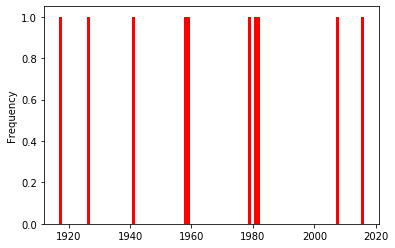

In [29]:
def hist(df):
    df['YEAR'].plot(kind='hist',color='red',bins=100,legend=False,x="")
hist(top_n_event(reshape_data(read_ghcn('USW00093822.dly')),read_giss_JD('GISS.csv'),10))

False    193287
True     182683
Name: norm_list, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
0.0
0.50144
None


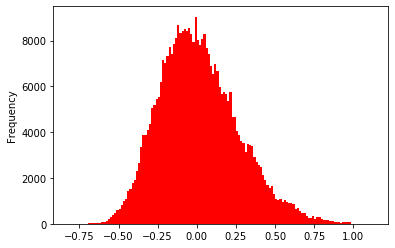

In [6]:
import numpy as np
import math
from scipy.stats import norm

def read_json(file):
    with open(file) as json_file:
        data = json.load(json_file)
        year_list = []
        val_list = []
        
        mean_list = []
        norm_list = []
        for i in data["Stations"]:
            temp = []
            for key,val in i.items(): 
                for i in val:
                    temp.append(i)
                    norm_list.append(i)
            mean_list.append(np.mean(temp))

        df1 = pd.DataFrame({'mean':mean_list})
        df2 = pd.DataFrame({'norm_list':norm_list})
        
        
        ##Finds amount of instances greater than 0 in the Means of Each Station
        num_over_zero_mean = df1.apply(lambda x: x > 0)
        num_false = (num_over_zero_mean['mean'].value_counts()[0])
        num_true = (num_over_zero_mean['mean'].value_counts()[1])
        total = num_false + num_true
# #         #Plots the Means
#         print(df1.plot(kind='hist',color='red',bins=140,legend=False))
# #         #Calculate the mean
#         print(df1.mean()['mean'])
# #         #Calculate Standard Deviation
        mean_std = (df1.std()['mean'])
#         print(mean_std)
        #Calculates Size of Tails 3 sigmas away from mean
        test_left_tail = df1.loc[(df1['mean'] < mean_std * -3)]
        test_right_tail = df1.loc[(df1['mean'] >  mean_std * 3)]
#         print(len(df1))
#         print(len(test_left_tail))
#         print(len(test_right_tail))
        
        
        ##Finds amount of instances greater than 0 in the Normal Values of Each Station
        num_over_zero_norm = df2.apply(lambda x: x > 0)
        print(num_over_zero_norm['norm_list'].value_counts())
        
# #         Plots the normal values
        print(df2.plot(kind='hist',color='red',bins=140,legend=False))
#         #Calculate the mean
#         print(df2.mean()['norm_list'])
#         #Calculate Standard Deviation
#         print(df2.std()['norm_list'])



        #ComparesHow Statistically significant mean is 
#         var_a = df1['mean'].var(ddof=1)
#         var_b = df2['norm_list'].var(ddof=1)

# #       #std deviation
#         print(scipy.stats.ttest_ind(df1['mean'],df2['norm_list'], equal_var=False))


        
          # number of trials, probability of each trial
        #Null Hypothesis
        print(sum(np.random.binomial(total,.5,100000) >= num_true)/100000)
        #Comes out to be 0 suppose to be very small number too small to print?
        
        #Actual Probability Tested
        print(sum(np.random.binomial(total,num_true/total,100000) >= num_true)/100000)
        
        #Example Problem 
#         print(sum(np.random.binomial(9,0.1,20000)==0)/20000)
# #         print(sum(s))

    
print(read_json("hist2.txt"))
# print(read_json("updated_json.txt"))

In [2]:
import json
import pandas as pd

Mean: -2.6200291753309803e-18
Standard Deviation: 0.2650249878596796
AxesSubplot(0.125,0.125;0.775x0.755)
amount < 0 1292315
amount > 0 1069298
total size of dataframe: 2361613
left tail size: 13
right tail size: 12458
None


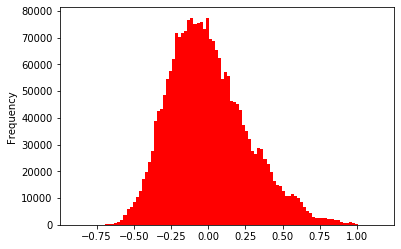

In [3]:
def read_json(file):
    with open(file) as json_file:
        data = json.load(json_file)
        adj_temp_list = []
#         for i in data:
#             print(i)
        for i in data["Stations"]:
            for j in i:
                adj_temp_list.append(j)
        df = pd.DataFrame({'adj_temps':adj_temp_list})
        
        mean = (df['adj_temps'].mean())
        std = (df['adj_temps'].std())
        print('Mean:',mean)
        print('Standard Deviation:',std)
        print(df['adj_temps'].plot(kind='hist',color='red',bins=100,legend=False))
        num_over_zero_mean = df.apply(lambda x: x > 0)
        num_false = (num_over_zero_mean['adj_temps'].value_counts()[0])
        num_true = (num_over_zero_mean['adj_temps'].value_counts()[1])
        print("amount < 0",num_false)
        print("amount > 0",num_true)
        
        
        test_left_tail = df.loc[(df['adj_temps'] < std * -3)]
        test_right_tail = df.loc[(df['adj_temps'] >  std * 3)]
        print("total size of dataframe:",len(df))
        print("left tail size:",len(test_left_tail))
        print("right tail size:",len(test_right_tail))
        

#         plt.show()

print(read_json("updated_json_2.txt"))

In [10]:
def find_largest_five_day_rolling_annual(df):
    df = df.dropna()
    count_row = df.shape[0]
    five_percent = round(count_row * .10)
    largest_vals = df.nlargest(five_percent, ['value']) 
    df_temp = len(largest_vals)
    df1 = df.set_index('YEAR')
    df2 = df1.value.rolling(5).mean()
    series = df2.dropna().sort_values(ascending=False)
    df3    = series.iloc[:df_temp].to_frame().reset_index() 
    return df3

print(find_largest_five_day_rolling_annual(reshape_data(read_ghcn('USW00093822.dly'))))
#US1FLCY0024.dly
#USW00093822.dly

      YEAR  value
0     1941  430.0
1     1941  383.8
2     1941  372.0
3     2016  370.0
4     2016  368.4
...    ...    ...
4333  1965   68.6
4334  1902   68.6
4335  2018   68.6
4336  2018   68.6
4337  1912   68.6

[4338 rows x 2 columns]


In [8]:
def rescale_mean(df_rain,df_temp):
    max_per_year = df_rain.loc[df_rain.groupby("YEAR")["value"].idxmax()]
    innerdf = innerjoin(max_per_year,df_temp)
    innerdf['Adjusted_mean'] =innerdf['J-D']-innerdf['J-D'].mean()
    return innerdf
print(rescale_mean(reshape_data(read_ghcn('USW00093822.dly')),read_giss_JD('GISS.csv')))

      J-D  YEAR  Adjusted_mean
0   -0.16  1901      -0.237966
1   -0.29  1902      -0.367966
2   -0.38  1903      -0.457966
3   -0.48  1904      -0.557966
4   -0.27  1905      -0.347966
..    ...   ...            ...
113  0.75  2014       0.672034
114  0.90  2015       0.822034
115  1.02  2016       0.942034
116  0.93  2017       0.852034
117  0.85  2018       0.772034

[118 rows x 3 columns]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [9]:
def mean_of_top_annual(df):
    mean = df['value'].mean()
    df['Percent_Increase']= (df['value'].divide(mean))
#     print(df.plot(kind='scatter',x='Adjusted_mean',y='Percent_Increase'))
    return df

In [12]:
def window_mean(rescale_df,window_df):
    lrg_df = pd.merge(window_df,rescale_df,on=['YEAR'],how='inner')
#     lrg_df.plot(kind='scatter',x='Adjusted_mean',y='value')
    return lrg_df#[['value','Adjusted_mean']]
    
print((window_mean(rescale_mean(reshape_data(read_ghcn('AE000041196.dly')),read_giss_JD('GISS.csv')),find_largest_five_day_rolling_annual(reshape_data(read_ghcn('USW00093822.dly'))))))
    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

NameError: name 'find_largest_five_day_rolling_annual' is not defined

In [17]:
import sys
def innerjoin(df_rain,df2_temp):
    mergedStuff = pd.merge(df_rain, df2_temp, on=['YEAR'], how='inner')
    #mergedStuff['Func_of_temp'] = mergedStuff['J-D']*(mergedStuff['value'])
    return mergedStuff[['J-D','YEAR']]
innerjoin(read_giss_JD('GISS.csv'),top_value_annual(reshape_data(read_ghcn('USW00093822.dly'))))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,J-D,YEAR
0,-0.16,1901
1,-0.29,1902
2,-0.38,1903
3,-0.48,1904
4,-0.27,1905
...,...,...
113,0.75,2014
114,0.90,2015
115,1.02,2016
116,0.93,2017


In [6]:
# def find_95perctile_per_year(df):
#     df = df.loc[df.groupby("")]
#     return df
# print(find_95perctile_per_year(reshape_data(read_ghcn('USW00093822.dly'))))

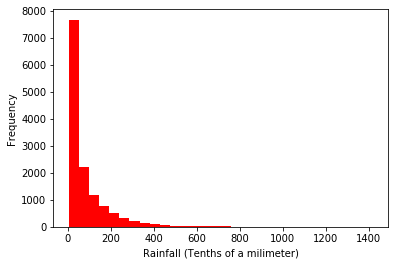

In [8]:
def plot_basic_hist(df,binz):
    df = df[df['value']>0]
    ax = df['value'].plot(kind='hist',color='red',bins=binz,legend=False,x="Rainfall")
    ax.set_xlabel("Rainfall (Tenths of a milimeter)")
    return ax
plot_basic_hist(reshape_data(read_ghcn('USW00093822.dly')),30)

In [18]:
#Finds the maximum value 
#cleanest_data.loc[cleanest_data['value']==cleanest_data['value'].max()]


In [19]:

#.apply(lambda df:df.irow(df.value.argmax()))
#loc[cleanest_data['value']]

##df.groupby("country").apply(lambda df:df.irow(df.value.argmax()))
#The Top 95% of dataset is 262.25
#cleanest_data.value.quantile(0.95)


In [20]:
# highest_95 = cleanest_data.loc[cleanest_data['value']>=cleanest_data.value.quantile(0.95)]
# print(highest_95)



In [21]:
#highest_95.plot(kind='scatter',x='Date',y='value')
#highest_95.plot_date(dates, value)

In [22]:
# highest_95['Date'].map(lambda d: d.year).plot(kind='hist')
# plt.show()

In [15]:
def read_giss_JD(file):
    filename ='ghcnd_all/' + file
    temperature_data = pd.read_csv(filename)
    temp_avg = temperature_data[['Year','J-D']]
    temp_avg.drop(temp_avg.tail(1).index,inplace=True)
    temp_avg['J-D'] = pd.to_numeric(temp_avg['J-D'])
    temp_avg['YEAR'] = temp_avg["Year"]
    temp_avg.drop(columns='Year')
    
    return temp_avg
read_giss_JD('GISS.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Year,J-D,YEAR
0,1880,-0.17,1880
1,1881,-0.08,1881
2,1882,-0.11,1882
3,1883,-0.18,1883
4,1884,-0.29,1884
...,...,...,...
134,2014,0.75,2014
135,2015,0.90,2015
136,2016,1.02,2016
137,2017,0.93,2017


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

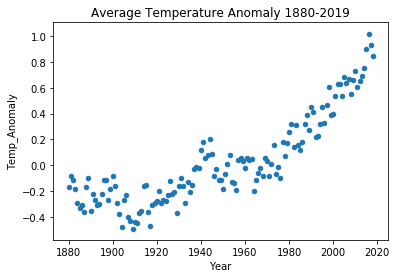

In [34]:
def plot_giss(df):
    df['Temp_Anomaly'] = df['J-D']
    fig = df.plot(kind='scatter',x='Year',y='Temp_Anomaly',title='Average Temperature Anomaly 1880-2019')
#     fig.savefig('/path/to/figure.pdf')
plot_giss(read_giss_JD('GISS.csv'))

In [25]:
# #Opens GISS Data 
# temperature_data = pd.read_csv('ghcnd_all\GISS.csv')
# month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# #print(temperature_data)


In [26]:

#print(temp_final)


In [24]:
import sys
def frequency_func_of_temp(df_rain,df2_temp):
    mergedStuff = pd.merge(df_rain, df2_temp, on=['YEAR'], how='inner')
    #mergedStuff['Func_of_temp'] = mergedStuff['J-D']*(mergedStuff['value'])
    return mergedStuff[['J-D','value']]
frequency_func_of_temp(read_giss_JD('GISS.csv'),top_value_annual(reshape_data(read_ghcn('USW00093822.dly'))))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,J-D,value
0,-0.16,378.0
1,-0.29,726.0
2,-0.38,432.0
3,-0.48,549.0
4,-0.27,467.0
...,...,...
113,0.75,653.0
114,0.90,541.0
115,1.02,1420.0
116,0.93,579.0


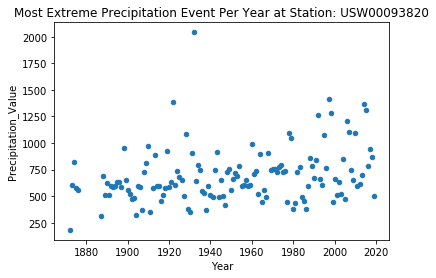

In [38]:
def plot_top_value_annually(df):
    df['Precipitation_Value'] = df['value']
    df['Year'] = df['YEAR']
#     print(df)
    df.plot(kind="scatter",x='Year',y='Precipitation_Value',title='Most Extreme Precipitation Event Per Year at Station: USW00093820',)
plot_top_value_annually(top_value_annual(reshape_data(read_ghcn('USW00093820.dly'))))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


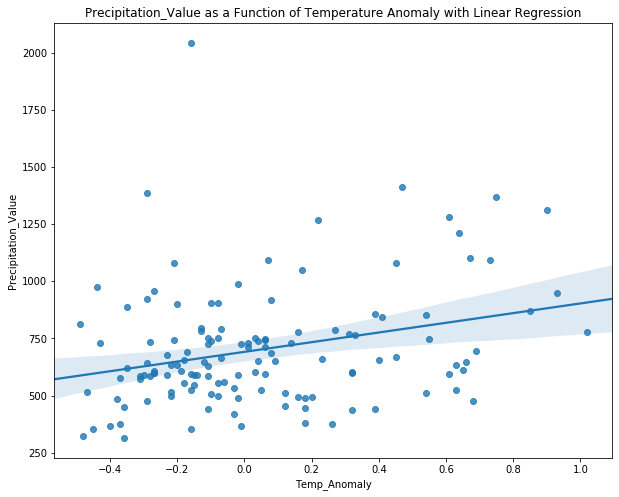

In [44]:
#AM000037959
#USW00093820
def plot_frequency_func_of_temp(df):
    plt.figure(figsize=(10,8))
    df['Temp_Anomaly'] = df['J-D']
    df['Precipitation_Value'] = df['value']
#     sns.scatterplot(df['Temp_Anomaly'],df['Precipitation_Value'])
    sns.regplot(df['Temp_Anomaly'],df['Precipitation_Value'],ci=95)
    plt.title("Precipitation_Value as a Function of Temperature Anomaly with Linear Regression")
    
    #df.plot(kind='scatter',x='Func_of_temp',y='value')
    
plot_frequency_func_of_temp(frequency_func_of_temp(read_giss_JD('GISS.csv'),top_value_annual(reshape_data(read_ghcn('USW00093820.dly')))))

In [6]:
regression_results = pd.read_csv('regression_first_attempt.csv')

In [7]:
slope_p = (regression_results['Slope,Pval'].str.split(',',n=1,expand=True))
slope = (slope_p[0]).str.strip('(')
p_val = (slope_p[1]).str.strip(')')
regression_results['Slope']= slope.astype('float64', errors = 'ignore')
regression_results['P']= p_val.astype('float64',errors = 'ignore')
hist_data = regression_results[['Slope','P','Location']]

In [8]:
print(hist_data.head())

        Slope         P         Location
0 -326.168507  0.340958  ASN00094028.dly
1  -50.461409  0.480696  RSM00023909.dly
2  703.488668  0.026787  USC00112745.dly
3 -699.106846  0.067755  IN019130300.dly
4 -159.460129  0.388942  ASN00061188.dly


In [9]:
non_sig = hist_data[hist_data['P']>.05]
sig = hist_data[hist_data['P']<.05]
print(len(non_sig))
print(len(sig))

32718
4874


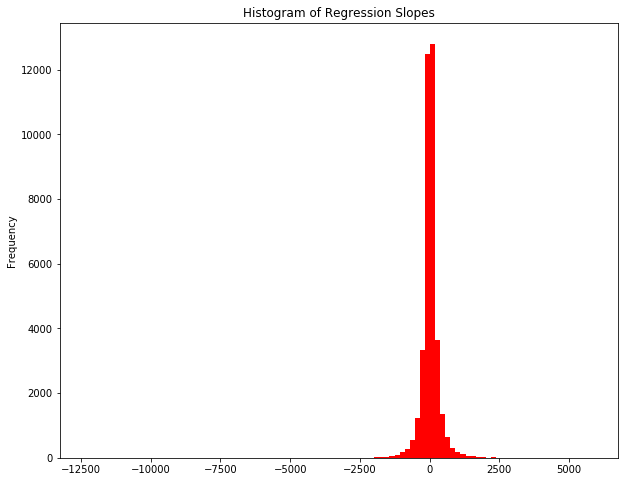

In [11]:
plt.figure(figsize=(10,8))
hist_data['Slope'].plot(kind='hist',color='red',bins=100,legend=False,title='Histogram of Regression Slopes')


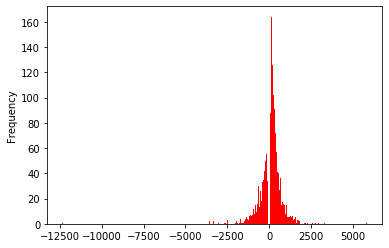

In [51]:
sig['Slope'].plot(kind='hist',color='red',bins=1000,legend=False,x="Rainfall")

In [13]:
import pandas as pd
regression_results_norm = pd.read_csv('regression_normalized.csv')

In [14]:
slope_pn = (regression_results_norm['Slope,Pval'].str.split(',',n=1,expand=True))
slope_n = (slope_pn[0]).str.strip('(')
p_val_n = (slope_pn[1]).str.strip(')')
regression_results_norm['Slope']= slope_n.astype('float64', errors = 'ignore')
regression_results_norm['P']= p_val_n.astype('float64',errors = 'ignore')
hist_data_n = regression_results_norm[['Slope','P','Location']]

In [15]:
print(hist_data_n.head())

      Slope         P         Location
0 -0.512597  0.340958  ASN00094028.dly
1 -0.170463  0.480696  RSM00023909.dly
2  0.950587  0.026787  USC00112745.dly
3 -0.868868  0.067755  IN019130300.dly
4 -0.252384  0.388942  ASN00061188.dly


In [16]:
non_sig = hist_data_n[hist_data_n['P']>.05]
sig = hist_data_n[hist_data_n['P']<.05]
print(len(non_sig))
print((sig.mean()))

32718
Slope    0.235161
P        0.018065
dtype: float64


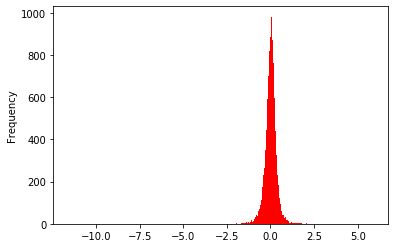

In [17]:
non_sig['Slope'].plot(kind='hist',color='red',bins=1000,legend=False,x="Rainfall")

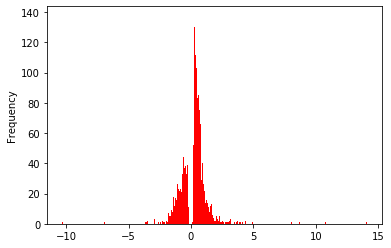

In [18]:
sig['Slope'].plot(kind='hist',color='red',bins=1000,legend=False,x="Rainfall")

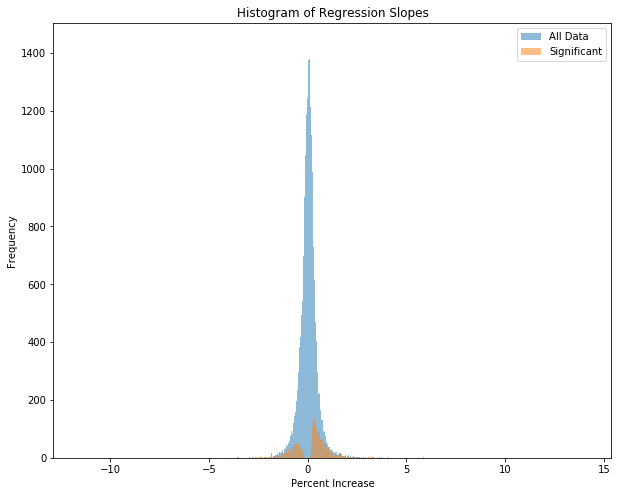

In [21]:
plt.figure(figsize=(10,8))
plt.hist(hist_data_n['Slope'], bins=1000, alpha=0.5, label='All Data')
plt.hist(sig['Slope'], bins=1000, alpha=0.5, label='Significant')
plt.title("Histogram of Regression Slopes")
plt.ylabel("Frequency")
plt.xlabel("Percent Increase")
plt.legend(loc='upper right')

plt.show()

In [39]:
a = np.array([1,2,3,4])

b = np.array([0,1,0,1])

print(sum(a*b))

6


In [41]:
def in_class(array):
    new_list = []
    for i in array: 
        new_val = i * 7
        new_list.append(new_val)
    return new_list
in_class([3,2,1,1])

[21, 14, 7, 7]